In [1]:
library(stm)
library(Matrix)
library(CountClust)

Loading required package: ggplot2



In [2]:
plot_factor = function(EF,k,main=NULL){
  plot(EF[,1],type='l',ylab='',xlab='base',main=main,ylim=range(EF))
  if(k>1){
    for(i in 2:k){
    lines(EF[,i],col=i,lty=i)
  }
  }
}


#'@param K number of factors to be plot
summary_study = function(fit,K,gene=NULL,method='stm'){
  # plot factors 
  p = ncol(fit$geneCounts)
  idx1 = 1:p
  if(method=='stm'){
    EF = fit$fit_stm$EF
  }
    else if (method=='sgom'){
    EF = t(fit$fit_sgom$phi)
  }else if(method=='NMF'){
    EF = t(fit$fit_NMF$H)
  }else if(method=='hals'){
    EF = t(fit$fit_hals$V)
  }
  par(mfrow=c(5,1))
  for(k in 1:K){
      rna_ymax <- max(max(EF[idx1,k]), 1e-3)
      plot(EF[idx1,k],type='l',ylab='',xlab='base',main=c(paste(gene, 'factor',k),'RNA'),col=2, ylim=c(0, rna_ymax))
    }
}


# Factors in OAS1

I ran the SGoM model with k=5, around gene OAS1.

In [ ]:
BCL2L1.sgom_K5.rds  HMGN3.sgom_K5.rds  OAS1.sgom_K5.rds  PTBP1.sgom_K5.rds  SLC25A3.sgom_K5.rds
GPX3.sgom_K5.rds    MAPT.sgom_K5.rds   PSAP.sgom_K5.rds  RPN2.sgom_K5.rds   SRSF3.sgom_K5.rds

In [3]:
annotation = read.table('../../gtex_download/sample.tsv', sep='\t', header=1, row.names=1)
save_fit <- function(gene_name) {
    
    fit = readRDS(paste('../code/stm_models/', gene_name, '.sgom_K5.rds', sep=''))
    summary_study(fit, 5, method='sgom', gene=gene_name)

    x <- as.matrix(fit$fit_sgom$pi) %*% as.matrix(fit$fit_sgom$phi)

    colnames(x) <- colnames(fit$geneCounts)
    write.table(x, paste('tables/', gene_name, '_stm.tab', sep=''), sep='\t', quote=FALSE)

    phi <- fit$fit_sgom$phi
    colnames(phi) <- colnames(fit$geneCounts)
    rownames(phi) <- c('factor1', 'factor2', 'factor3', 'factor4', 'factor5')
    write.table(phi, paste('tables/', gene_name, '_factors.tab', sep=''), sep='\t', quote=FALSE)

    library(CountClust)

    # row.names(fit$geneCounts) <- row.names(annotation)
    # row.names(fit$fit_sgom$pi) <- row.names(annotation)

    indis = row.names(fit$geneCounts)
    tissue_label = c()
    tissue_label <- annotation[rownames(fit$geneCounts),]$tissue_id
    annotation = data.frame(sample_id = indis,tissue_label = tissue_label)
    EL = fit$fit_sgom$pi
    
    colnames(EL) <- c('factor1', 'factor2', 'factor3', 'factor4', 'factor5')
    
    write.table(EL, paste('tables/', gene_name, '_loadings.tab', sep=''), sep='\t', quote=FALSE)
    
    colores = RColorBrewer::brewer.pal(10,  "Paired")
    
    print(StructureGGplot(EL,annotation = annotation,
                      palette = colores, figure_title = gene_name,
                      ))
}

In [8]:
gene_list <- c('BCL2L1',  'HMGN3', 'OAS1', 'PTBP1',  'SLC25A3',
'GPX3',    'MAPT',   'PSAP',  'RPN2',  'SRSF3')

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


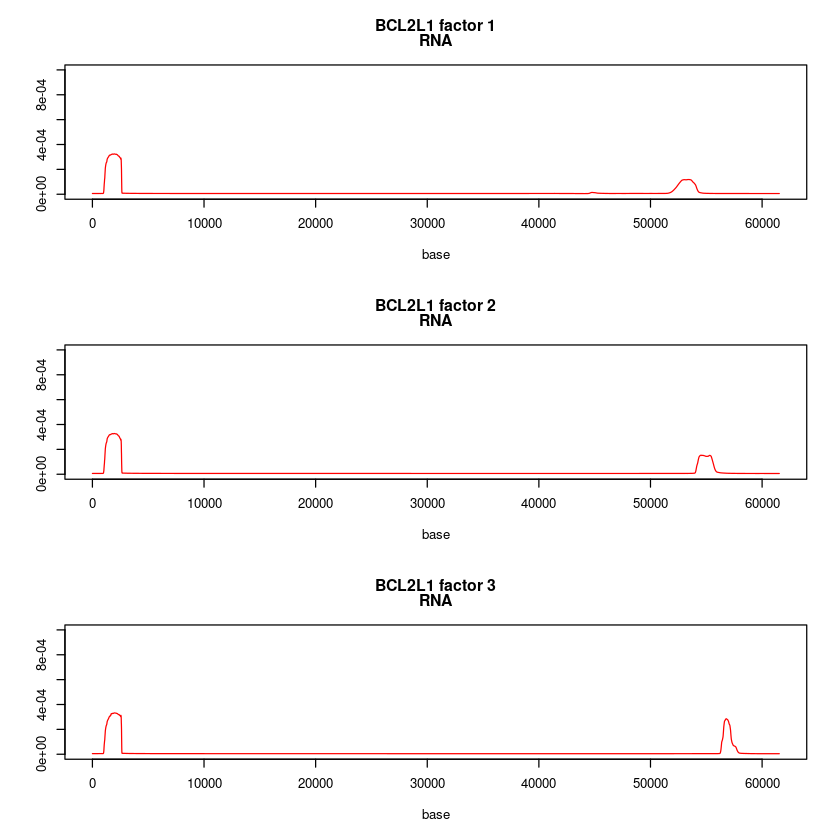

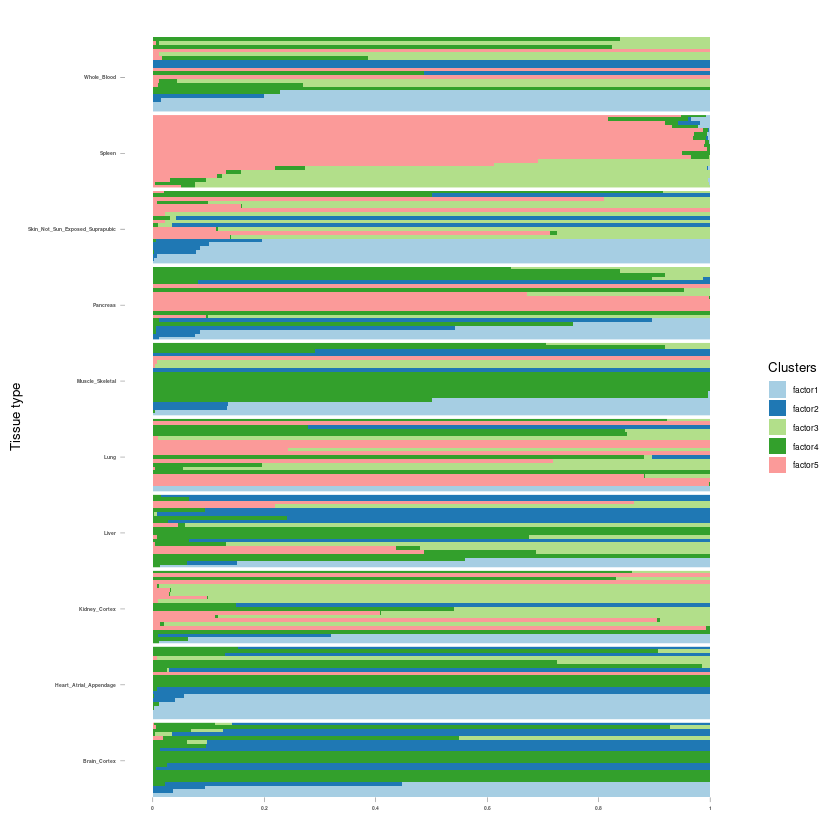

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


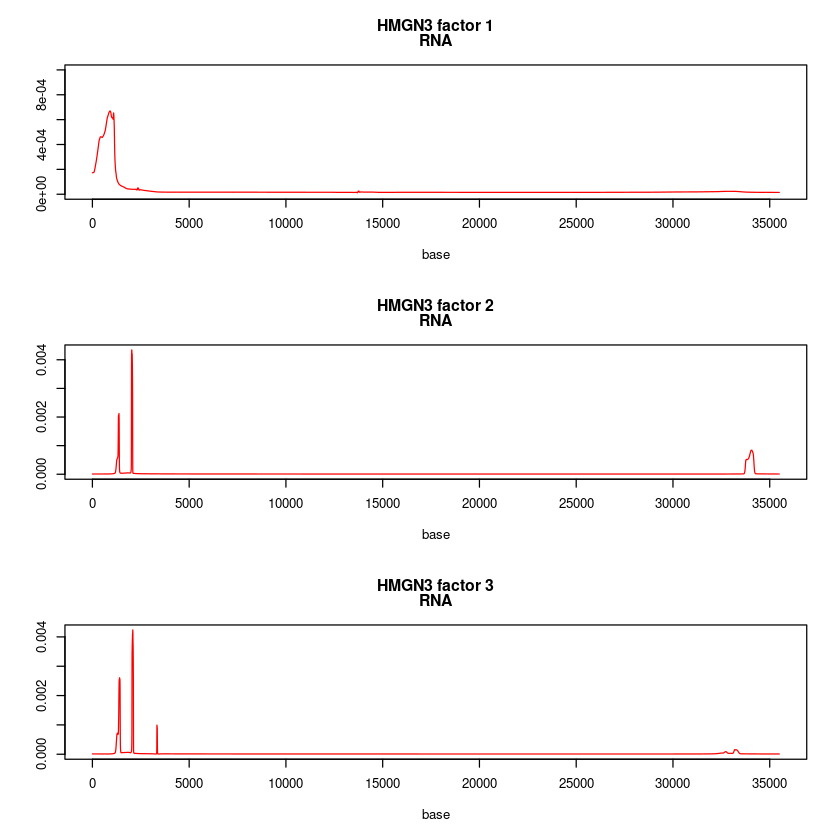

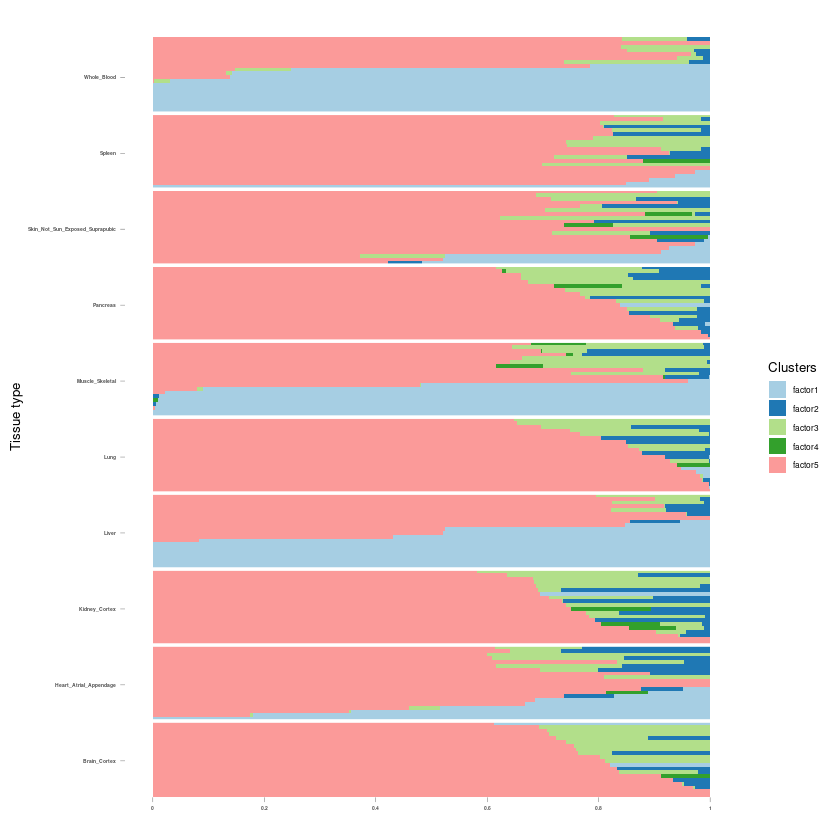

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


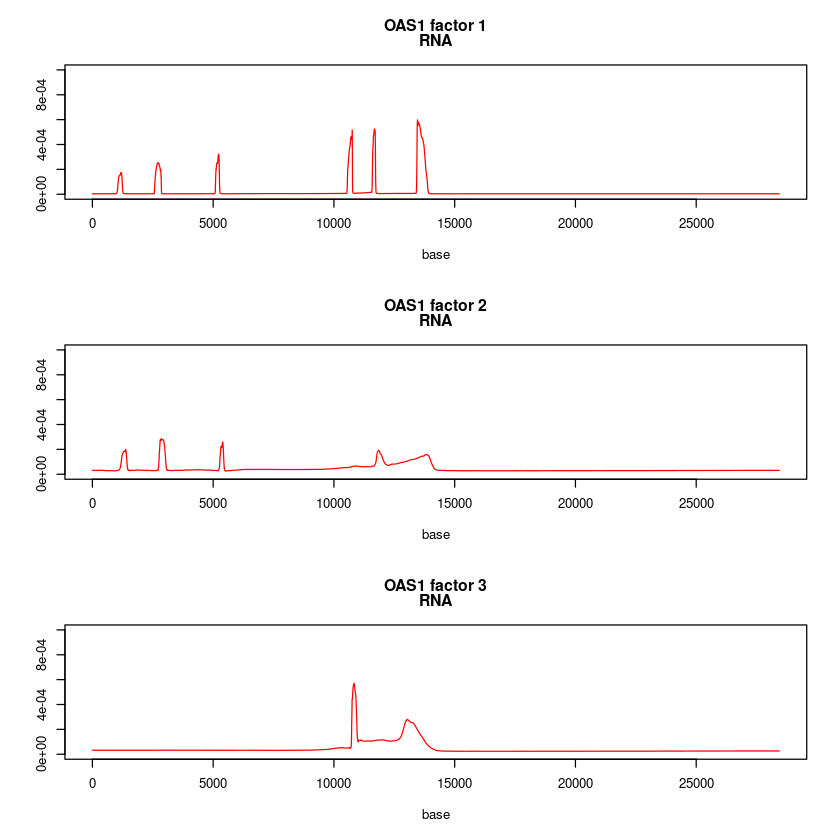

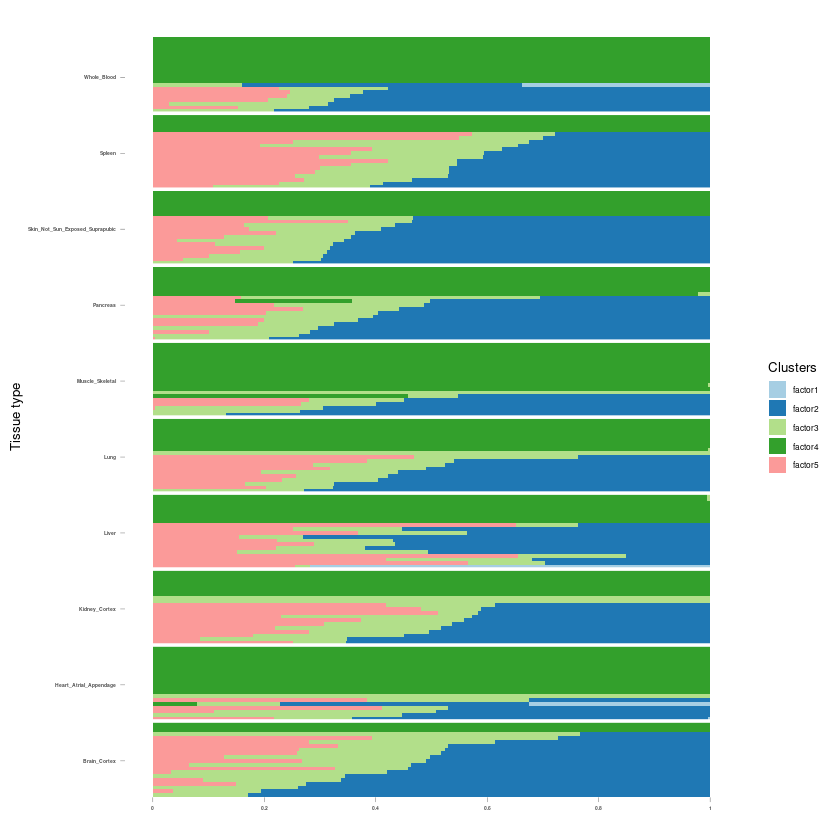

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


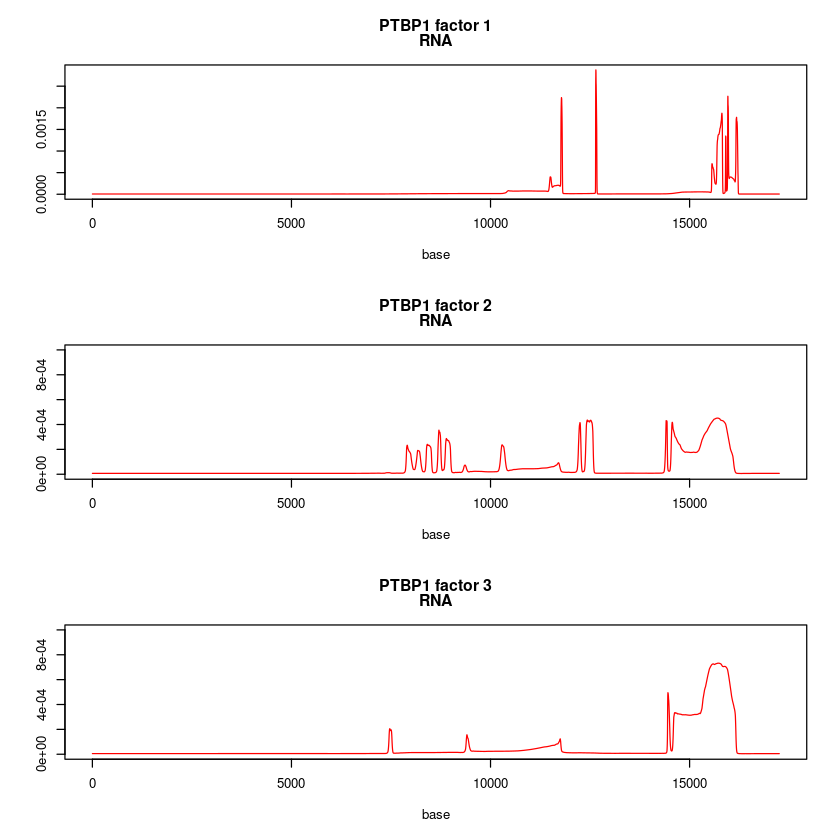

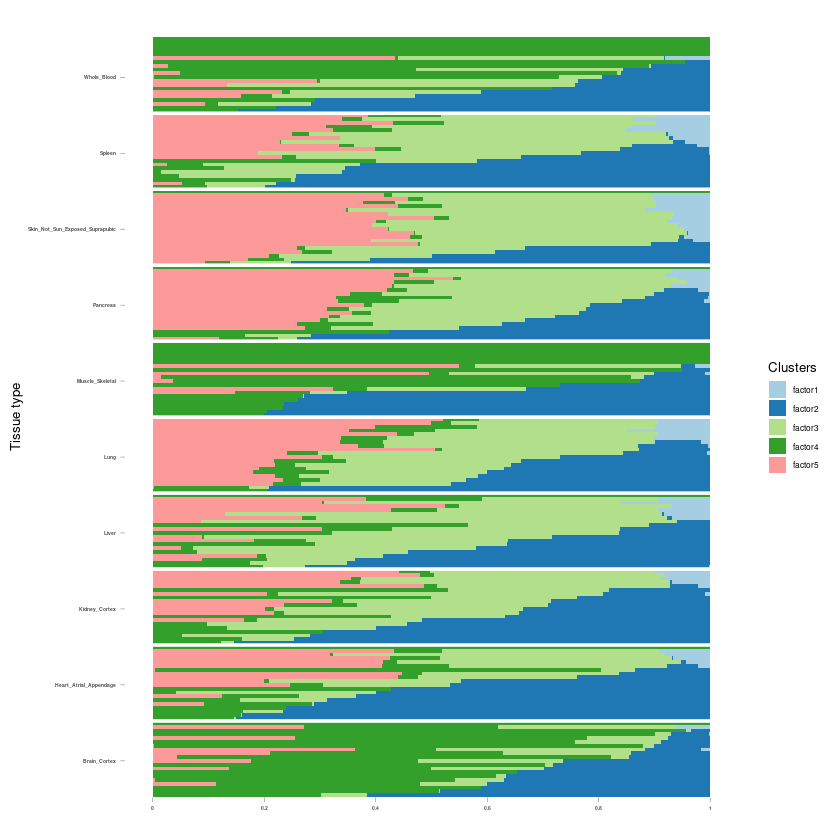

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


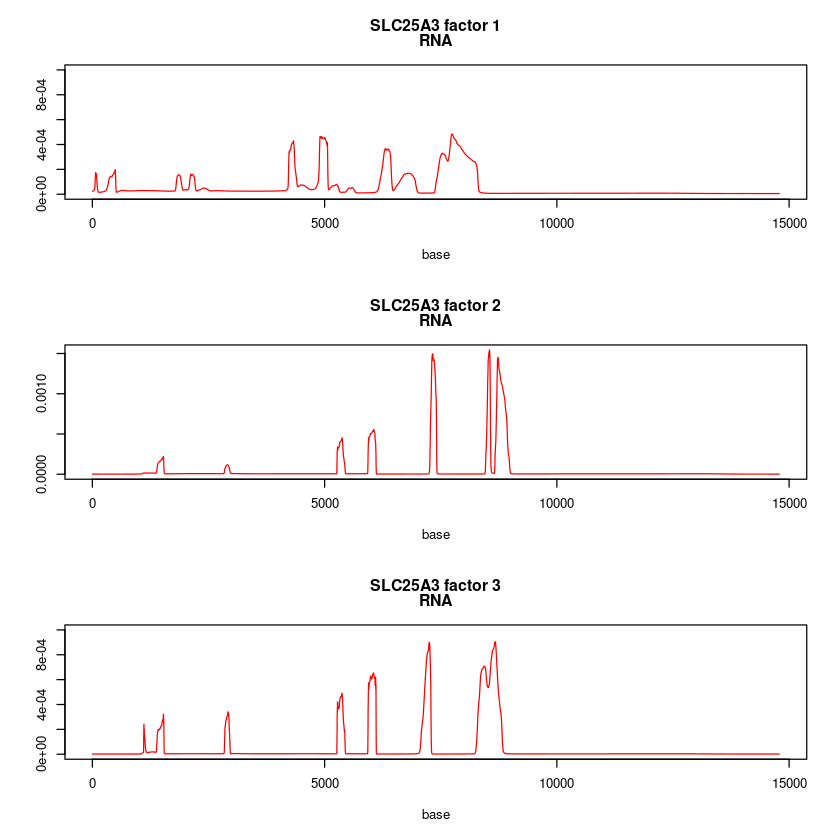

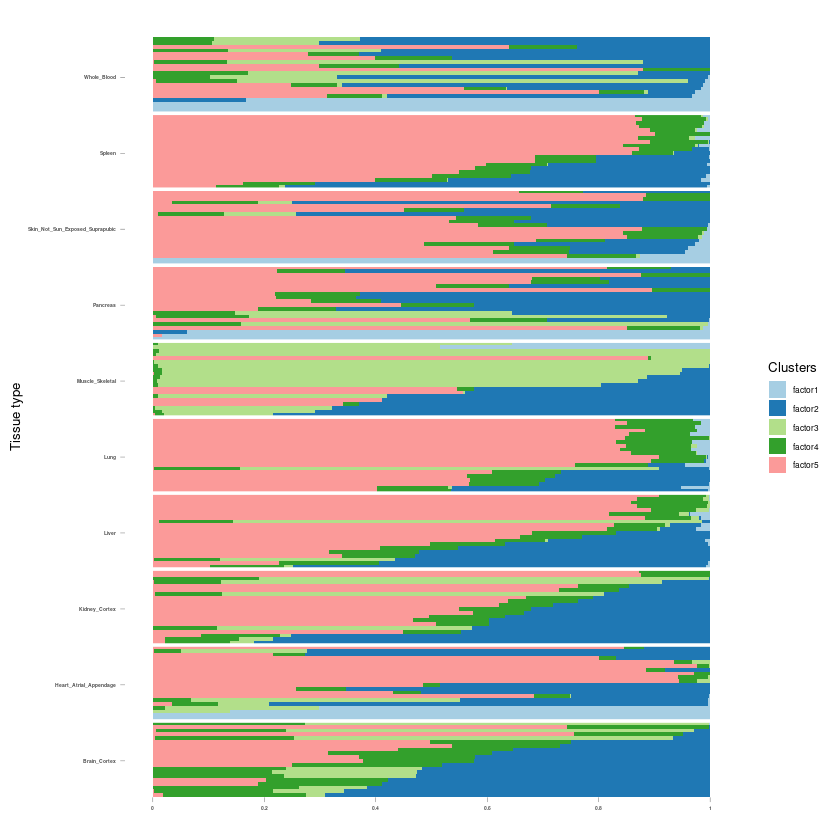

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


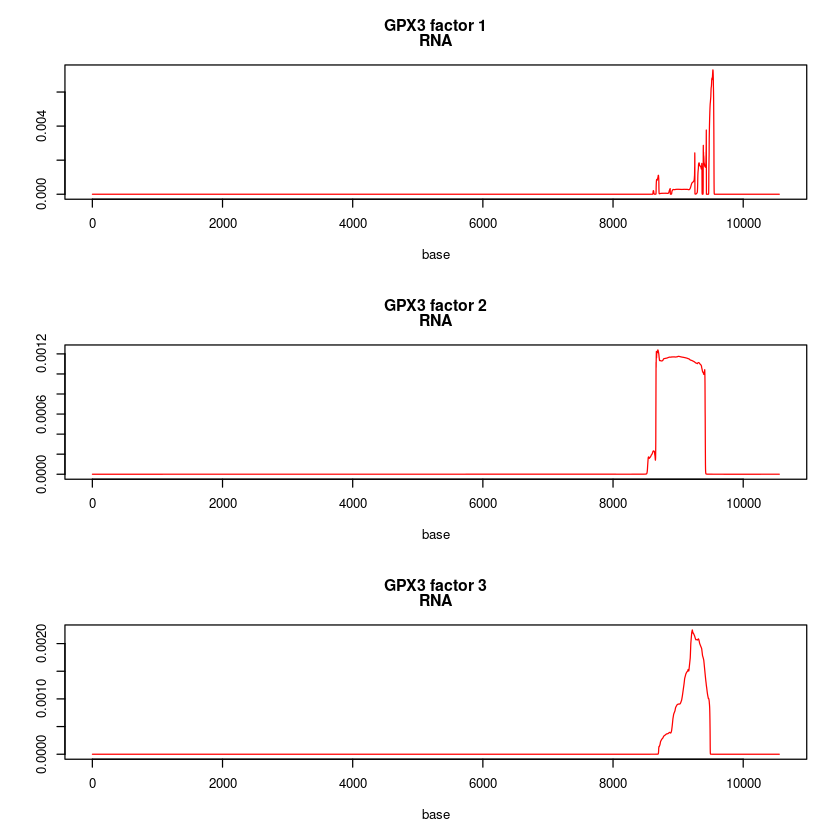

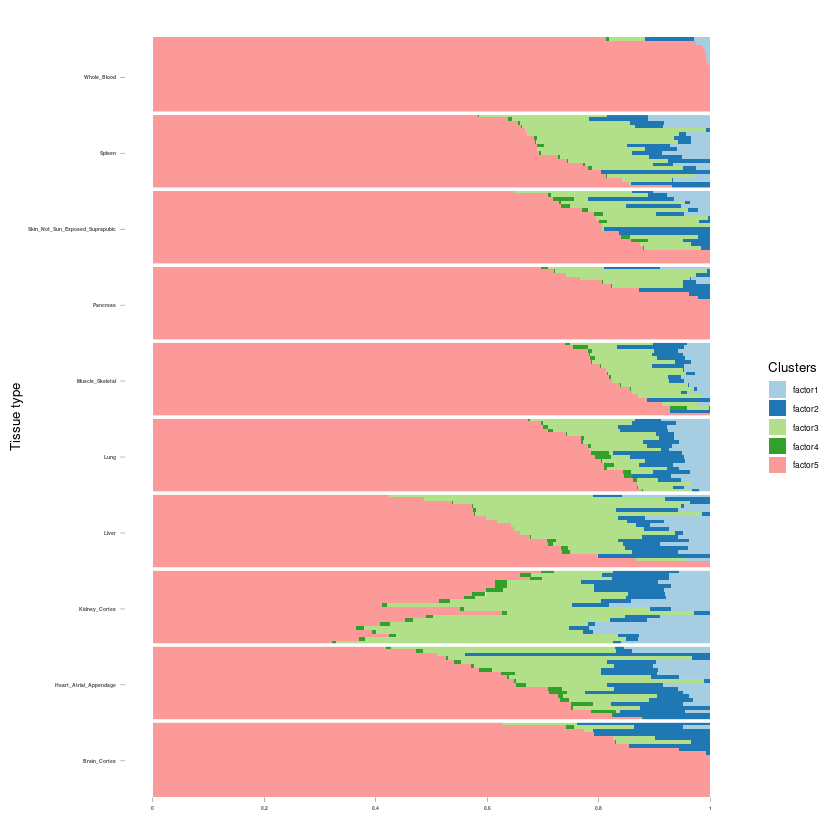

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


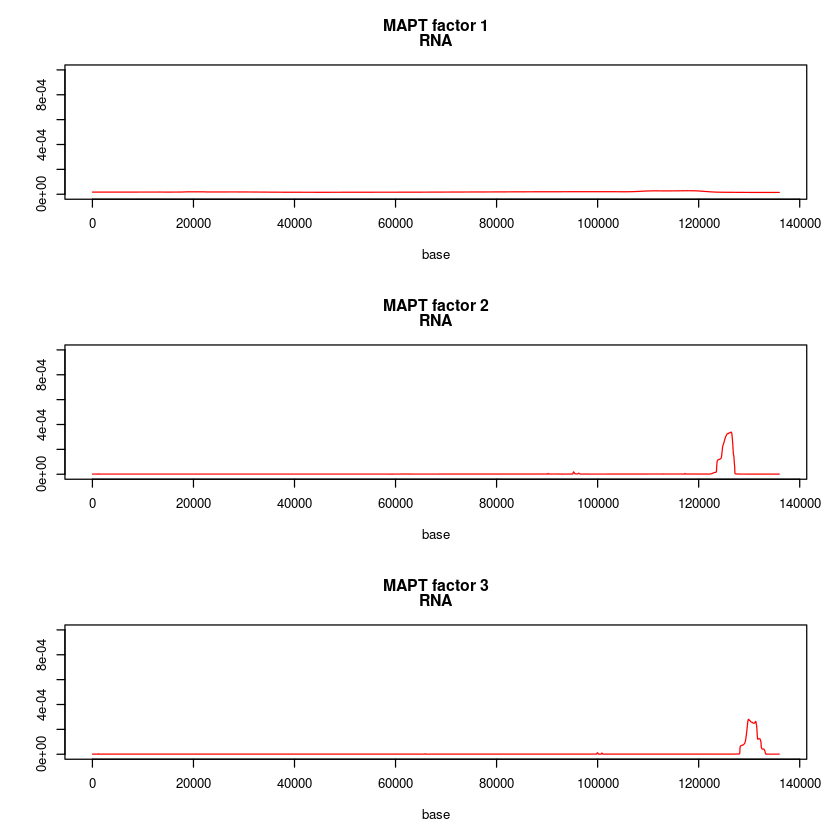

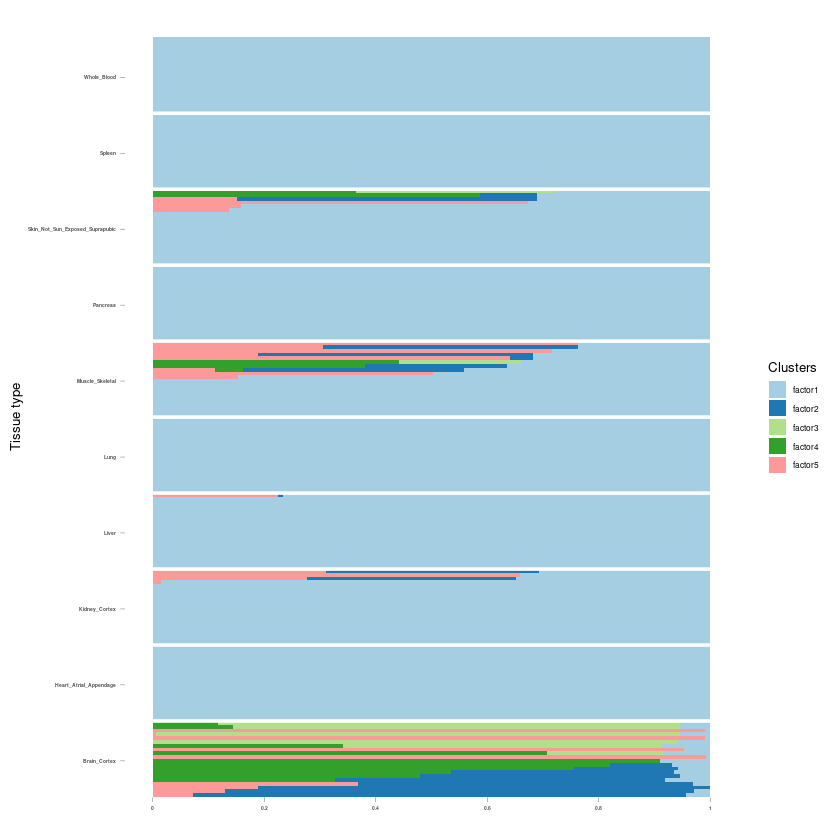

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


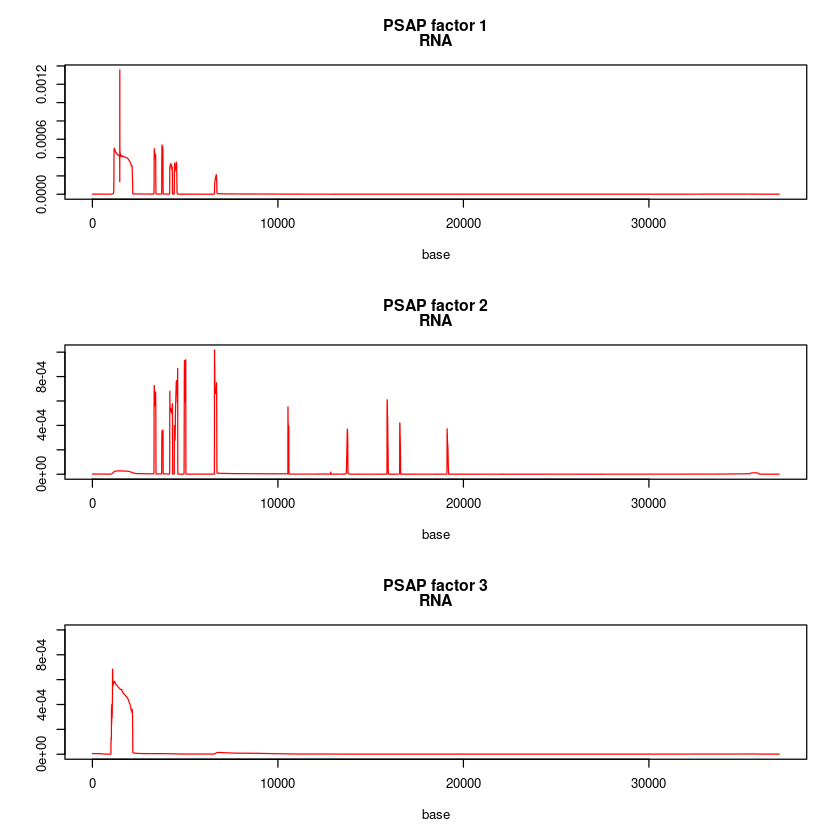

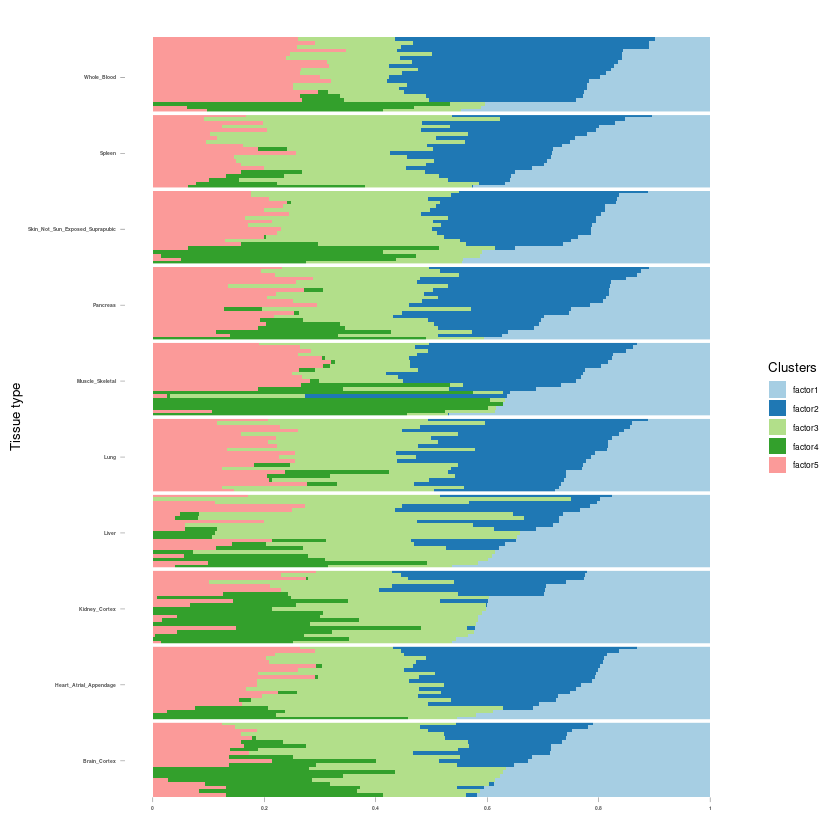

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


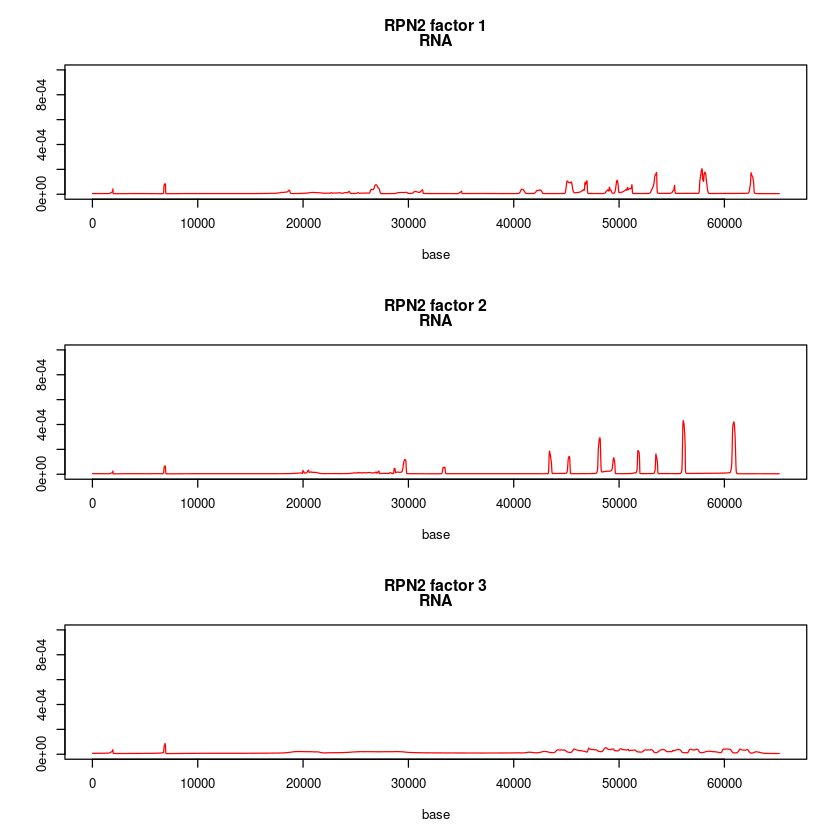

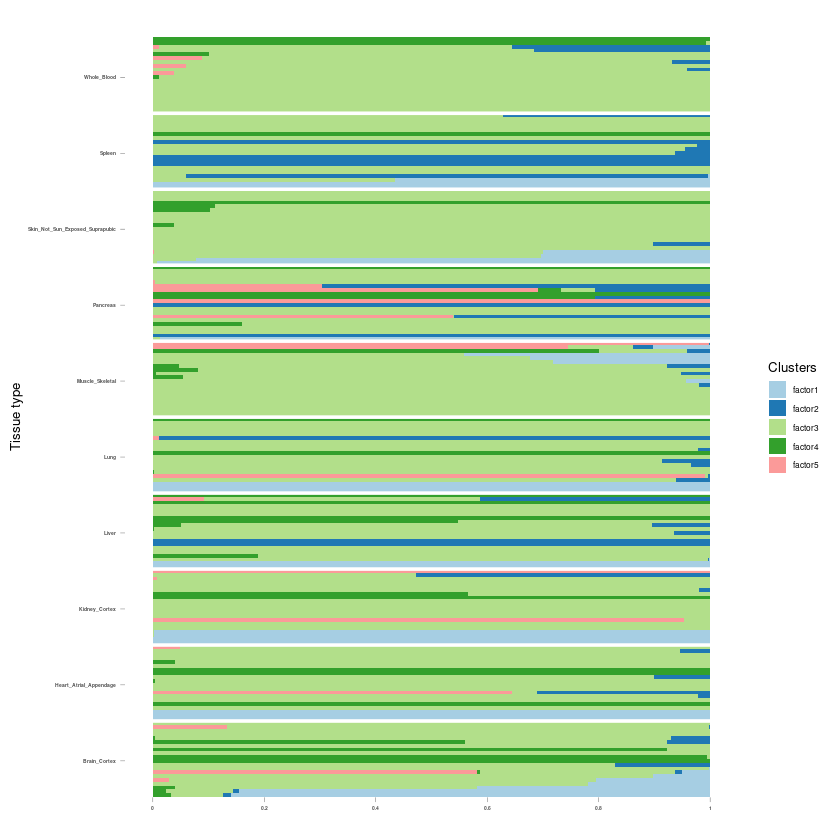

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


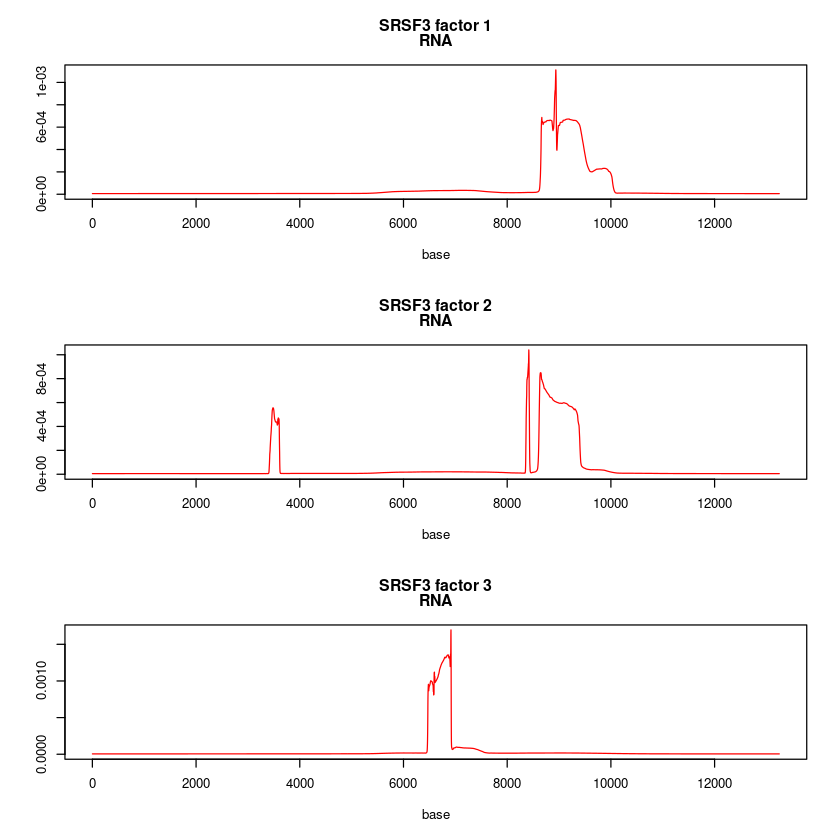

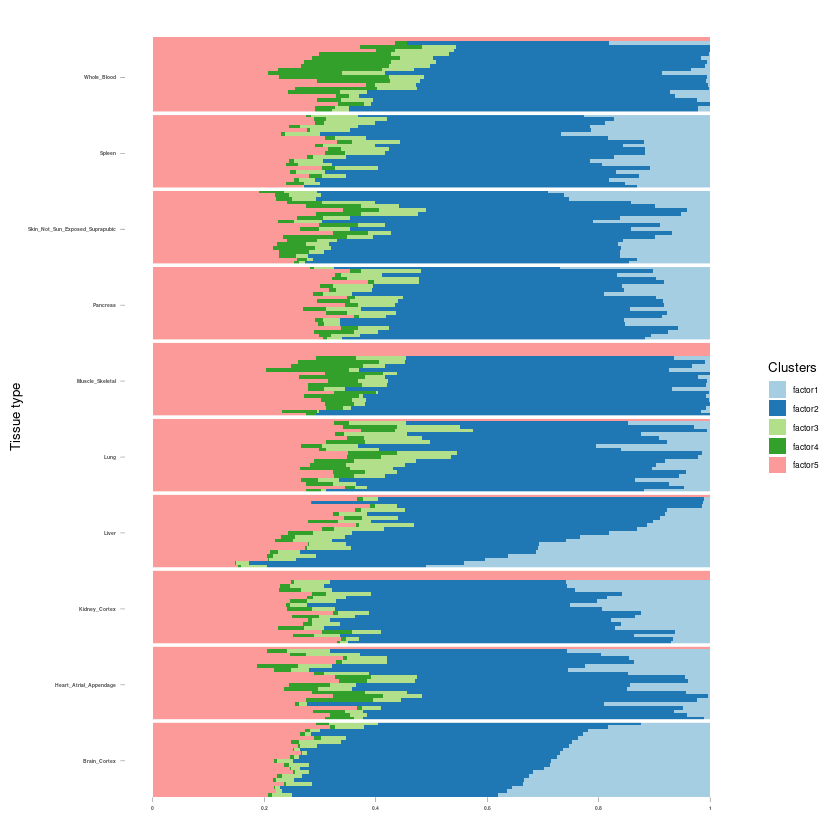

In [9]:
for (g in gene_list) {
    save_fit (g)
}

In [54]:
annotation = read.table('../../gtex_download/sample.tsv', sep='\t', header=1, row.names=1)
save_fit <- function(gene_name) {
    
    fit = readRDS(paste('../code/stm_models/', gene_name, '.sgom_K3.rds', sep=''))
    summary_study(fit, 3, method='sgom', gene=gene_name)

    x <- as.matrix(fit$fit_sgom$pi) %*% as.matrix(fit$fit_sgom$phi)

    colnames(x) <- colnames(fit$geneCounts)
    write.table(x, paste('tables/', gene_name, '_stm.tab', sep=''), sep='\t', quote=FALSE)

    phi <- fit$fit_sgom$phi
    colnames(phi) <- colnames(fit$geneCounts)
    rownames(phi) <- c('factor1', 'factor2', 'factor3')
    write.table(phi, paste('tables/', gene_name, '_factors.tab', sep=''), sep='\t', quote=FALSE)

    library(CountClust)

    # row.names(fit$geneCounts) <- row.names(annotation)
    # row.names(fit$fit_sgom$pi) <- row.names(annotation)

    indis = row.names(fit$geneCounts)
    tissue_label = c()
    tissue_label <- annotation[rownames(fit$geneCounts),]$tissue_id
    annotation = data.frame(sample_id = indis,tissue_label = tissue_label)
    EL = fit$fit_sgom$pi
    
    colnames(EL) <- c('factor1', 'factor2', 'factor3')
    
    write.table(EL, paste('tables/', gene_name, '_loadings.tab', sep=''), sep='\t', quote=FALSE)
    
    print(StructureGGplot(EL,annotation = annotation,
                      palette = RColorBrewer::brewer.pal(3,  "Paired"), figure_title = gene_name,
                      ))
}

In [ ]:
MGN3.sgom_K3.rds  MAPT.sgom_K5.rds  OAS1.sgom_K3.rds  PSAP.sgom_K5.rds   SLC25A3.sgom_K3.rds  SRSF3.sgom_K5.rds  TPM3.sgom_K3.rds
HMGN3.sgom_K5.rds  NPR2.sgom_K3.rds  OAS1.sgom_K5.rds  PTBP1.sgom_K3.rds  SLC25A3.sgom_K5.rds  SRSF6.sgom_K3.rds  TPM3.sgom_K5.rds
MAPT.sgom_K3.rds   NPR2.sgom_K5.rds  PSAP.sgom_K3.rds  PTBP1.sgom_K5.rds  SRSF3.sgom_K3.rds    SRSF6.sgom_K5.rds

In [42]:
gtex-stm/code/stm_models/BCL2L1.sgom_K5.rds  gtex-stm/code/stm_models/REEP1.sgom_K5.rds    gtex-stm/code/stm_models/SRSF4.sgom_K5.rds
gtex-stm/code/stm_models/GPX3.sgom_K5.rds    gtex-stm/code/stm_models/RILPL1.sgom_K5.rds   gtex-stm/code/stm_models/SRSF5.sgom_K5.rds
gtex-stm/code/stm_models/HMGN3.sgom_K5.rds   gtex-stm/code/stm_models/RPN2.sgom_K5.rds     gtex-stm/code/stm_models/SRSF6.sgom_K5.rds
gtex-stm/code/stm_models/MAPT.sgom_K5.rds    gtex-stm/code/stm_models/RPS13.sgom_K5.rds    gtex-stm/code/stm_models/SRSF7.sgom_K5.rds
gtex-stm/code/stm_models/MYL7.sgom_K5.rds    gtex-stm/code/stm_models/SLC25A3.sgom_K5.rds  gtex-stm/code/stm_models/SRSF9.sgom_K5.rds
gtex-stm/code/stm_models/NOVA2.sgom_K5.rds   gtex-stm/code/stm_models/SRSF10.sgom_K5.rds   gtex-stm/code/stm_models/TPM1.sgom_K5.rds
gtex-stm/code/stm_models/NPR2.sgom_K5.rds    gtex-stm/code/stm_models/SRSF11.sgom_K5.rds   gtex-stm/code/stm_models/TPM2.sgom_K5.rds
gtex-stm/code/stm_models/OAS1.sgom_K5.rds    gtex-stm/code/stm_models/SRSF1.sgom_K5.rds    gtex-stm/code/stm_models/TPM3.sgom_K5.rds
gtex-stm/code/stm_models/PSAP.sgom_K5.rds    gtex-stm/code/stm_models/SRSF2.sgom_K5.rds
gtex-stm/code/stm_models/PTBP1.sgom_K5.rds   gtex-stm/code/stm_models/SRSF3.sgom_K5.rds

[1] "#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C" "#FB9A99" "#E31A1C" "#FDBF6F"
 [8] "#FF7F00" "#CAB2D6" "#6A3D9A"

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


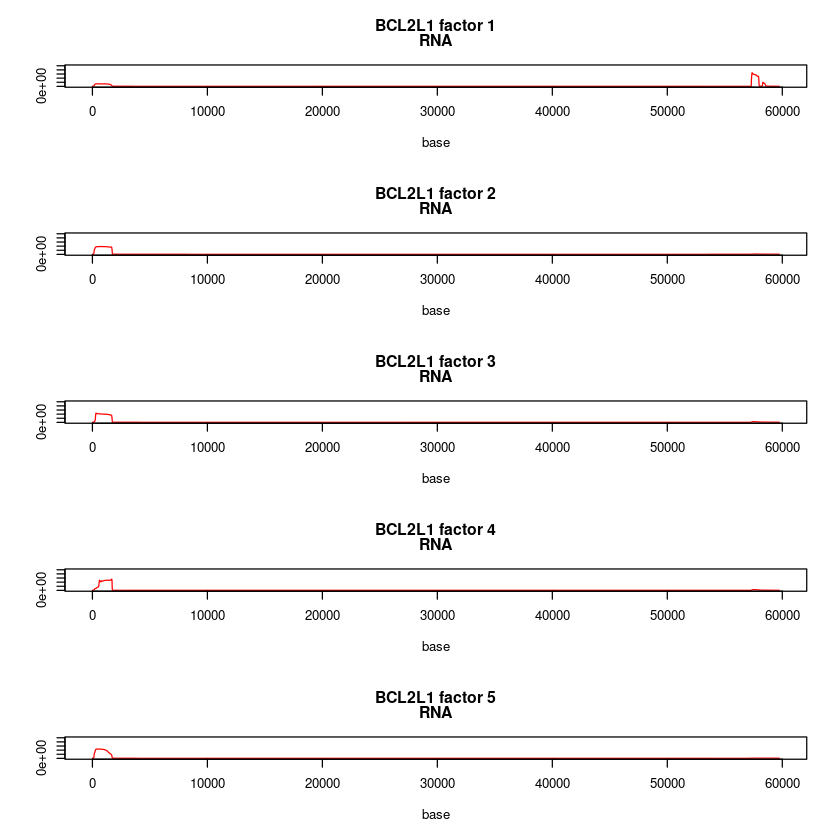

[1] ""


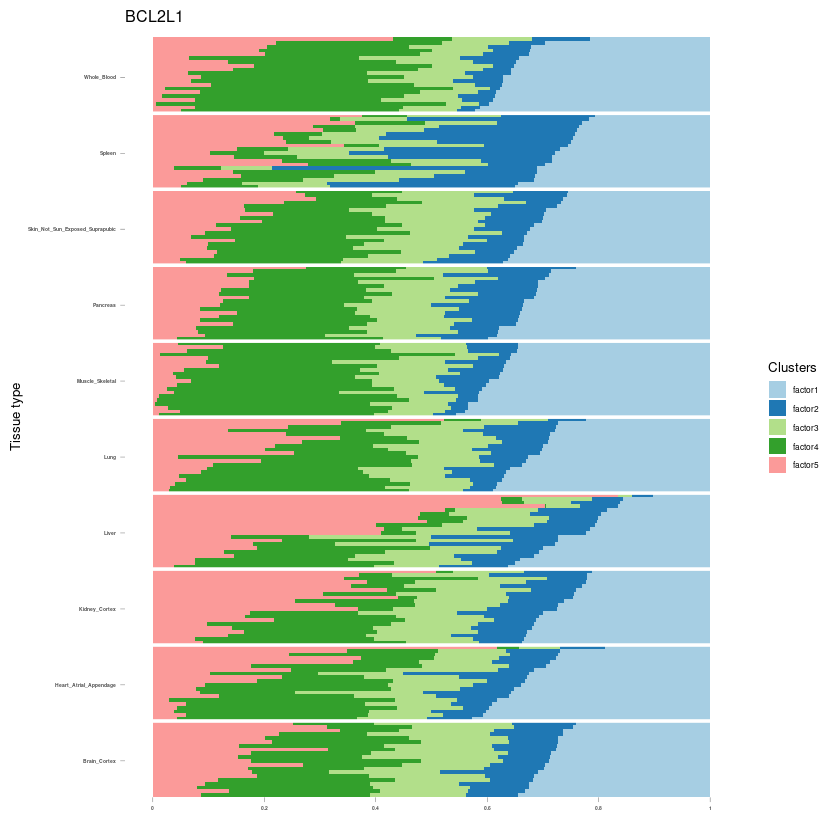

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


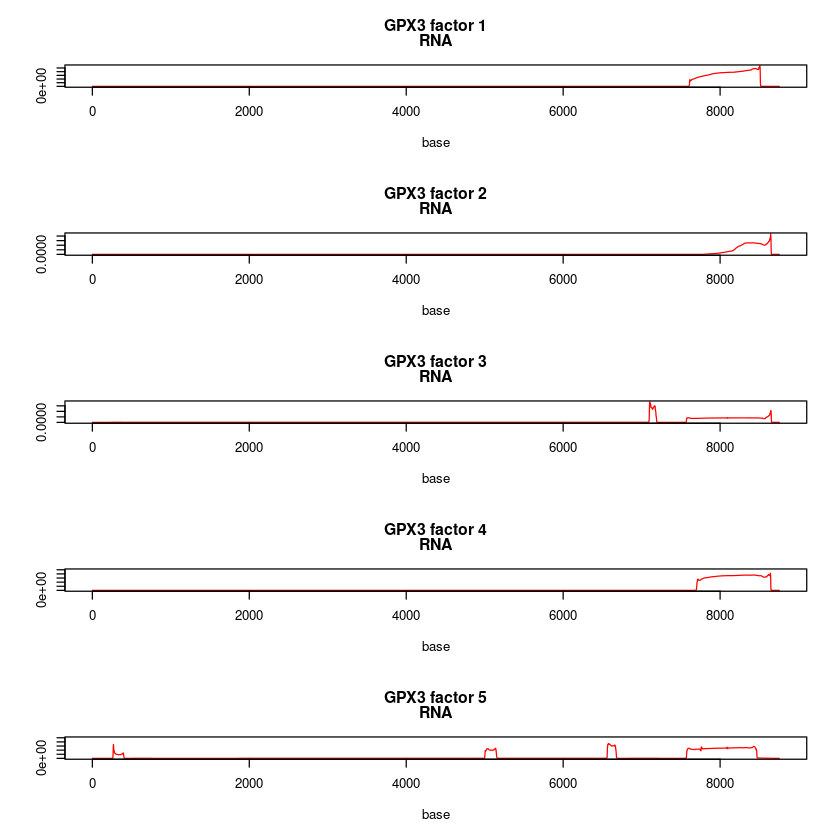

[1] ""


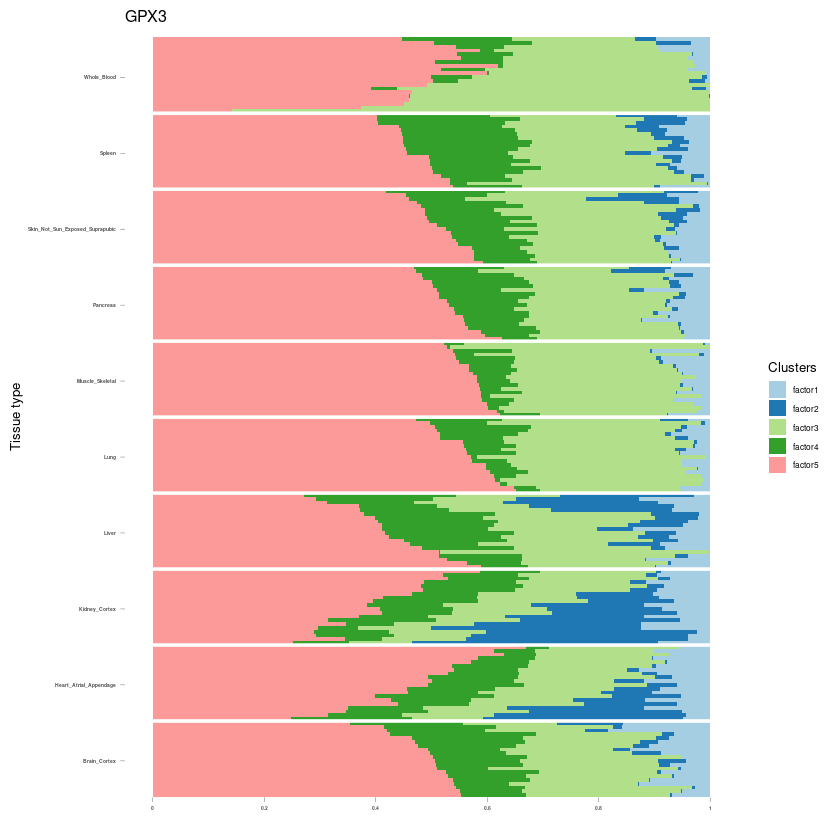

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


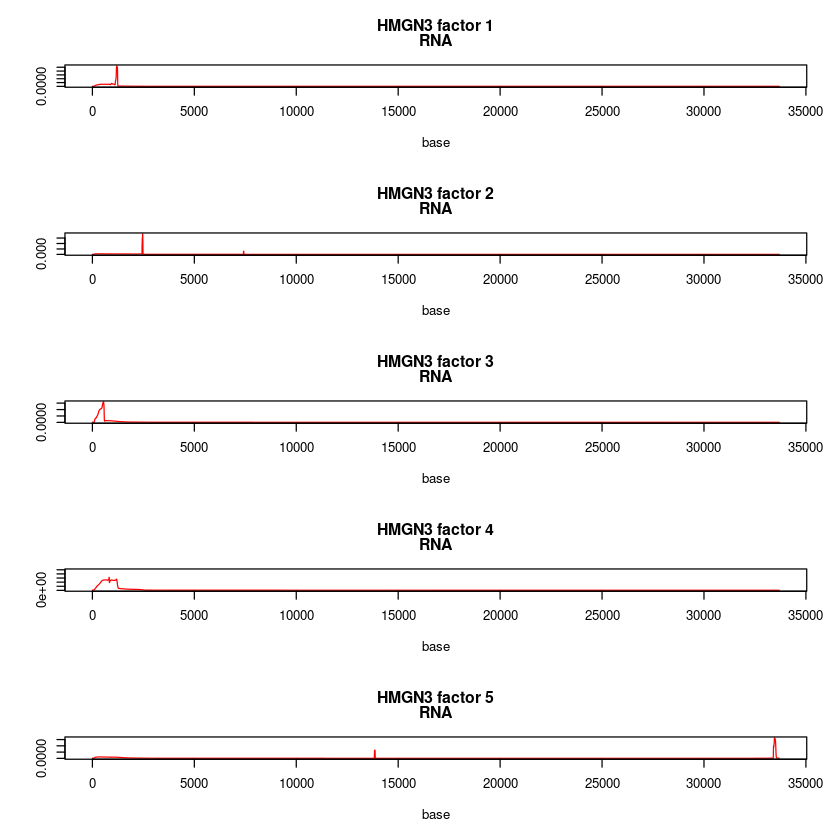

[1] ""


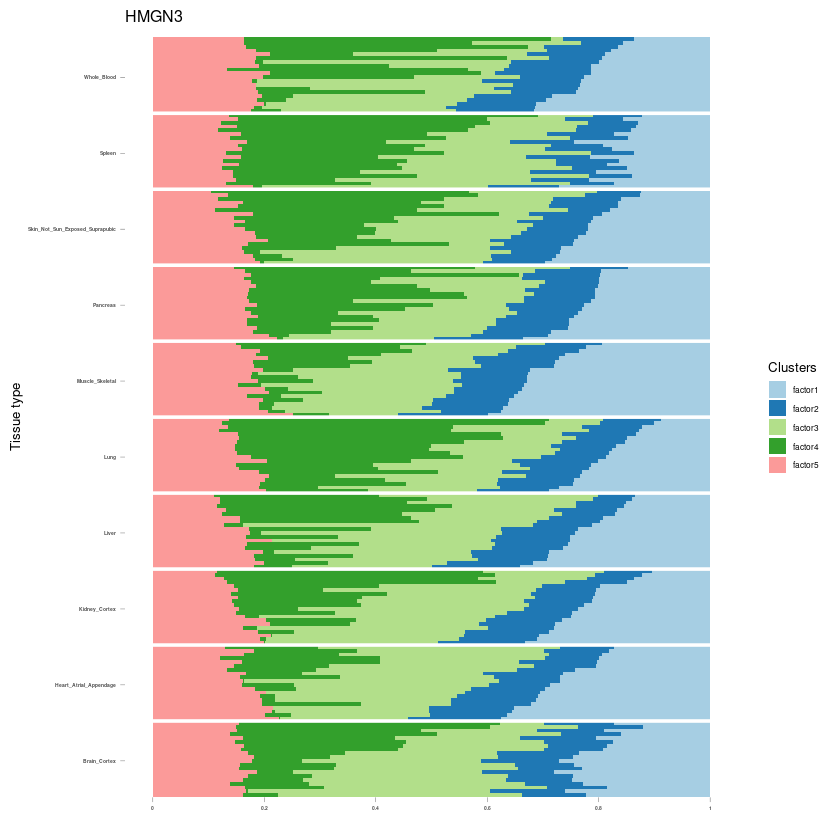

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


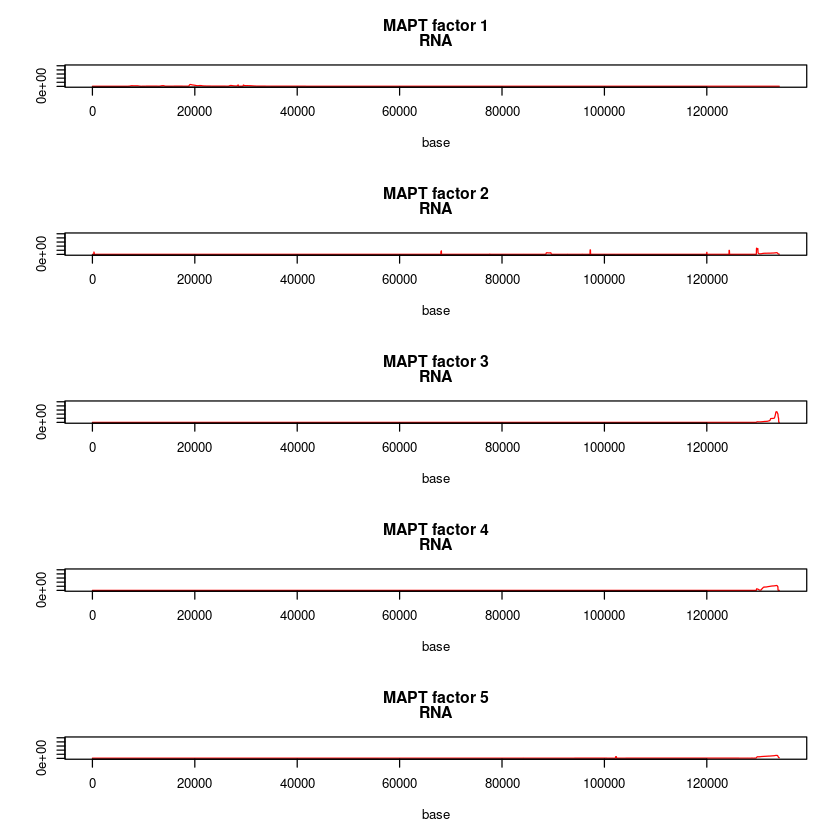

[1] ""


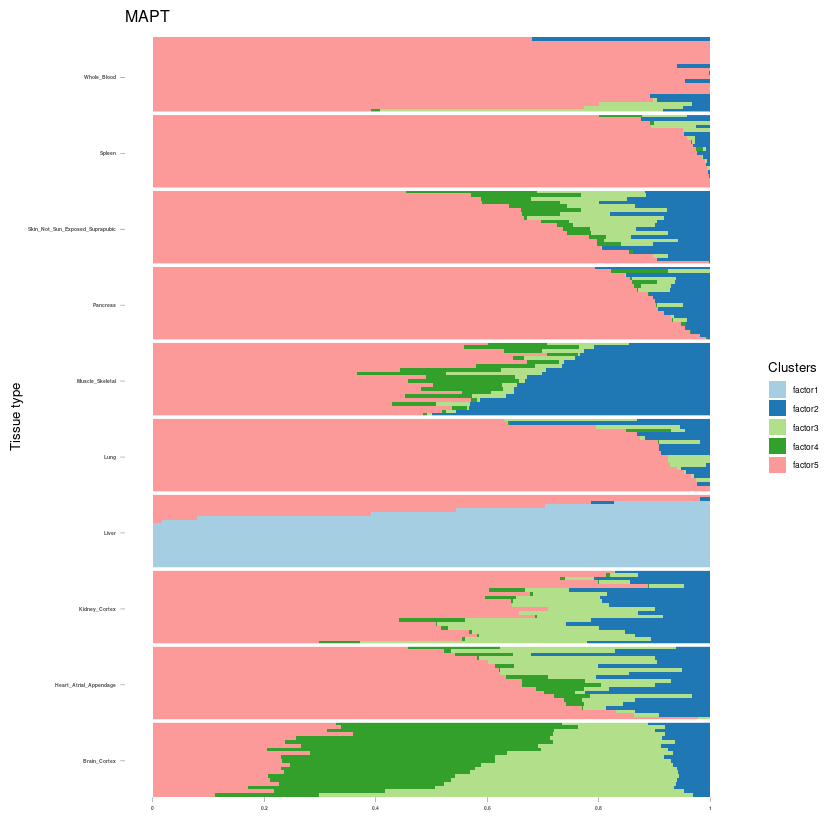

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


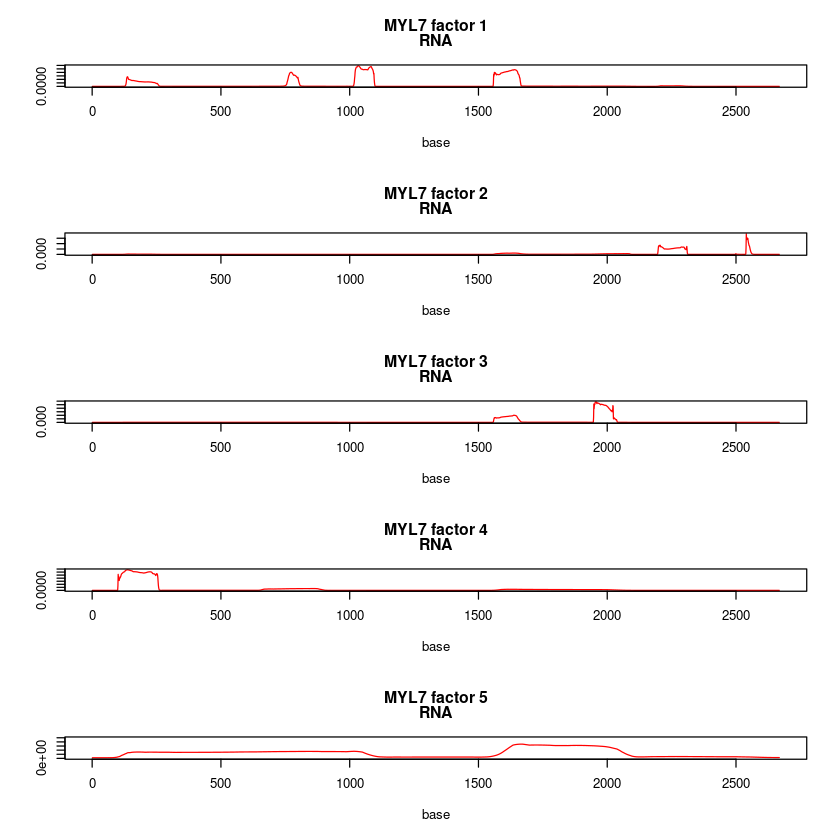

[1] ""


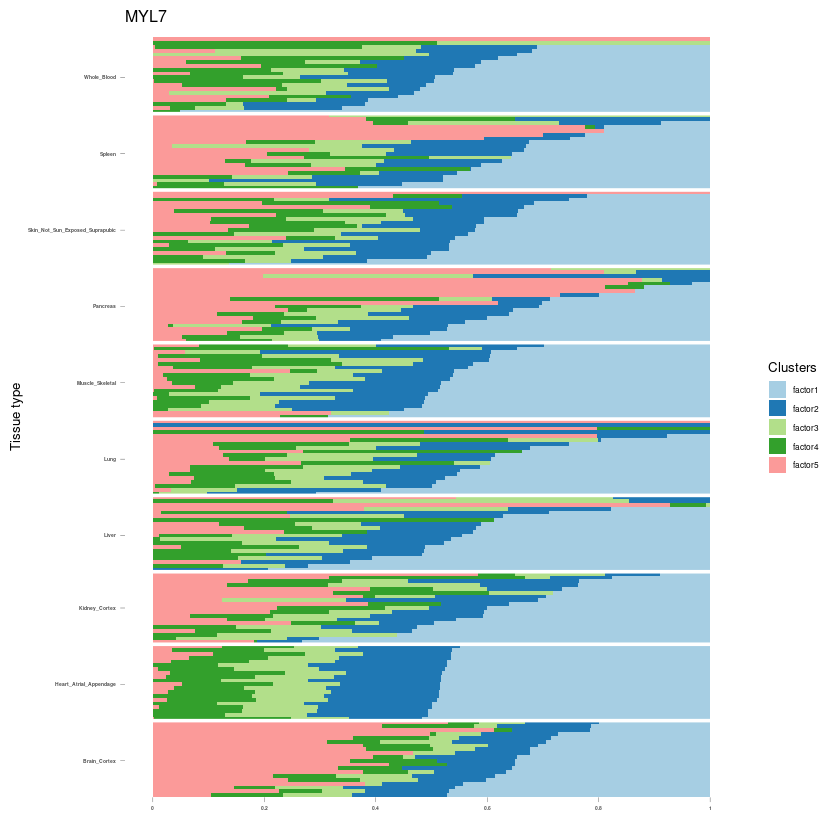

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


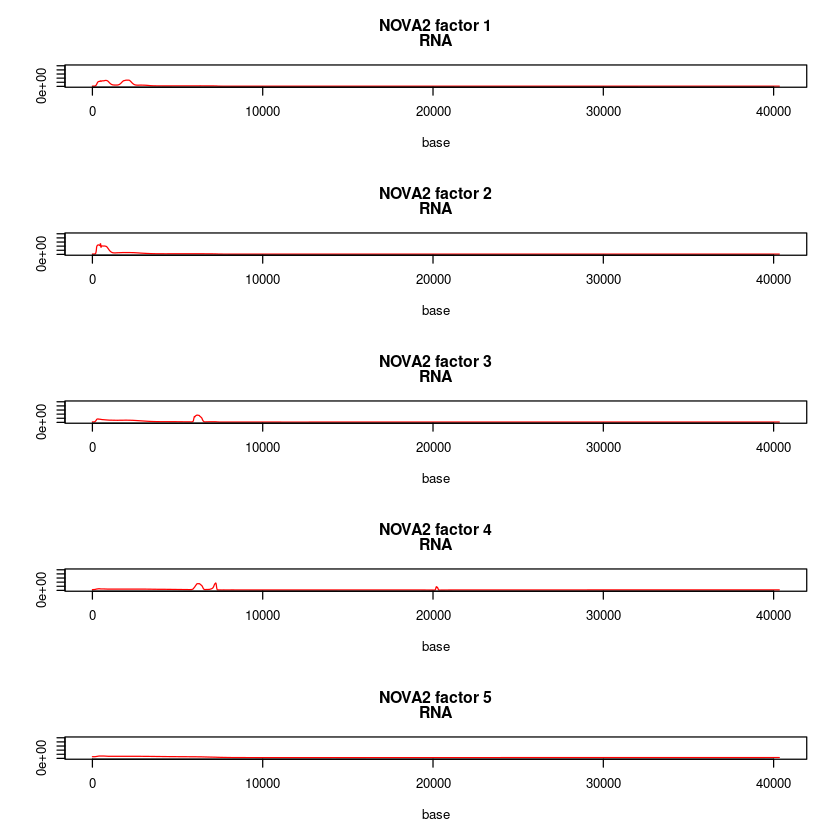

[1] ""


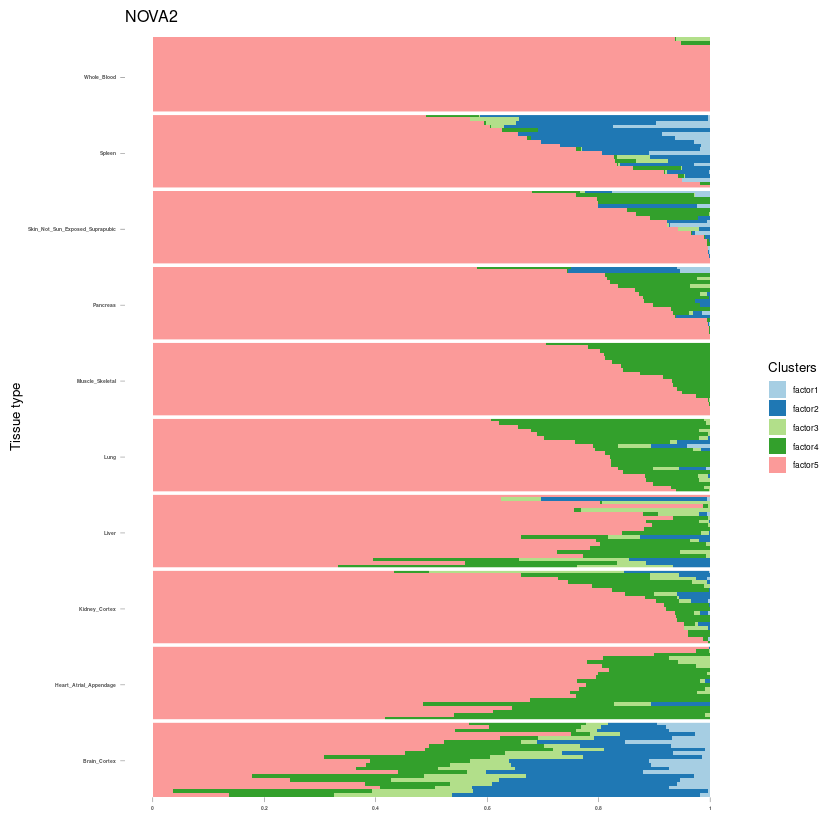

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


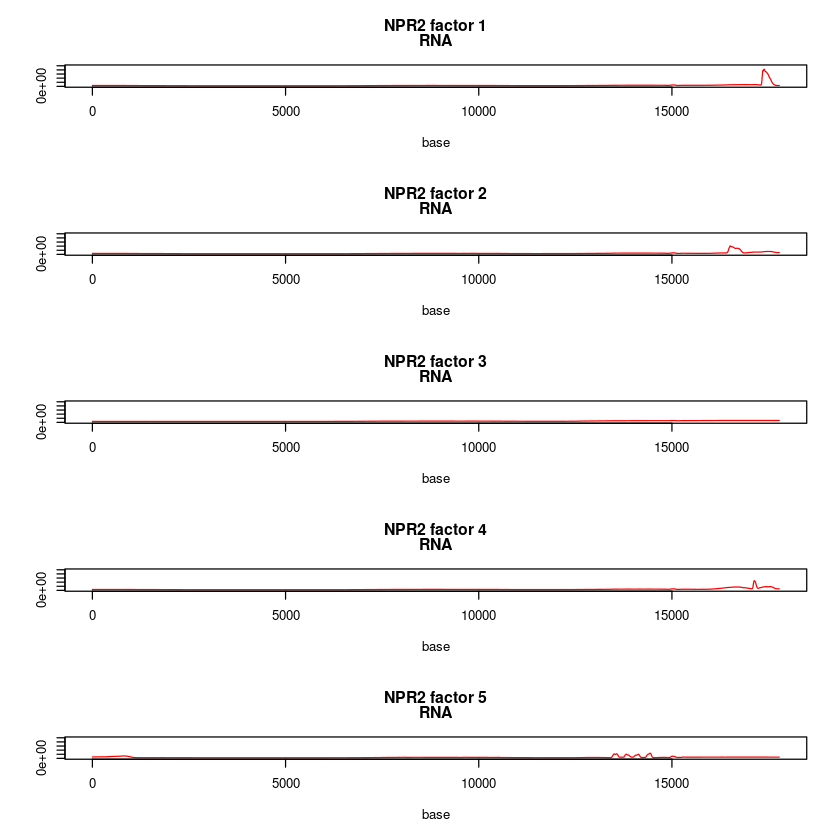

[1] ""


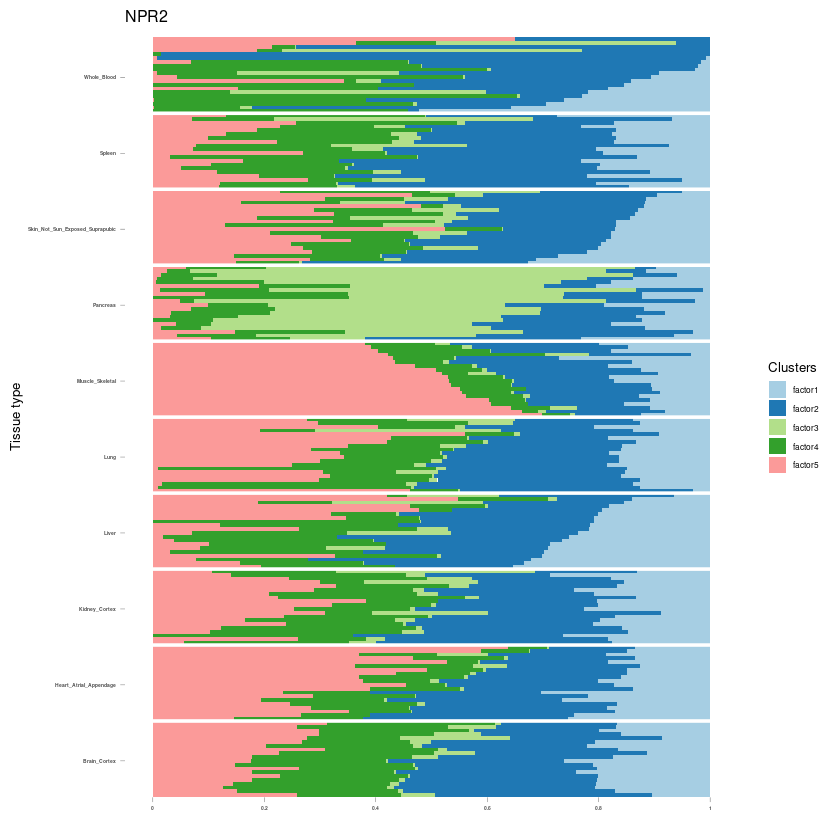

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


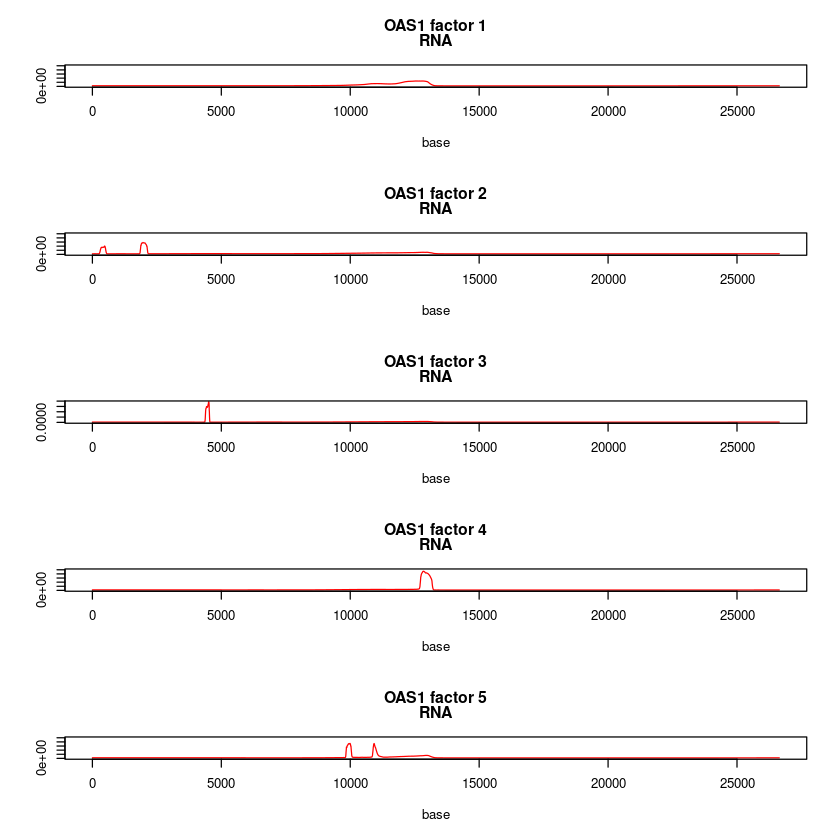

[1] ""


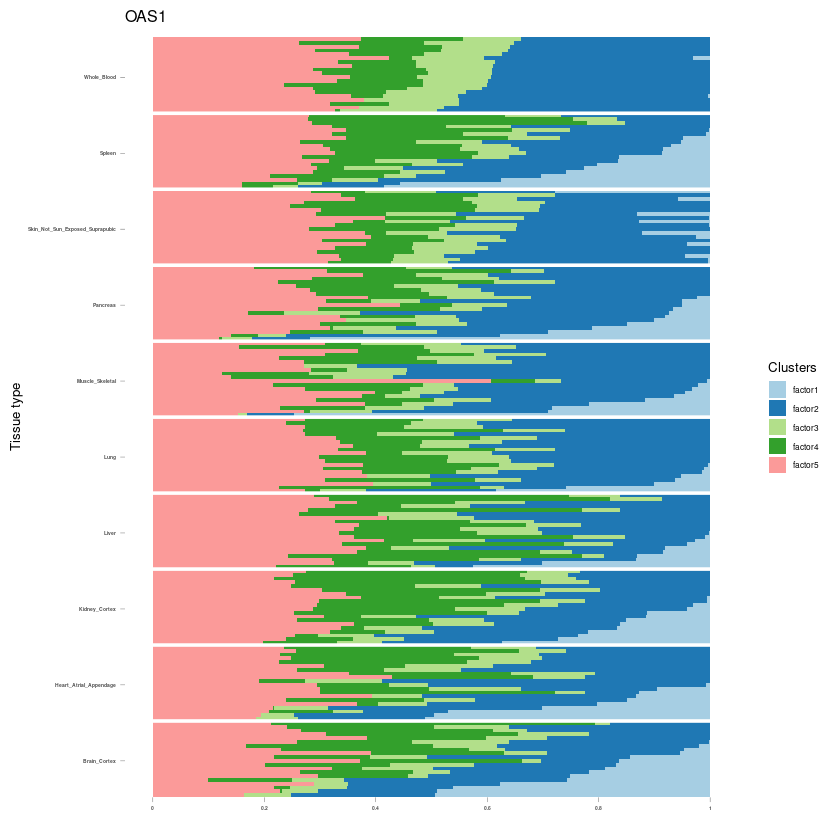

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


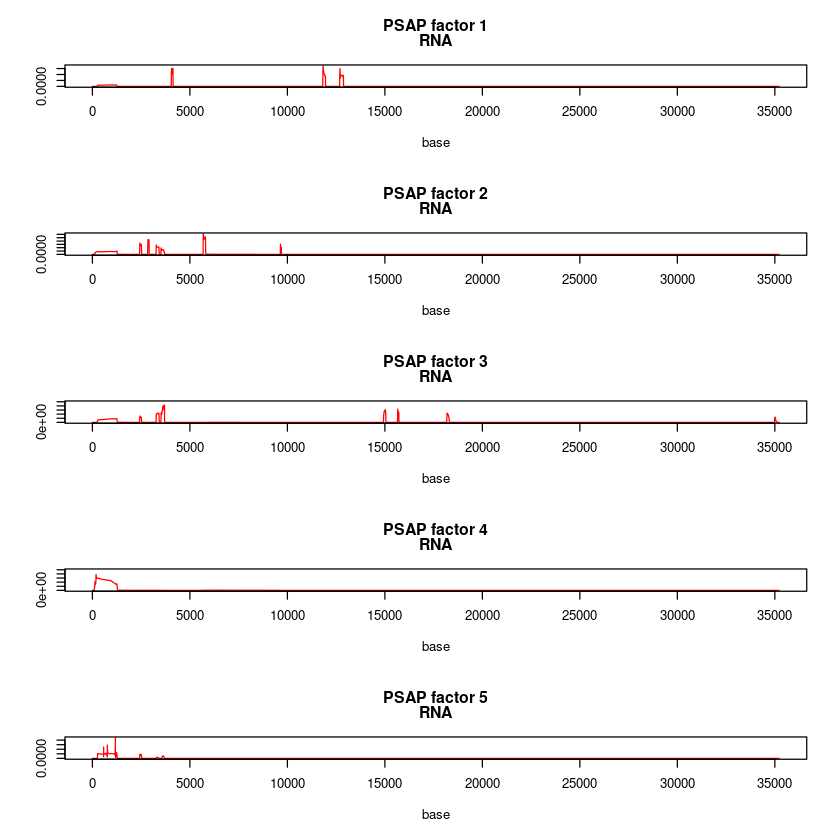

[1] ""


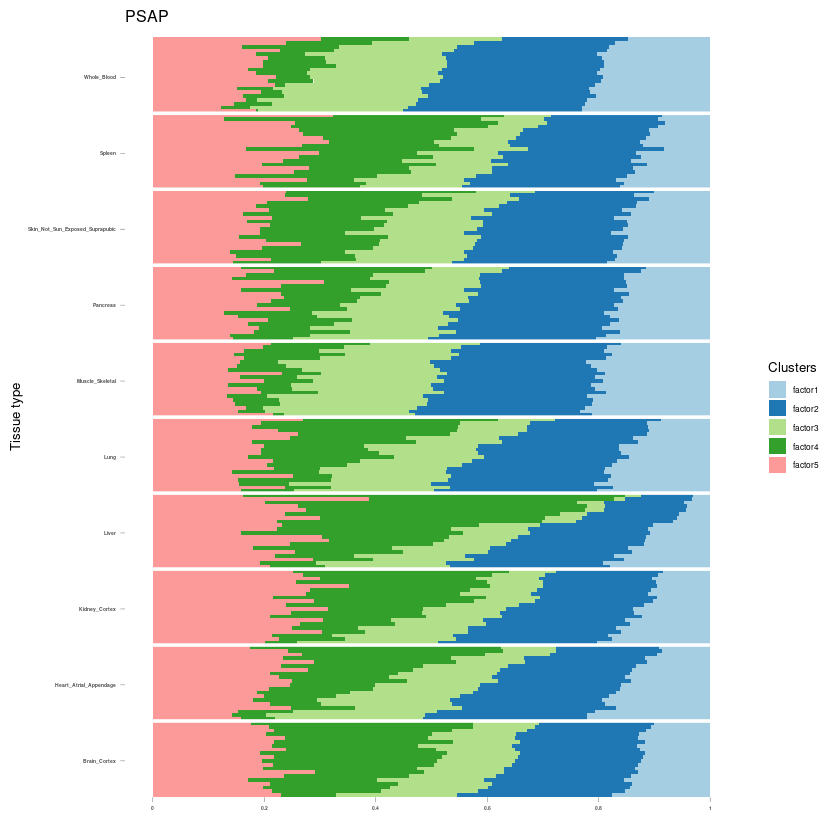

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


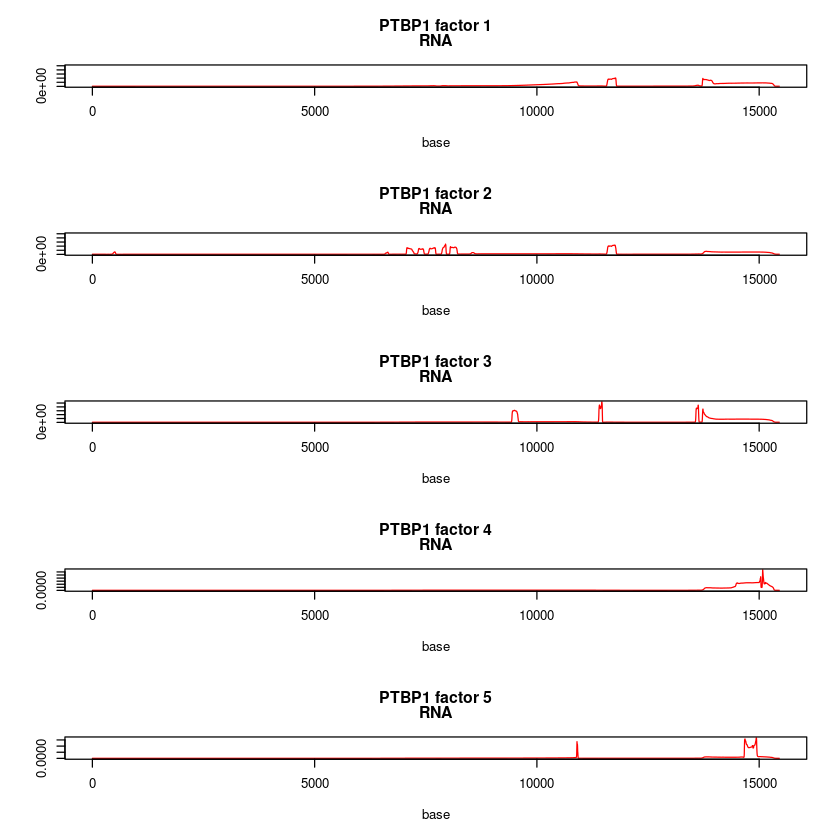

[1] ""


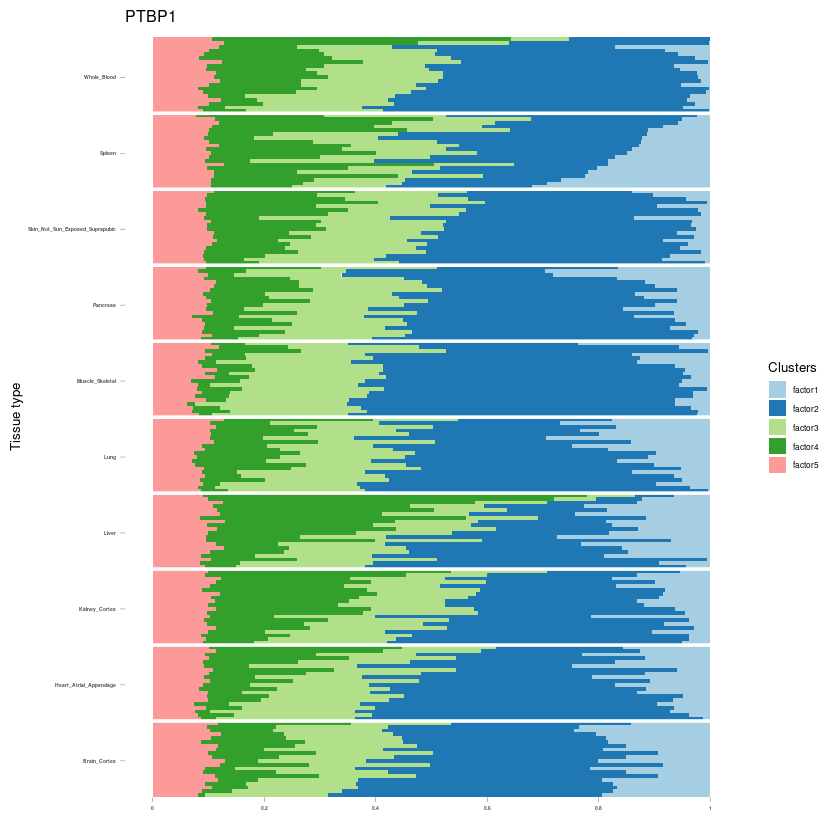

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


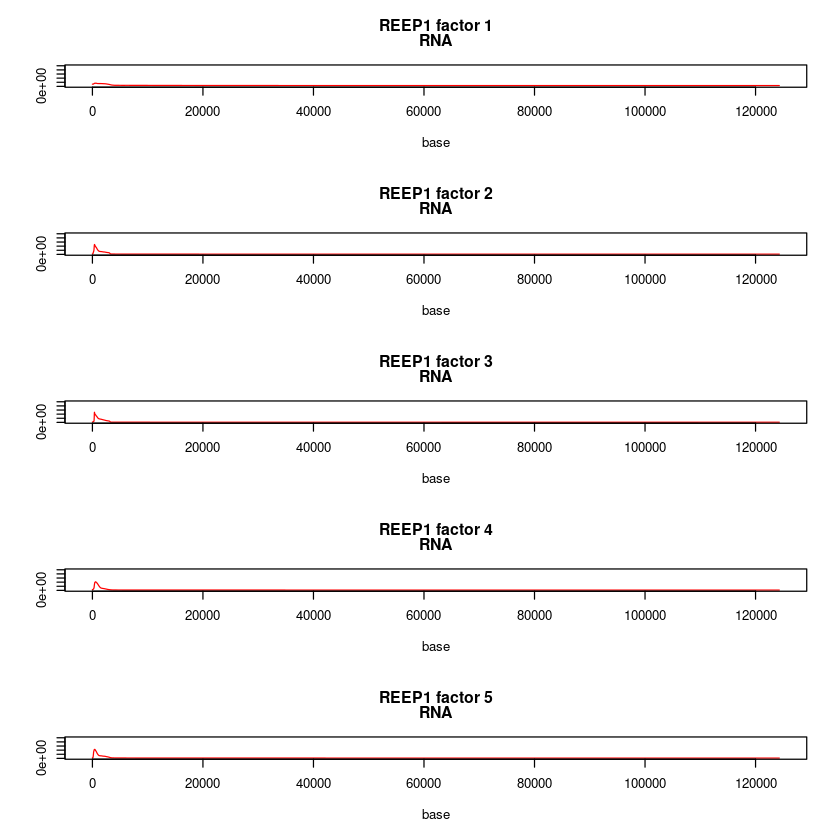

[1] ""


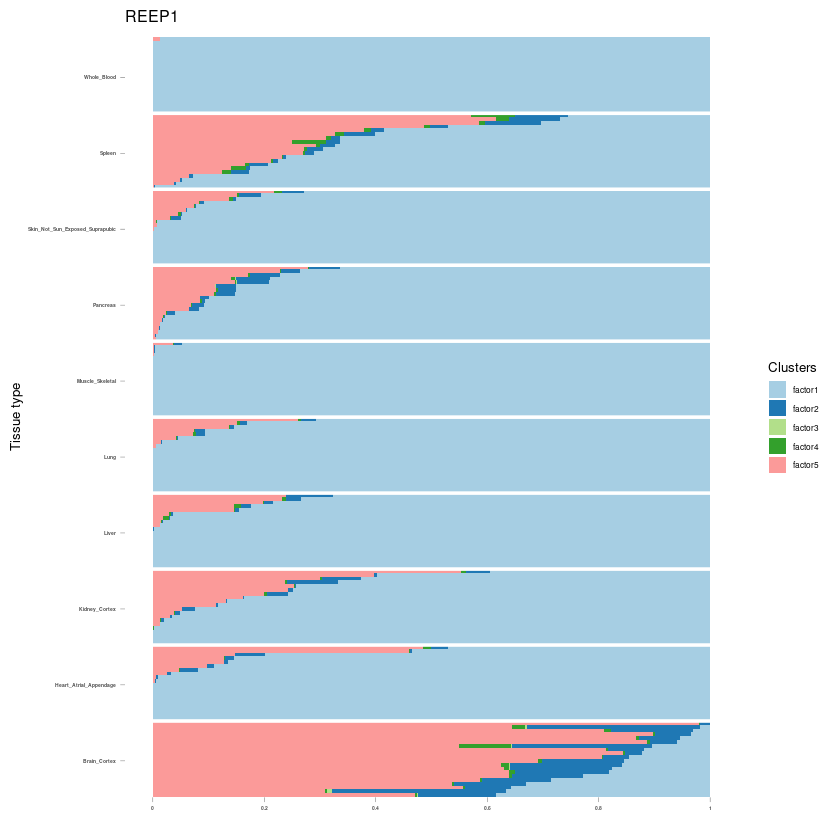

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


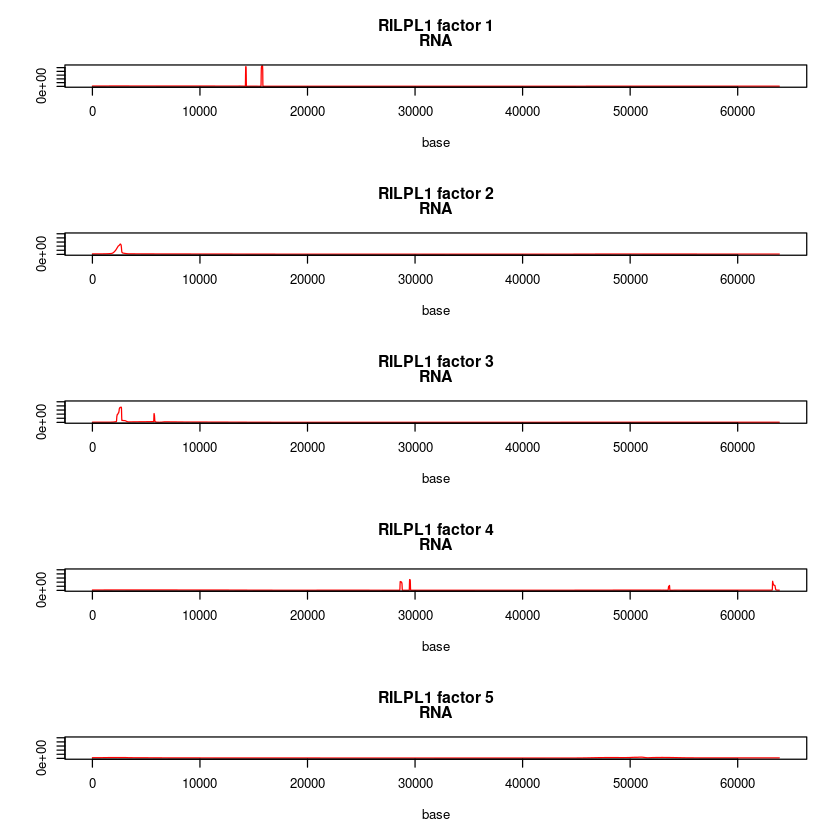

[1] ""


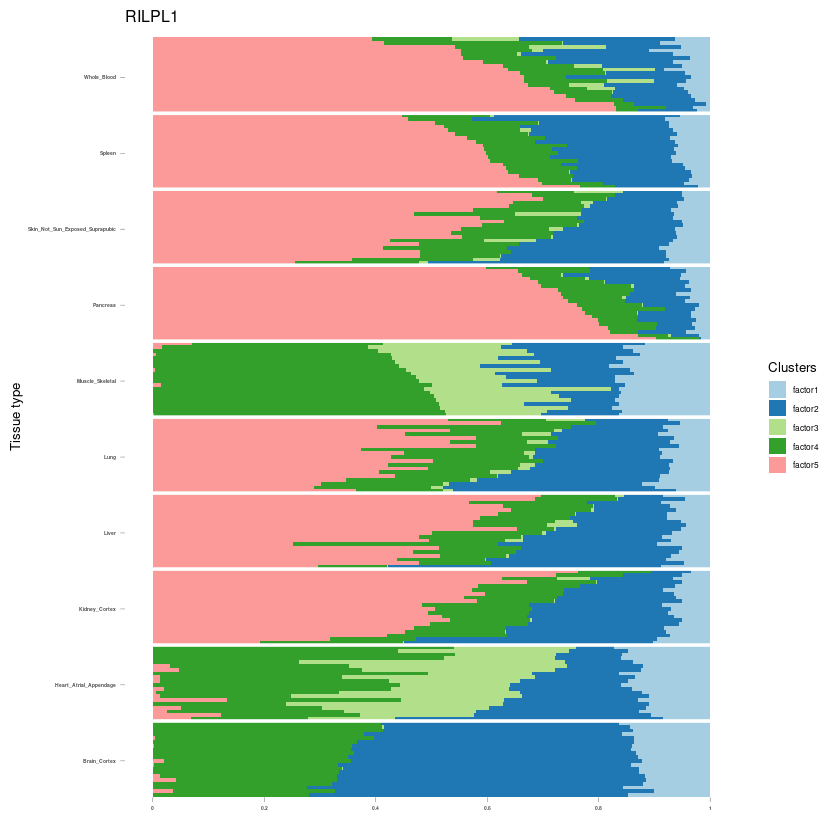

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


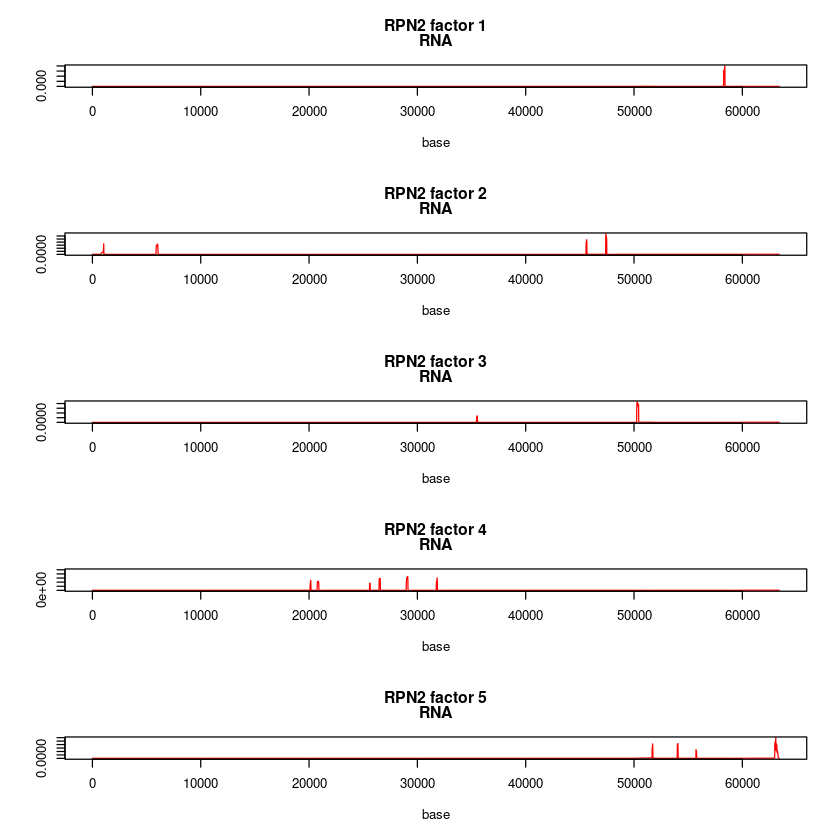

[1] ""


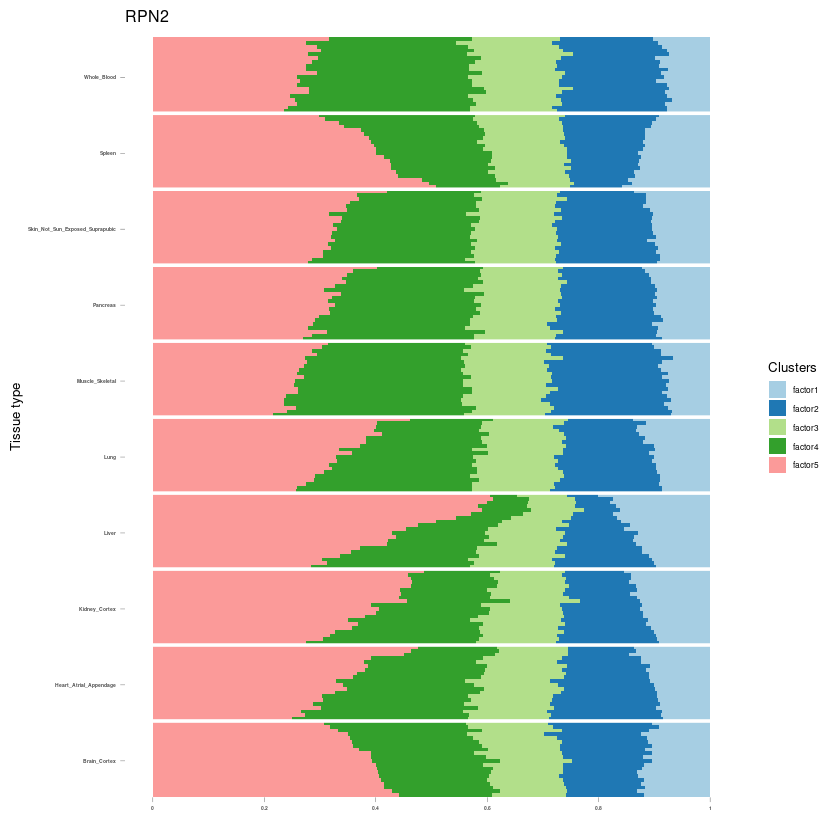

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


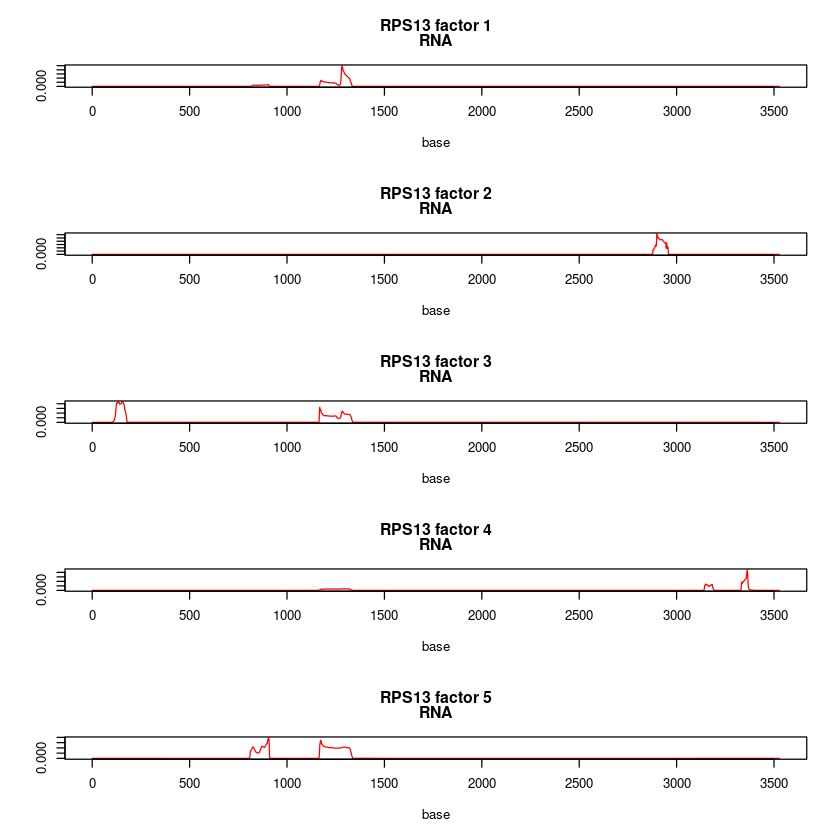

[1] ""


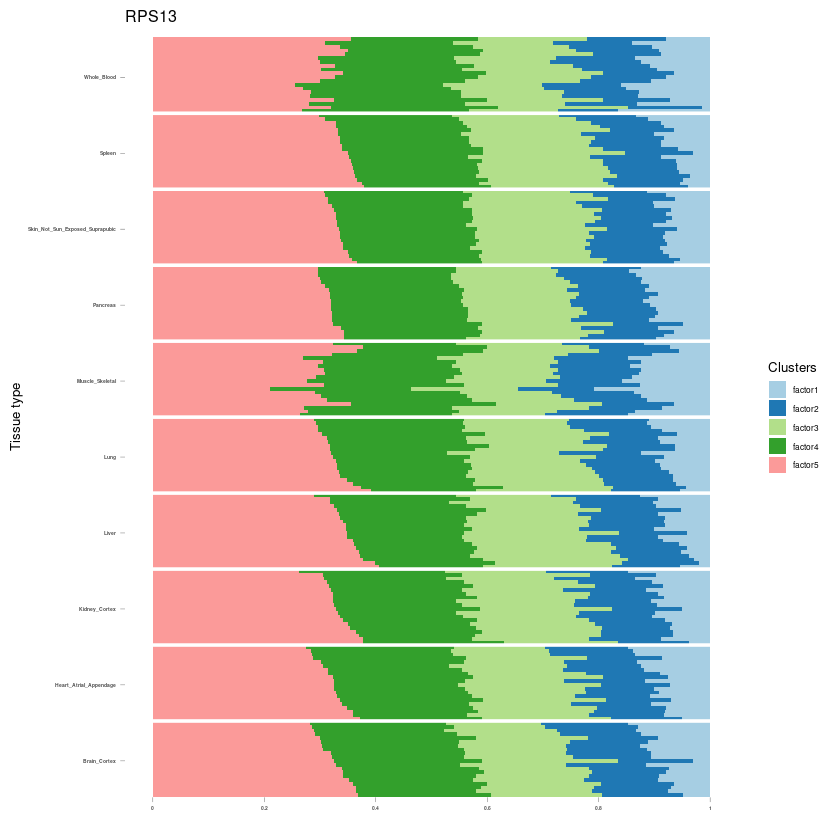

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


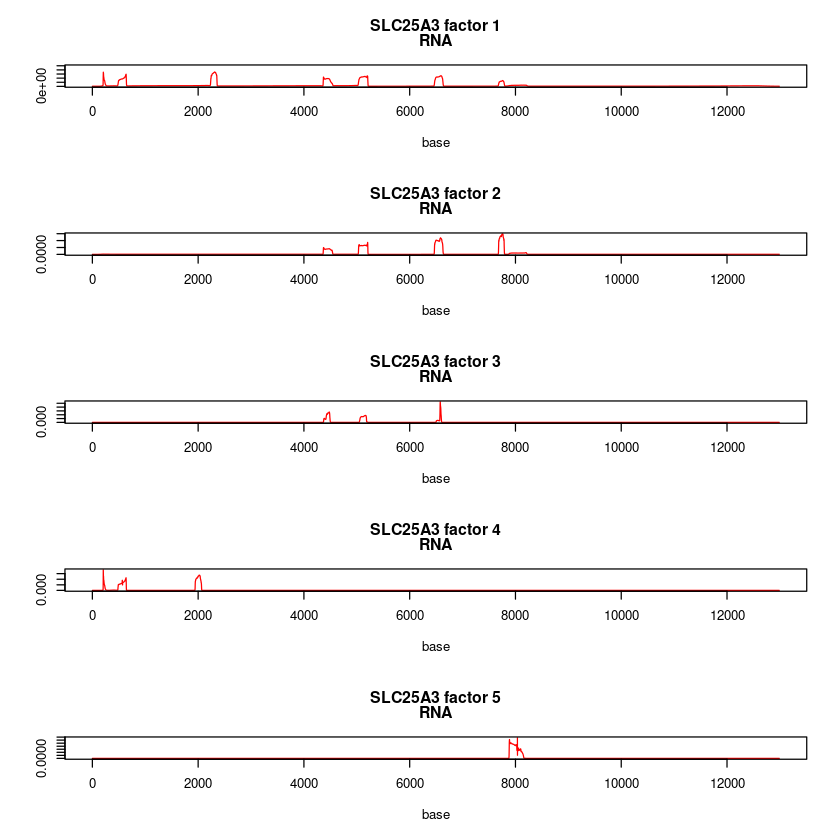

[1] ""


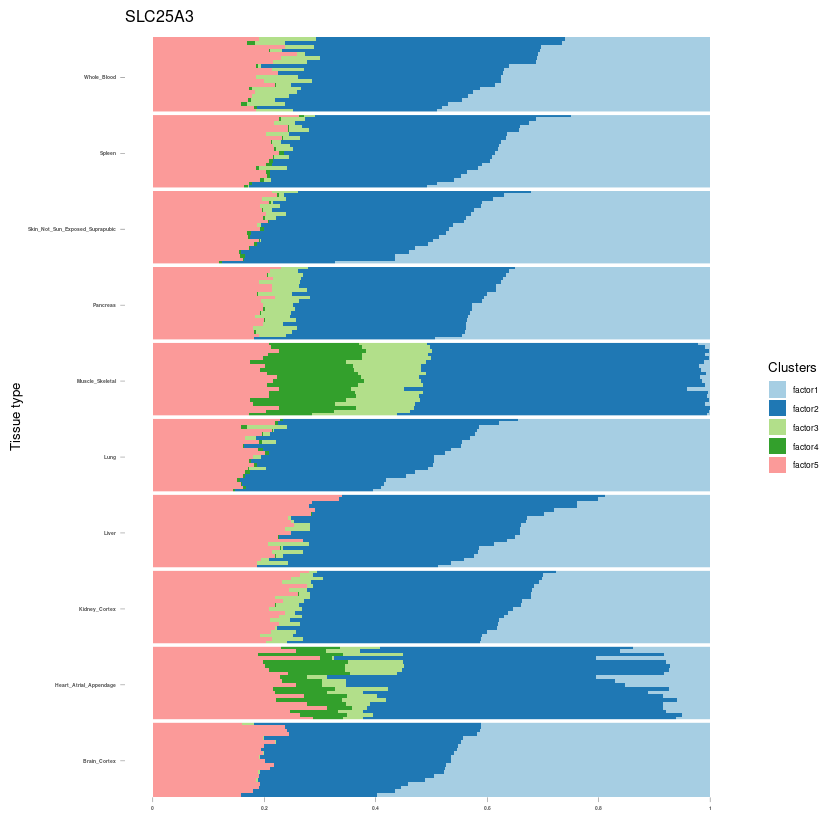

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


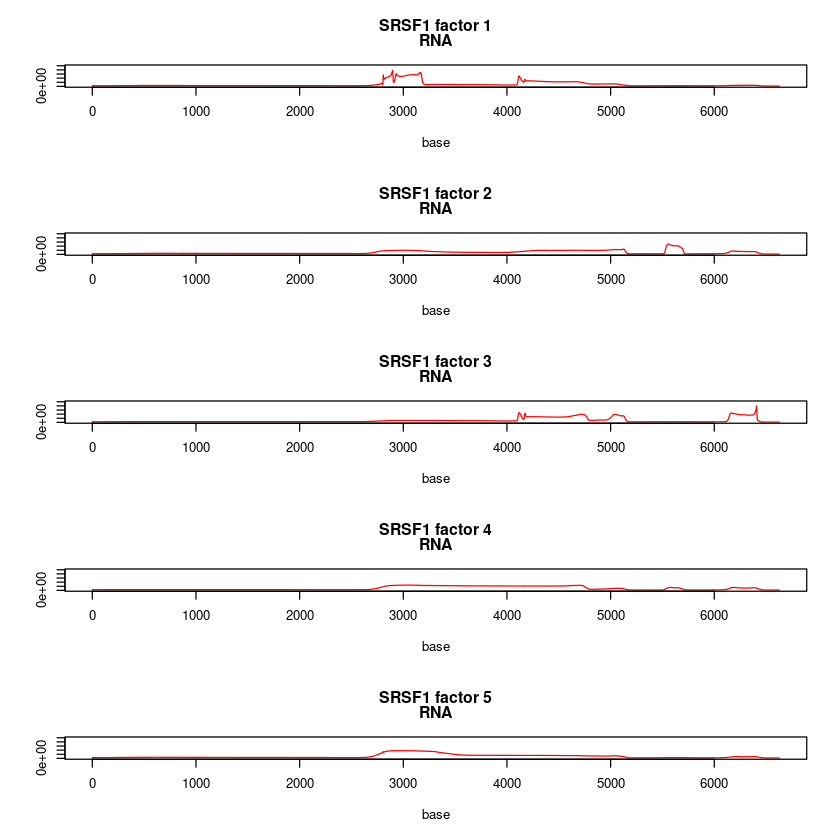

[1] ""


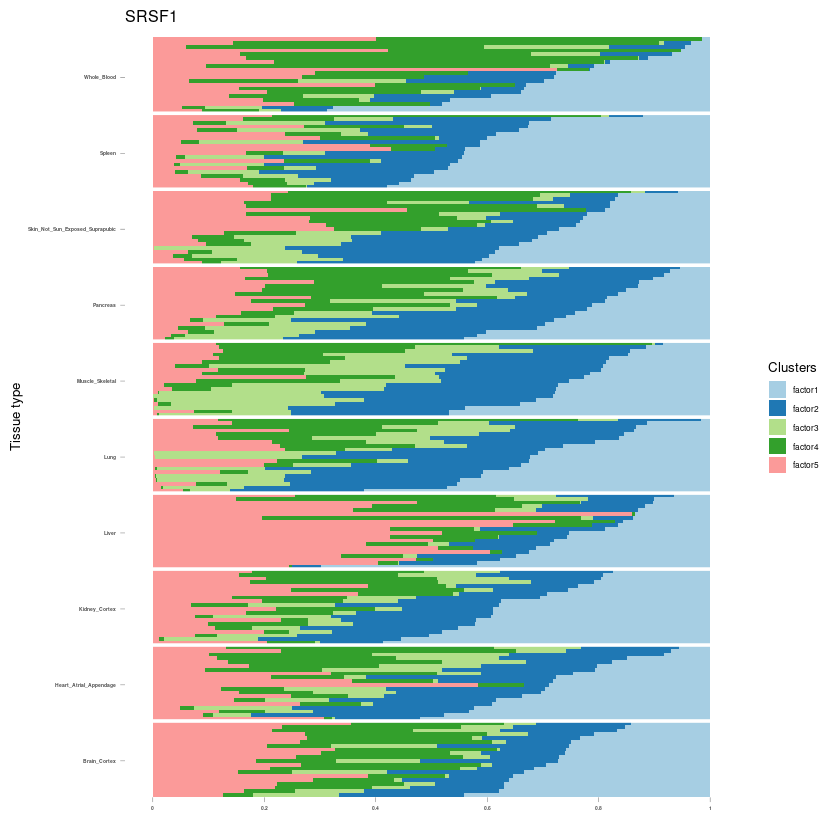

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


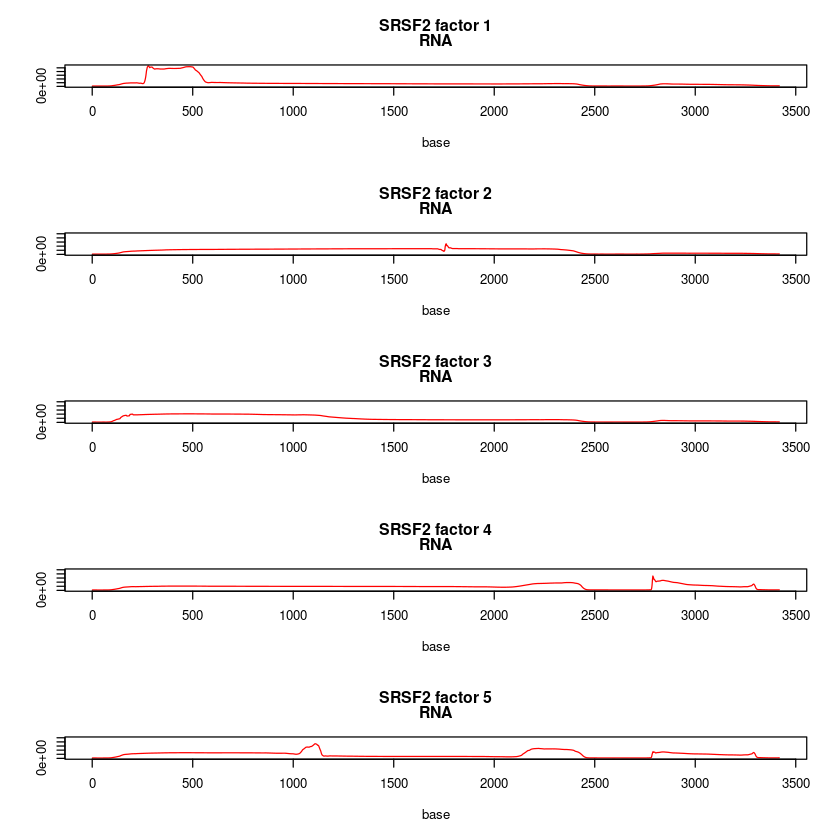

[1] ""


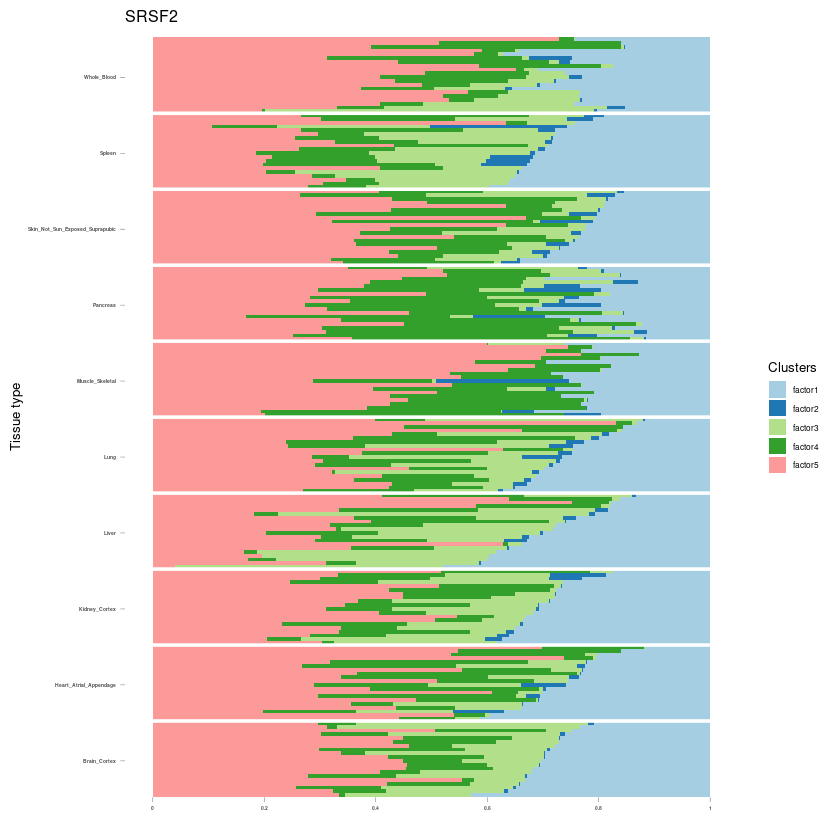

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


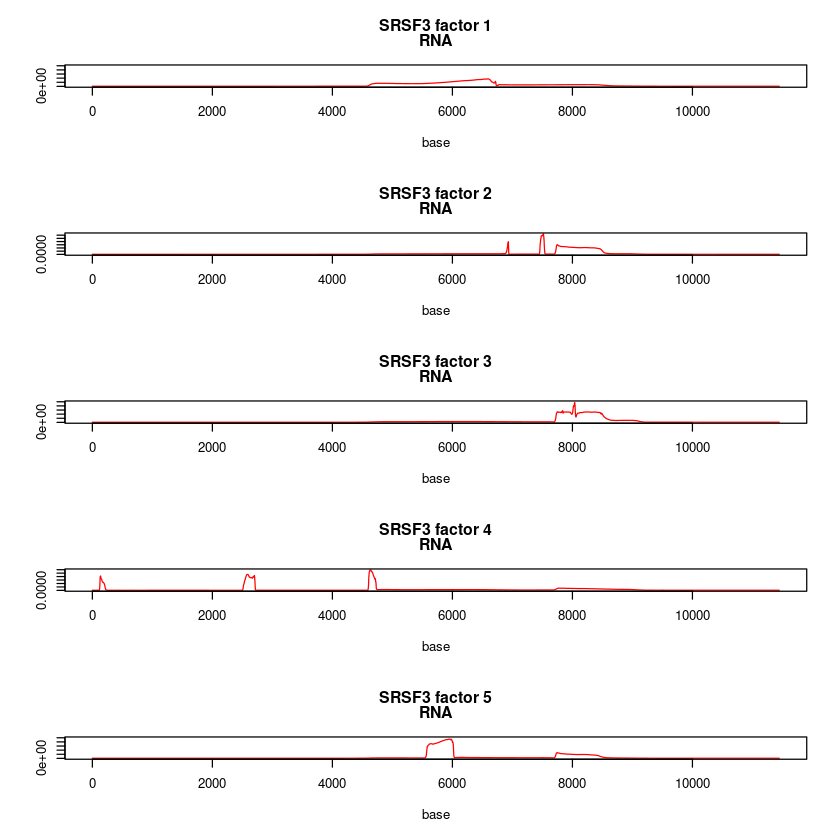

[1] ""


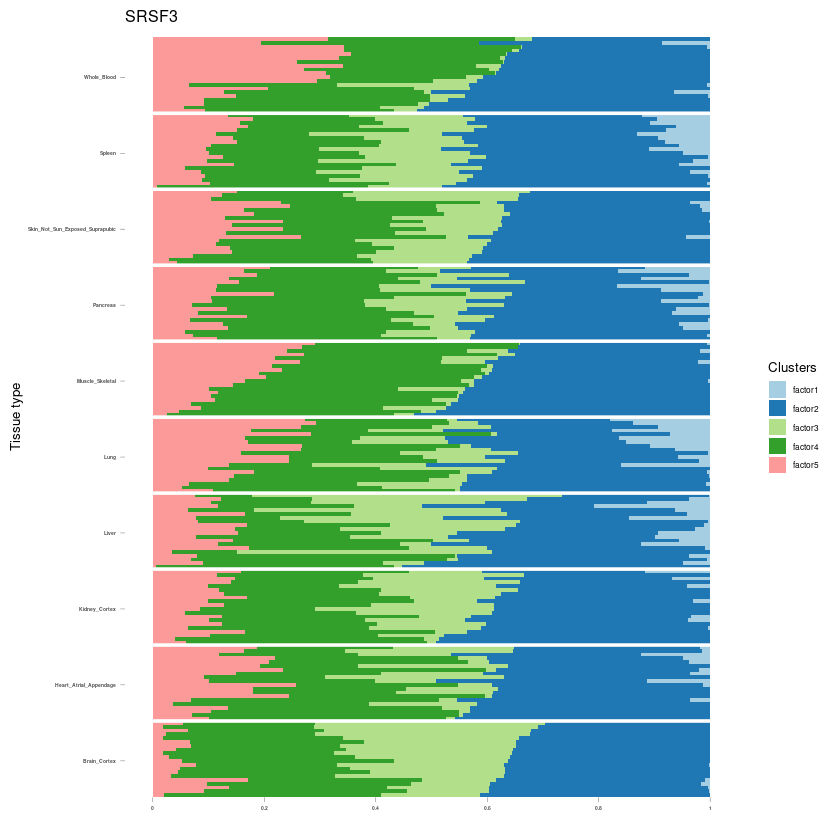

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


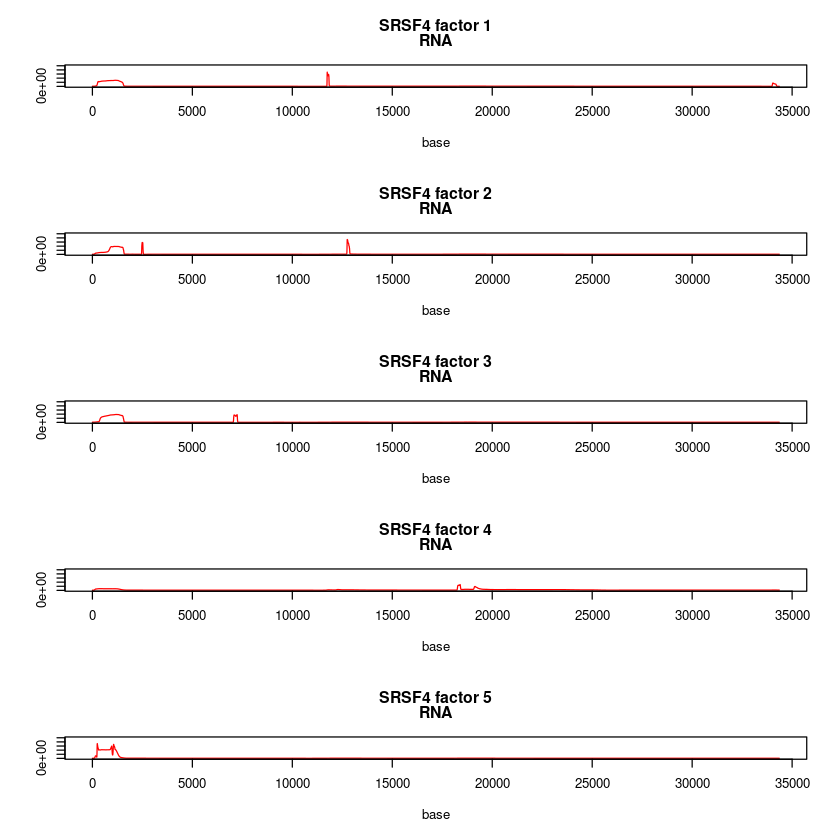

[1] ""


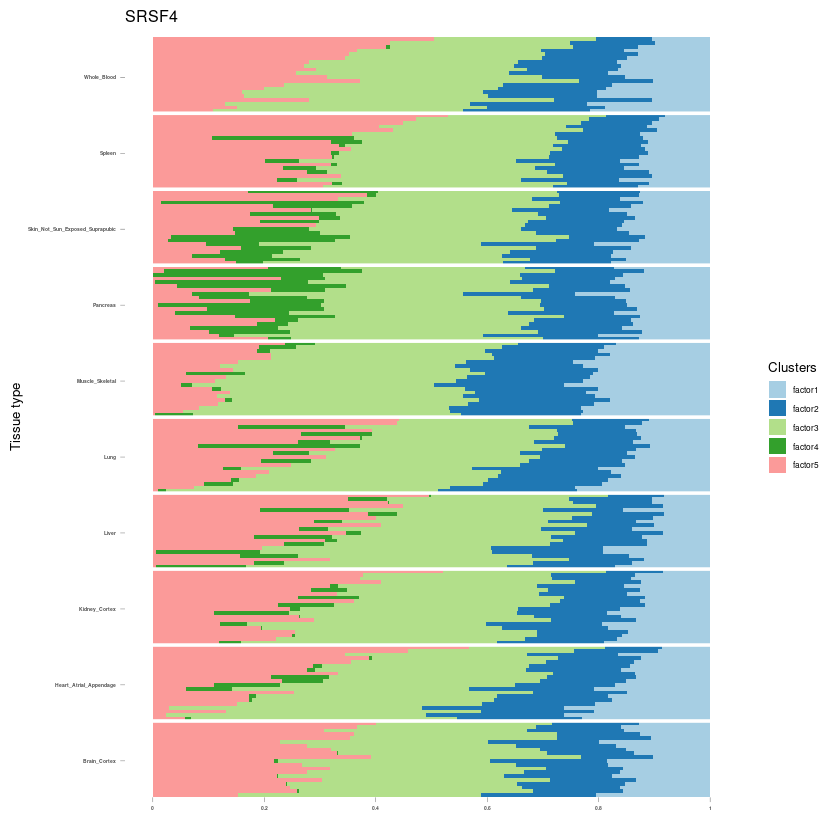

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


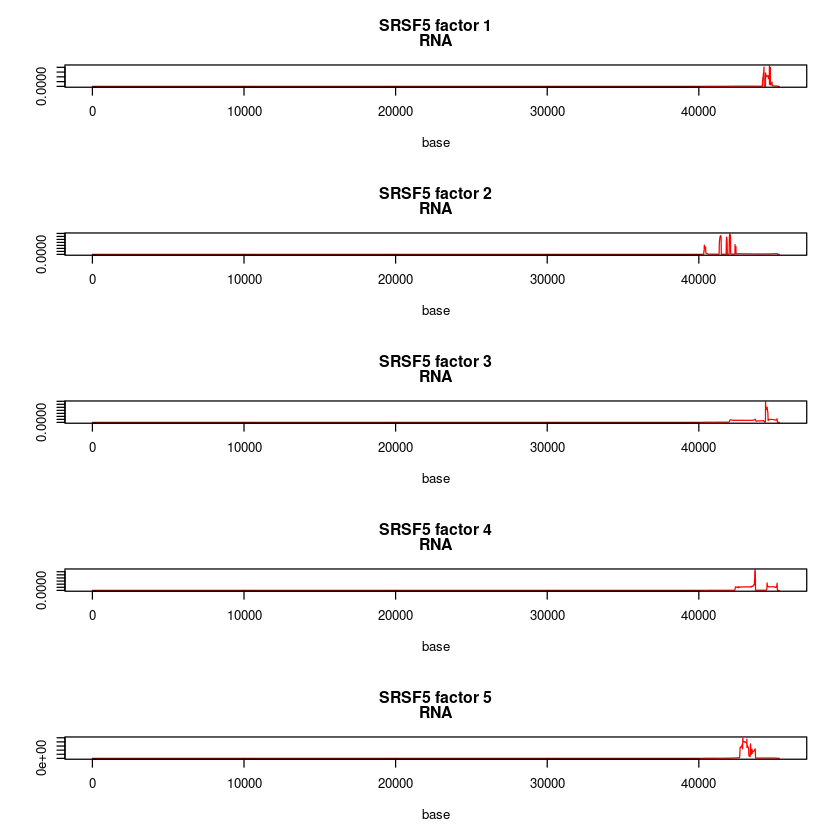

[1] ""


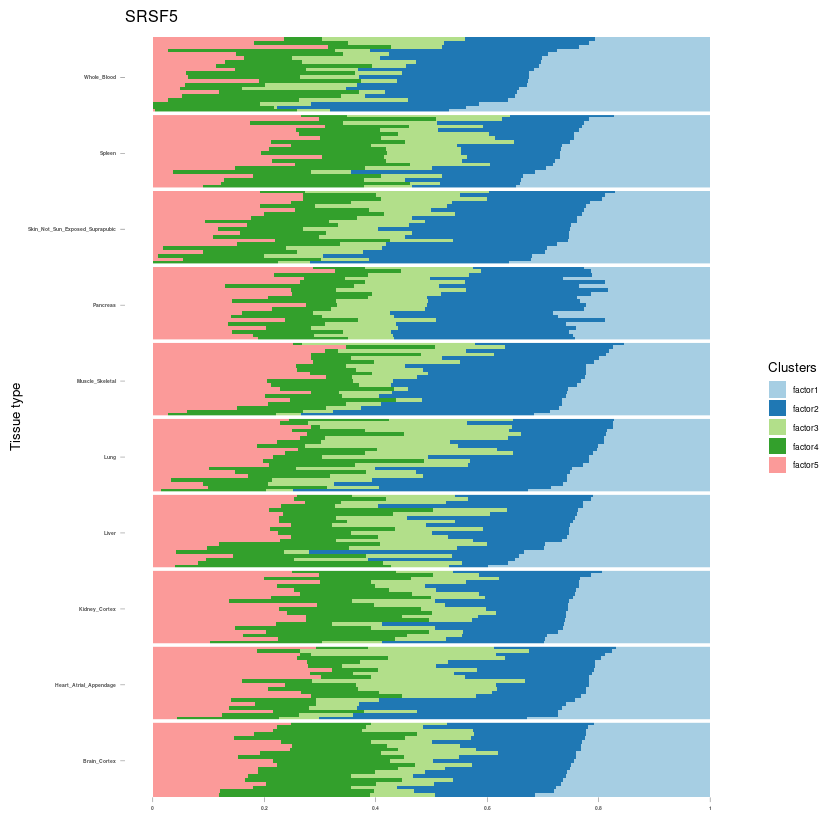

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


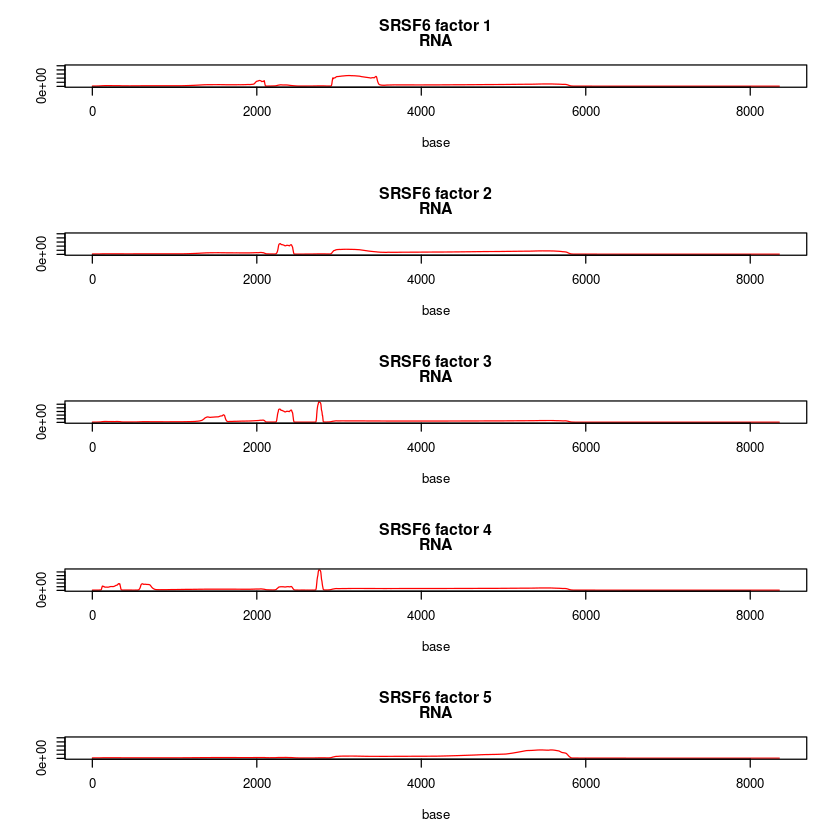

[1] ""


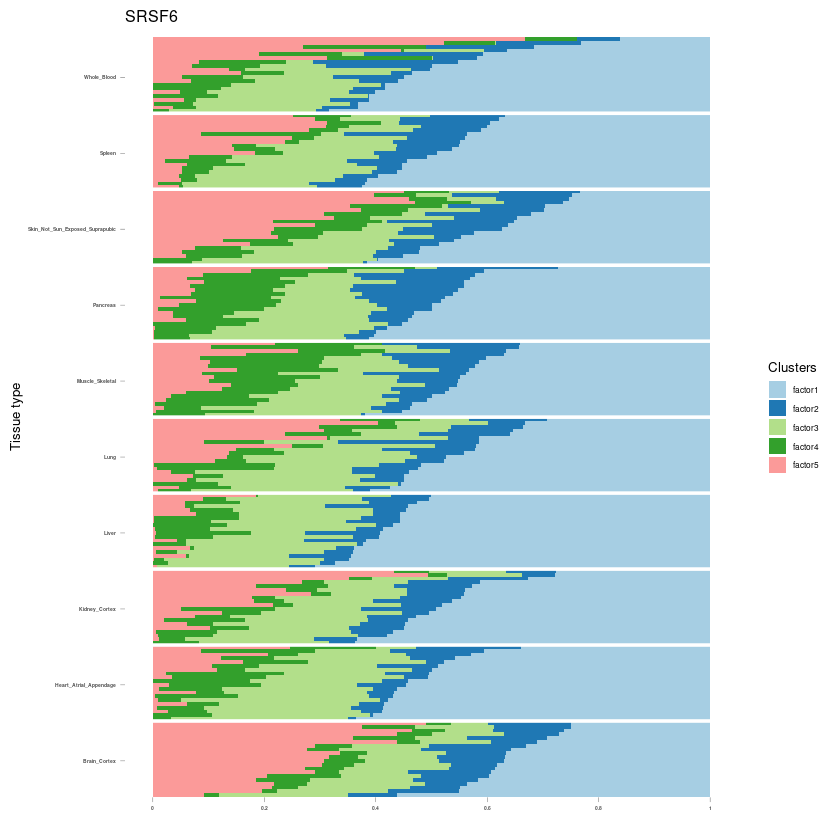

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


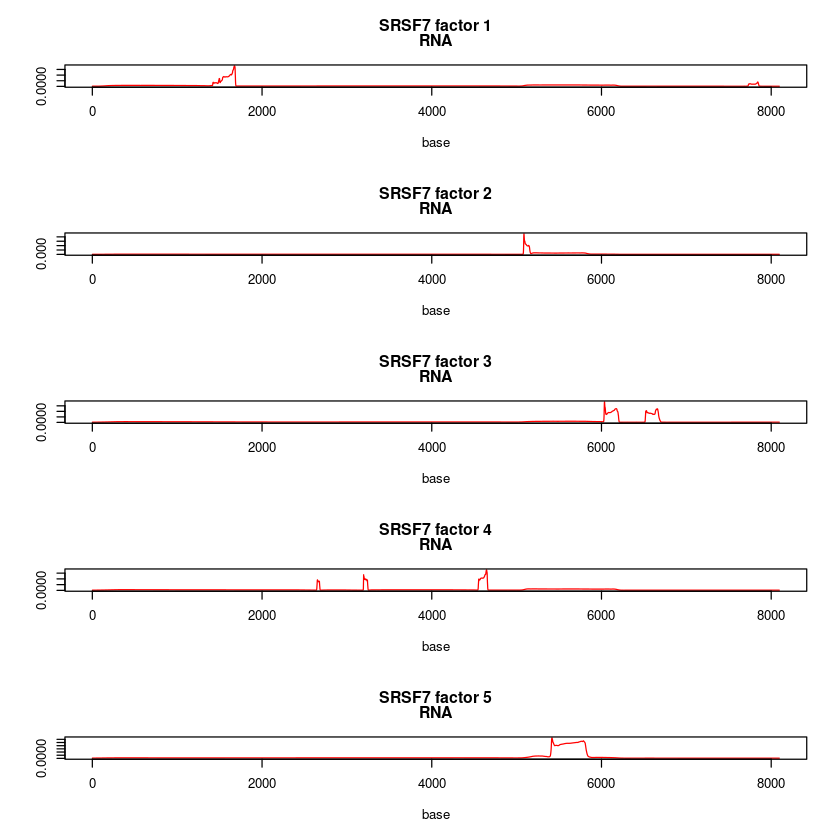

[1] ""


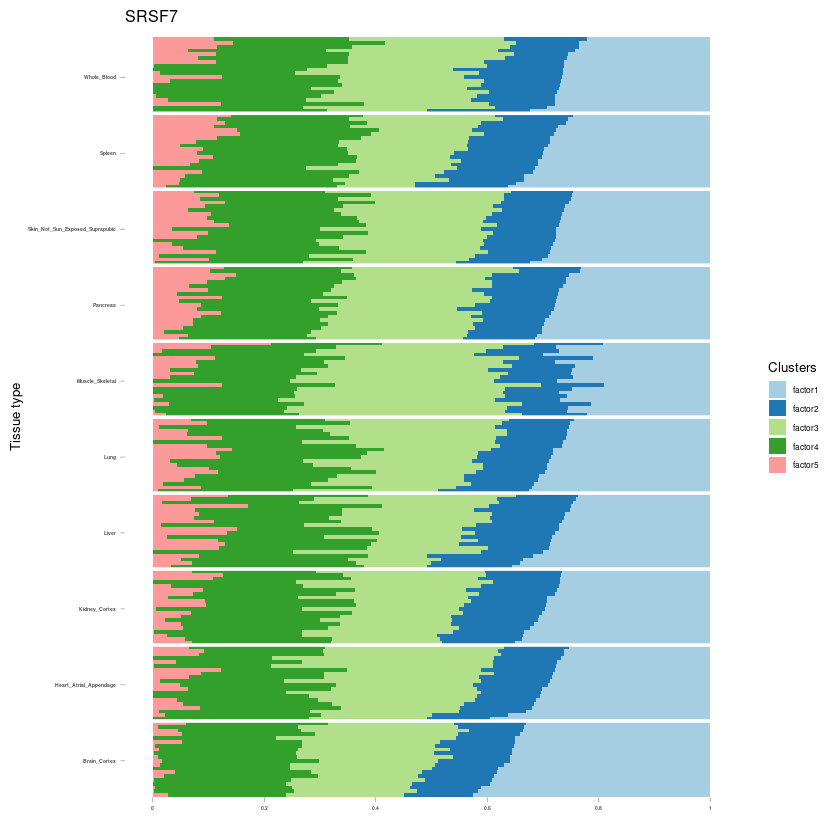

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


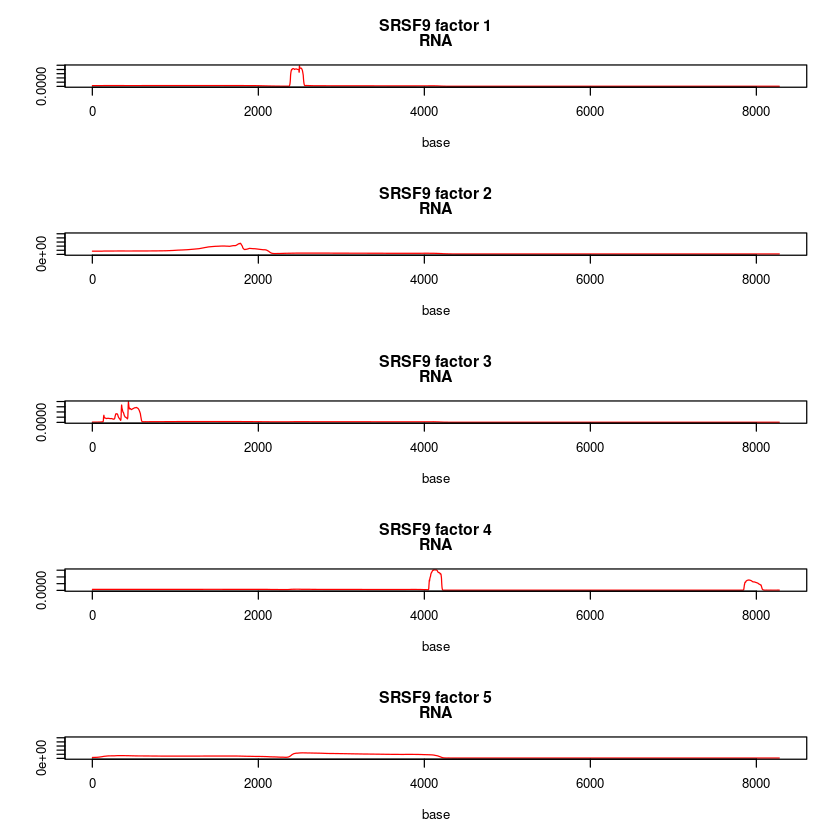

[1] ""


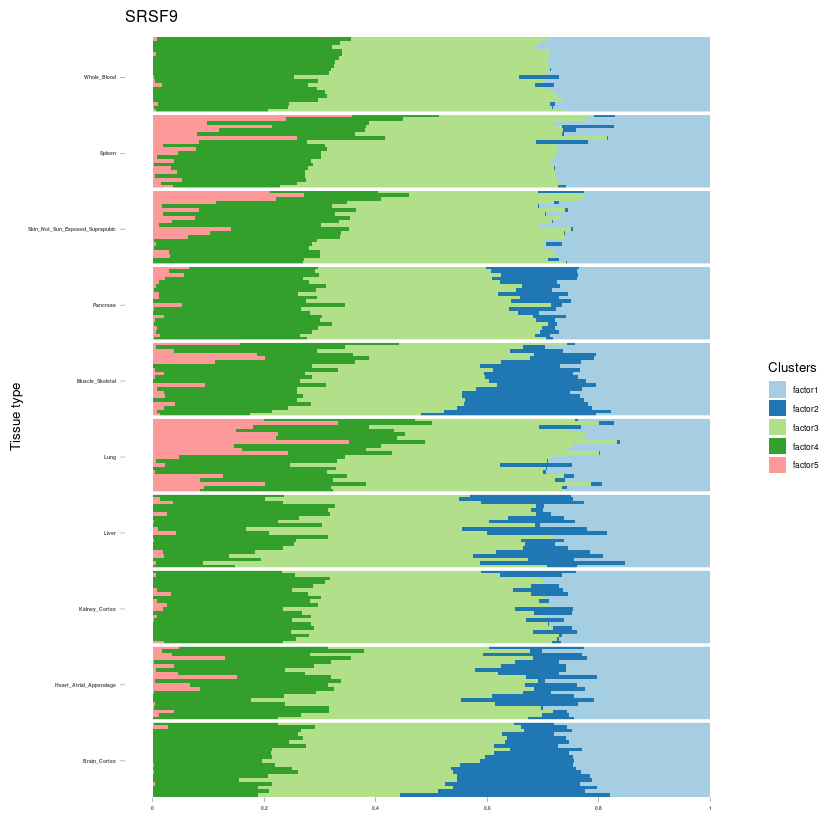

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


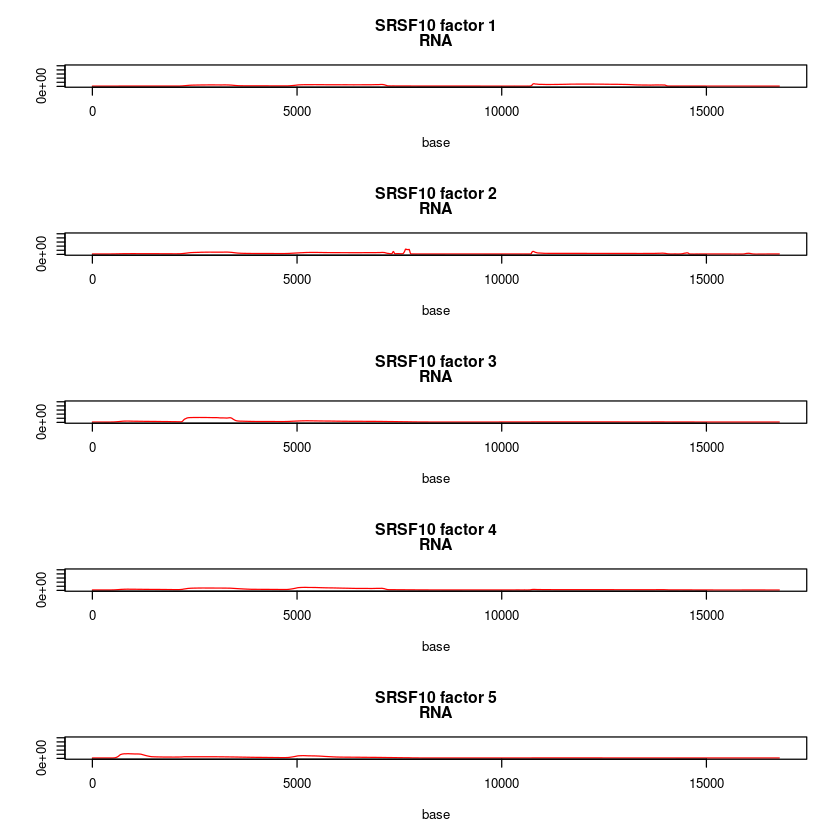

[1] ""


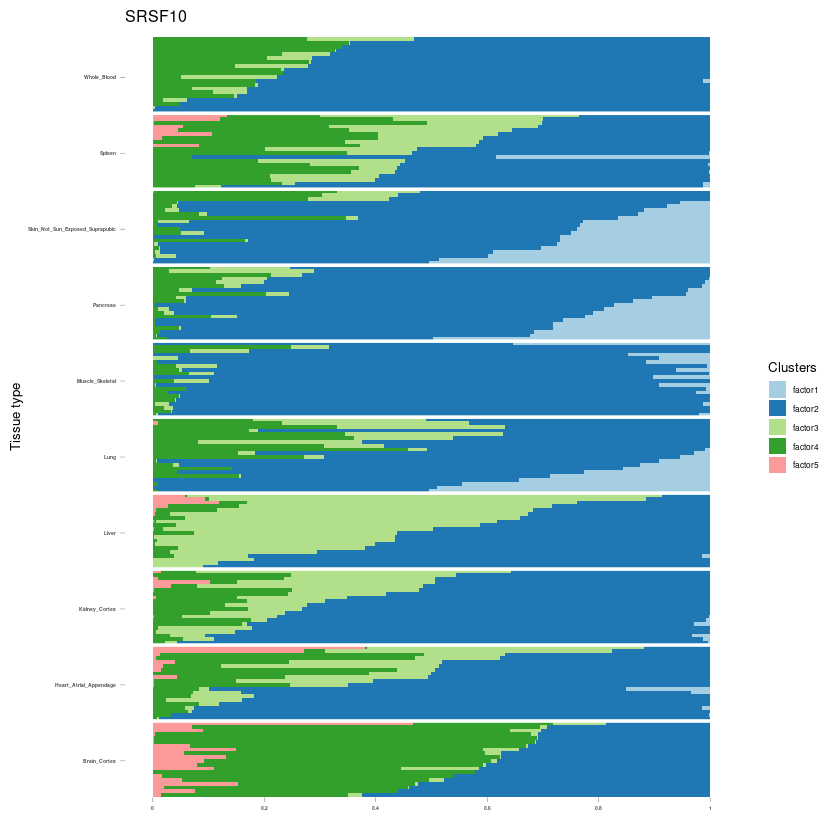

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


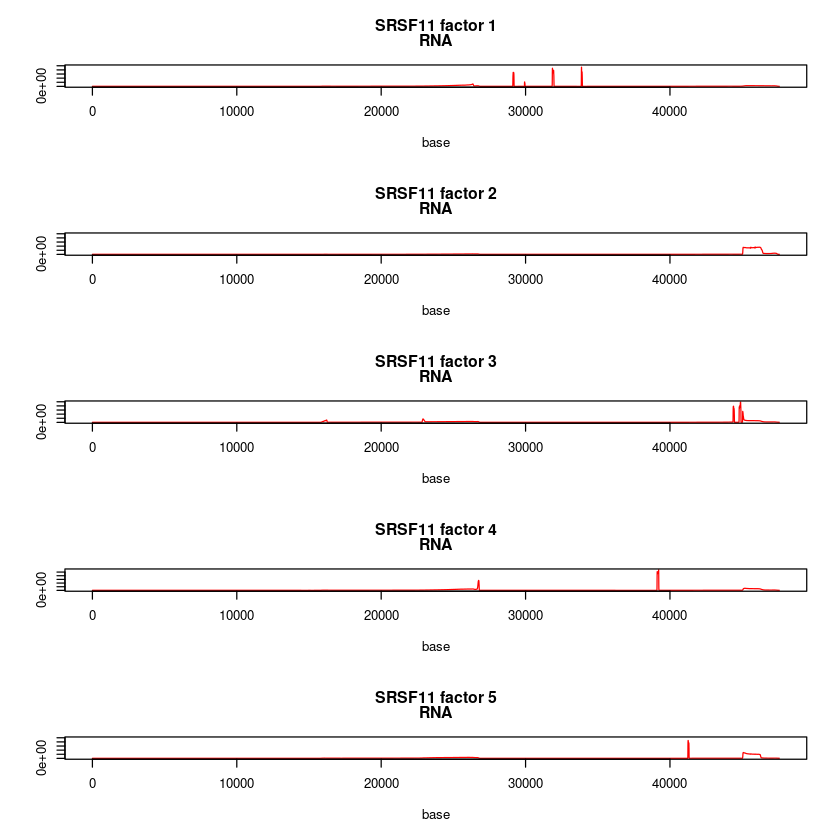

[1] ""


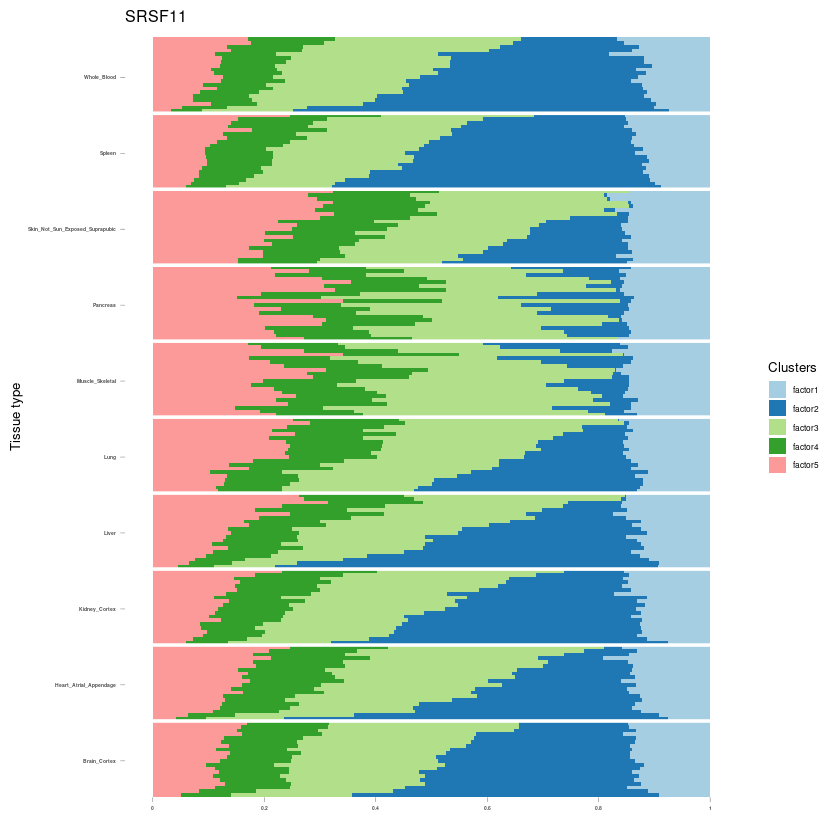

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


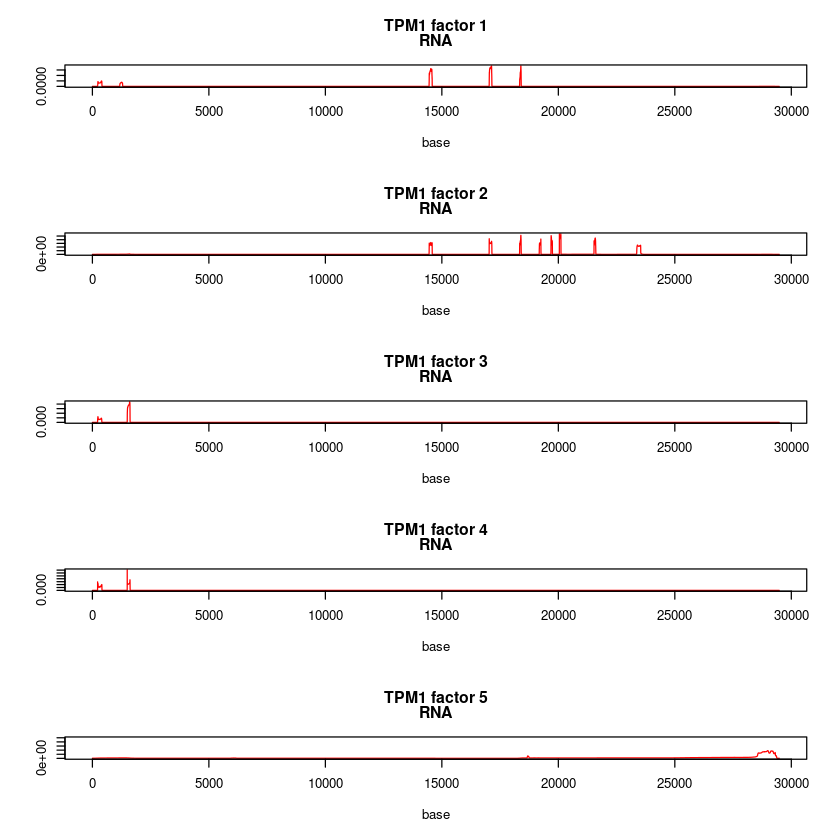

[1] ""


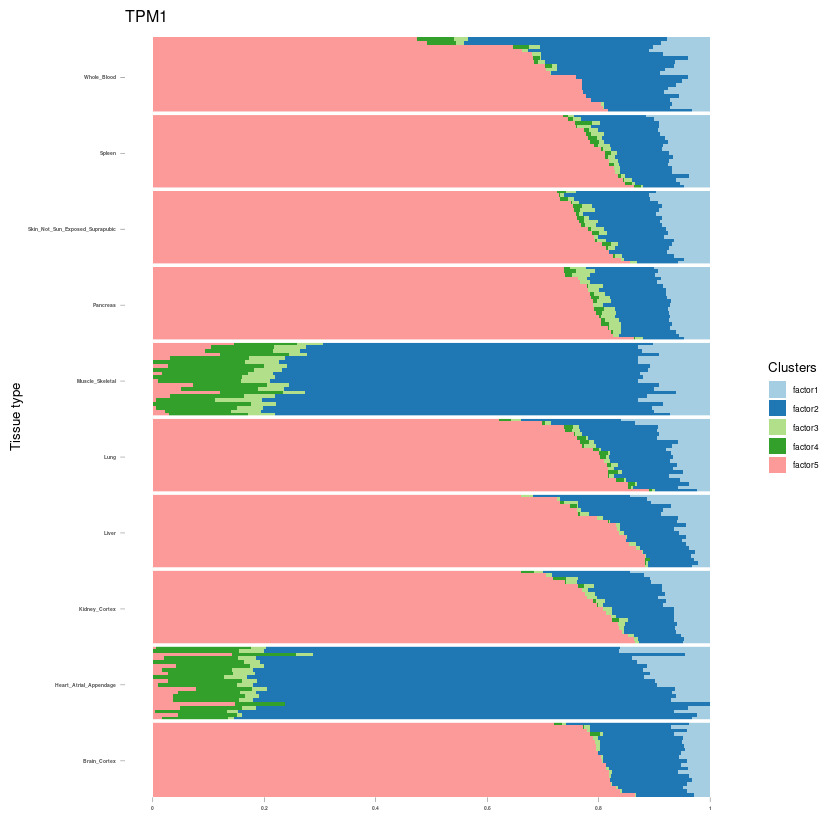

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


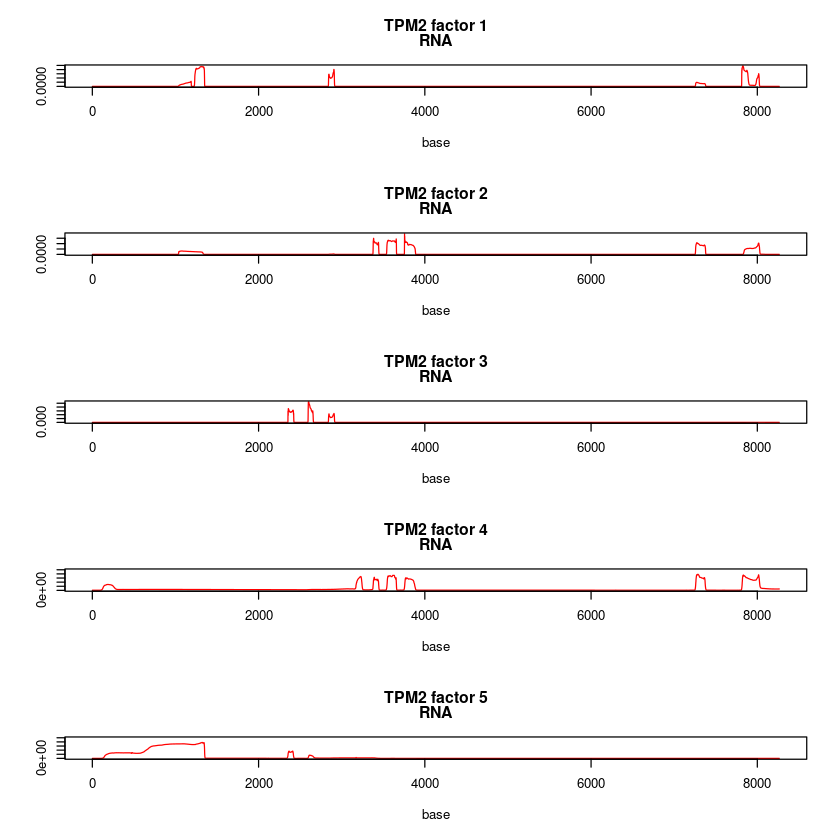

[1] ""


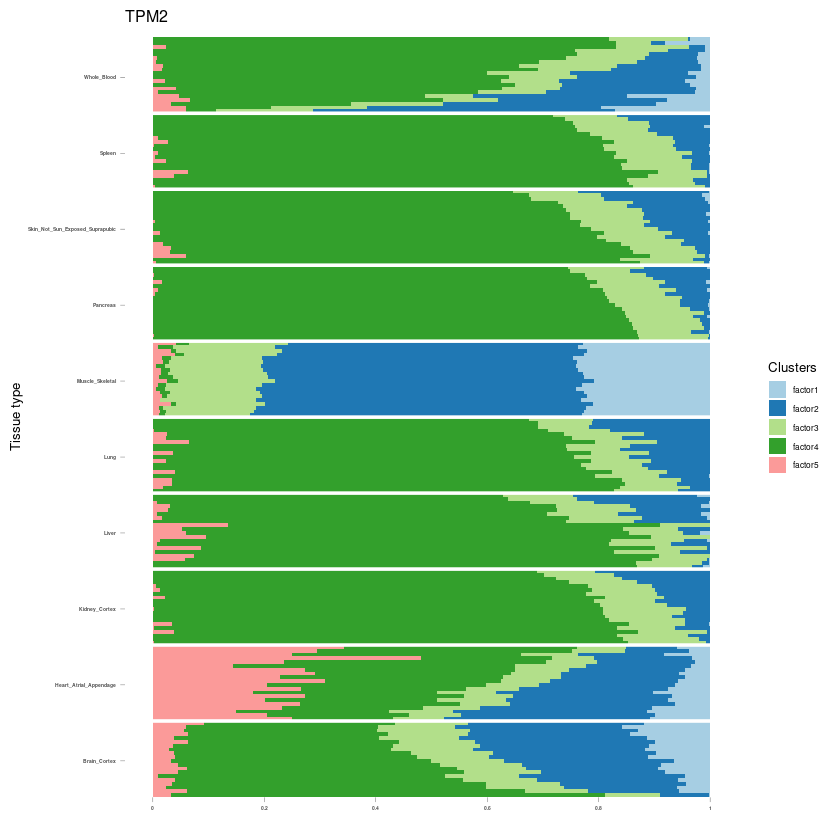

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


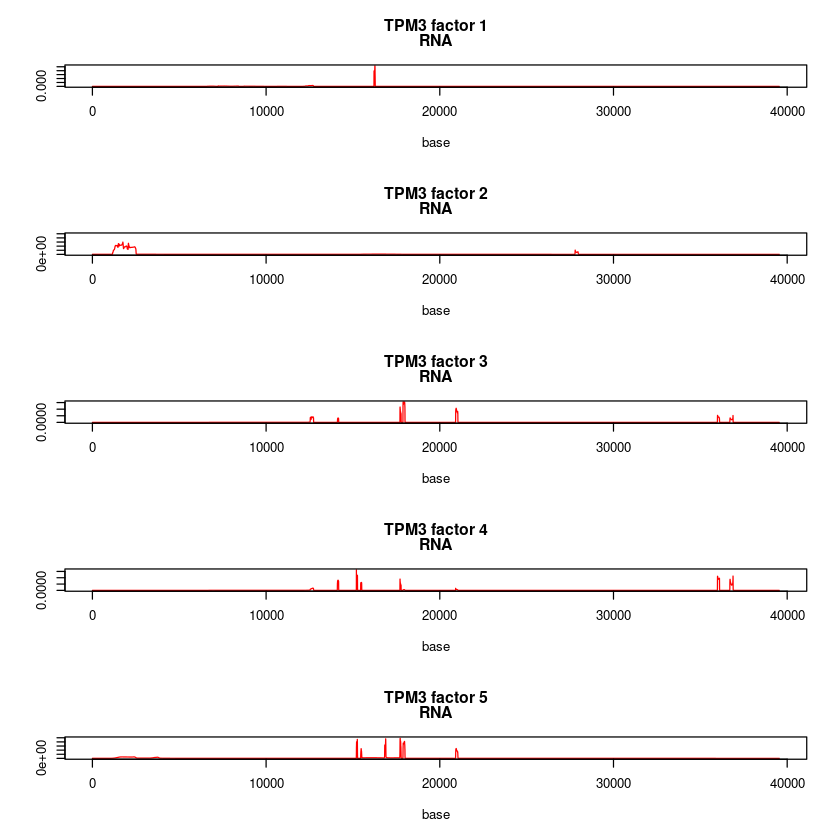

[1] ""


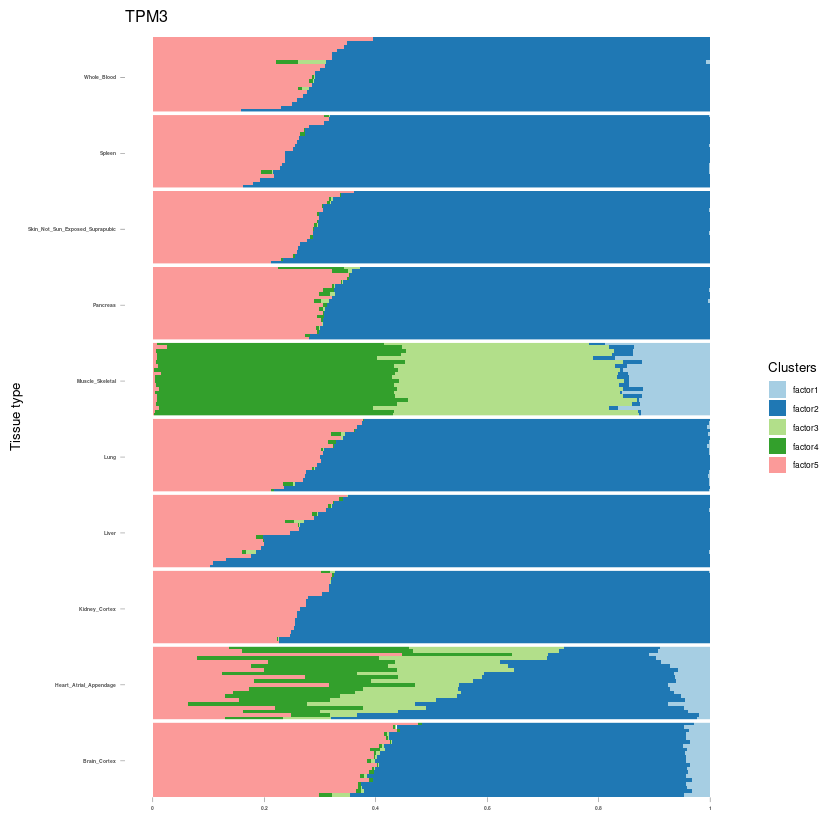

In [5]:
glist <- c('BCL2L1', 'GPX3', 'HMGN3', 'MAPT', 'MYL7', 'NOVA2', 'NPR2', 'OAS1', 'PSAP', 'PTBP1', 'REEP1', 
           'RILPL1', 'RPN2', 'RPS13',
           'SLC25A3', 'SRSF1', 'SRSF2', 'SRSF3', 'SRSF4', 'SRSF5', 'SRSF6', 'SRSF7', 'SRSF9', 'SRSF10', 'SRSF11',
            'TPM1', 'TPM2',  'TPM3')

for (g in glist) {
    save_fit (g)
    print('')
}

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


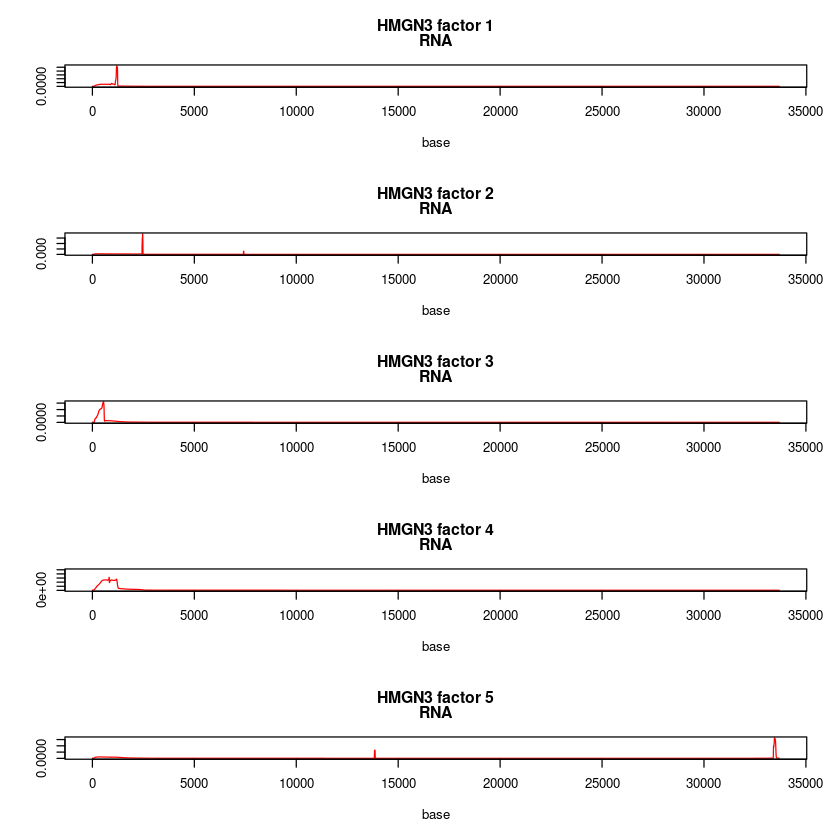

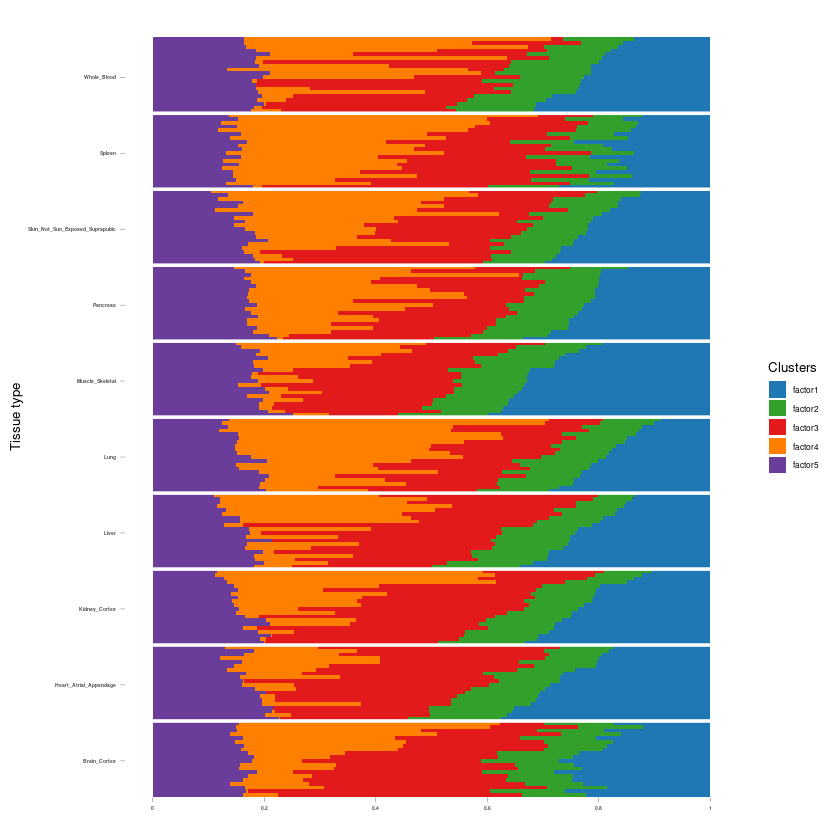

In [48]:
save_fit('HMGN3')

In [44]:
RColorBrewer::brewer.pal(10,  "Paired")[c(1, 3, 5, 7, 9)]

[1] "#A6CEE3" "#B2DF8A" "#FB9A99" "#FDBF6F" "#CAB2D6"

ERROR: Error in StructureGGplot(EL, annotation = annotation, palette = colores, : unused argument (axis_label_size = 5)


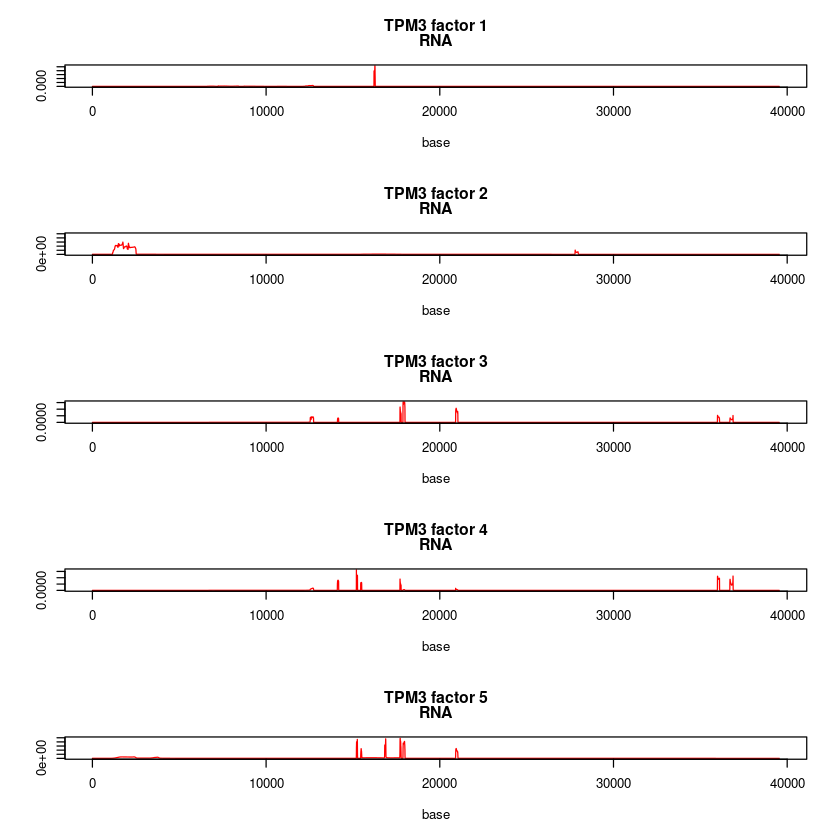

In [52]:
save_fit('TPM3')

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


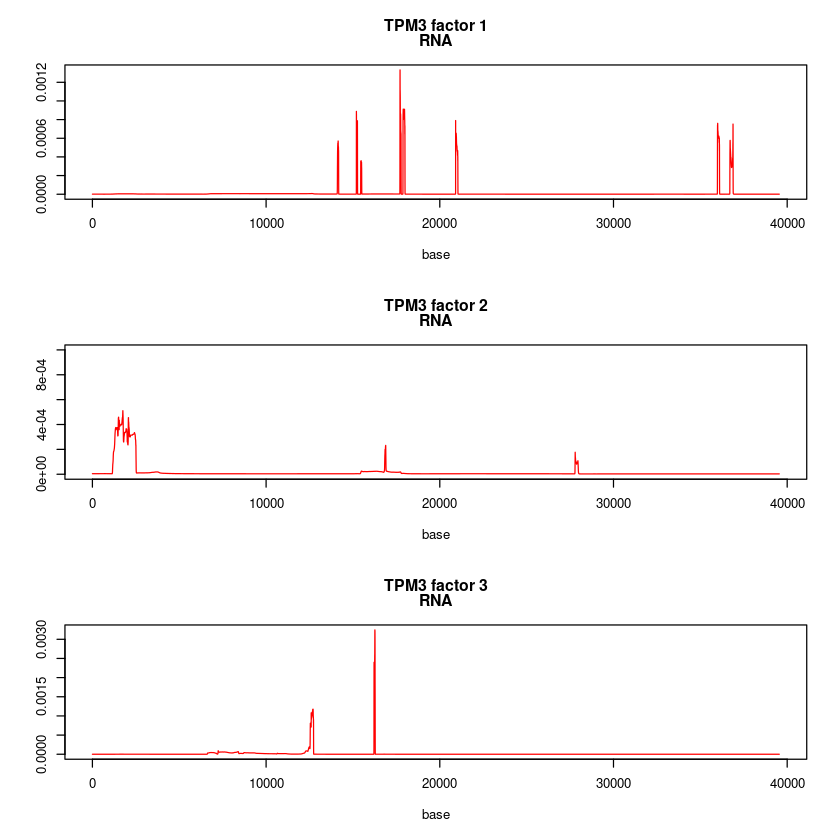

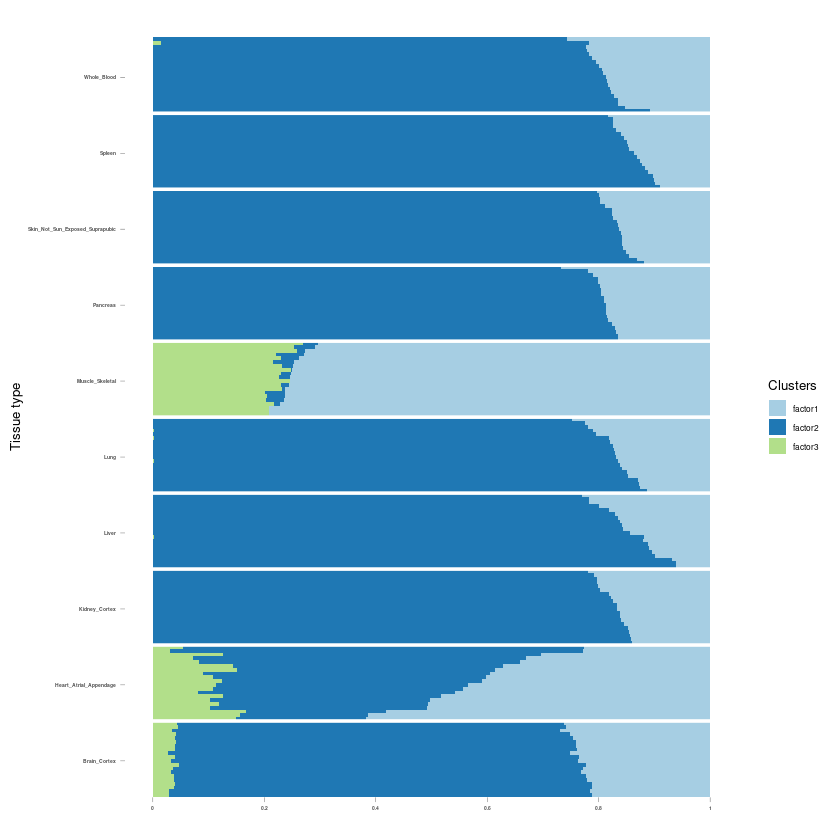

In [24]:
save_fit('TPM3')

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


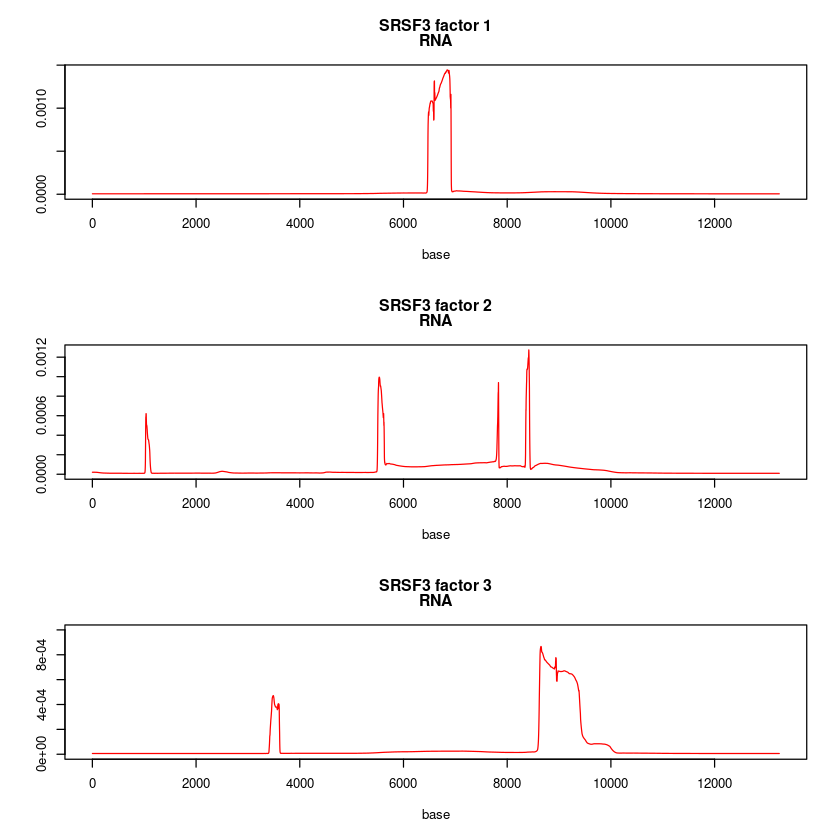

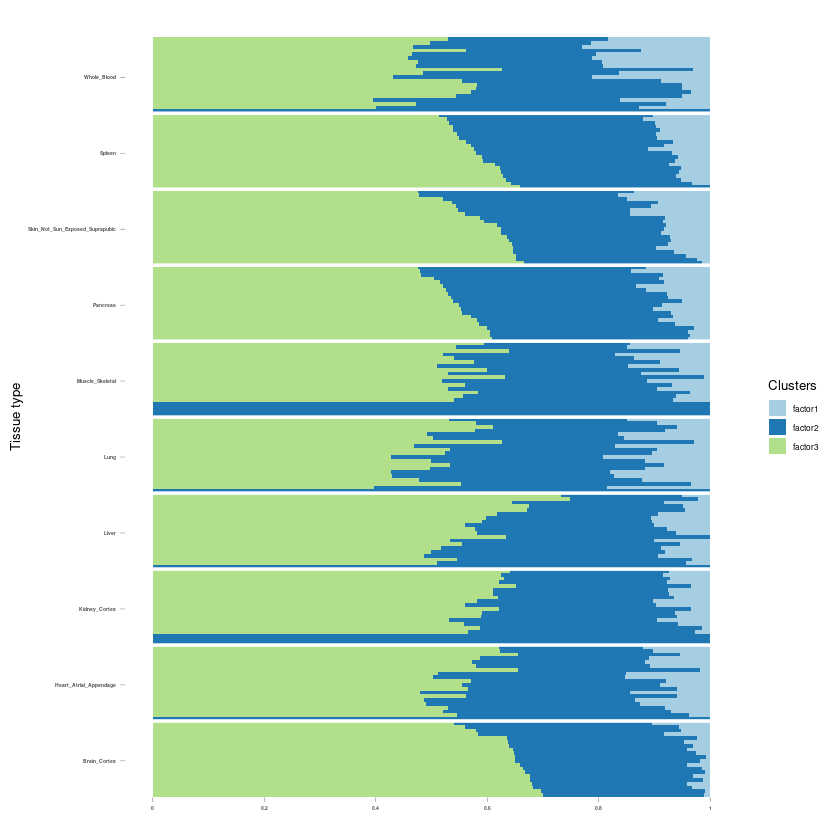

In [17]:
save_fit('SRSF3')

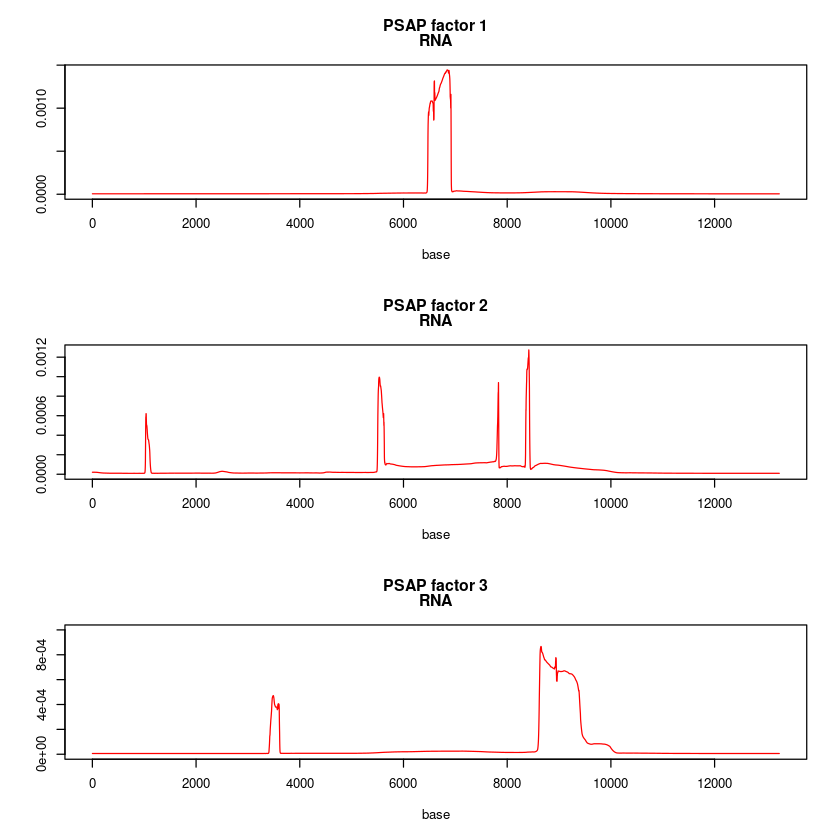

In [85]:

fit = readRDS('../code/stm_models/SRSF3.sgom_K3.rds')
summary_study(fit, 3, method='sgom', gene='PSAP')

# x <- as.matrix(fit$fit_sgom$pi) %*% as.matrix(fit$fit_sgom$phi)

# colnames(x) <- colnames(fit$geneCounts)
# write.table(x[brain_samples,], '../../plots/stm_plots/PSAP_stm.tab', sep='\t', quote=FALSE)

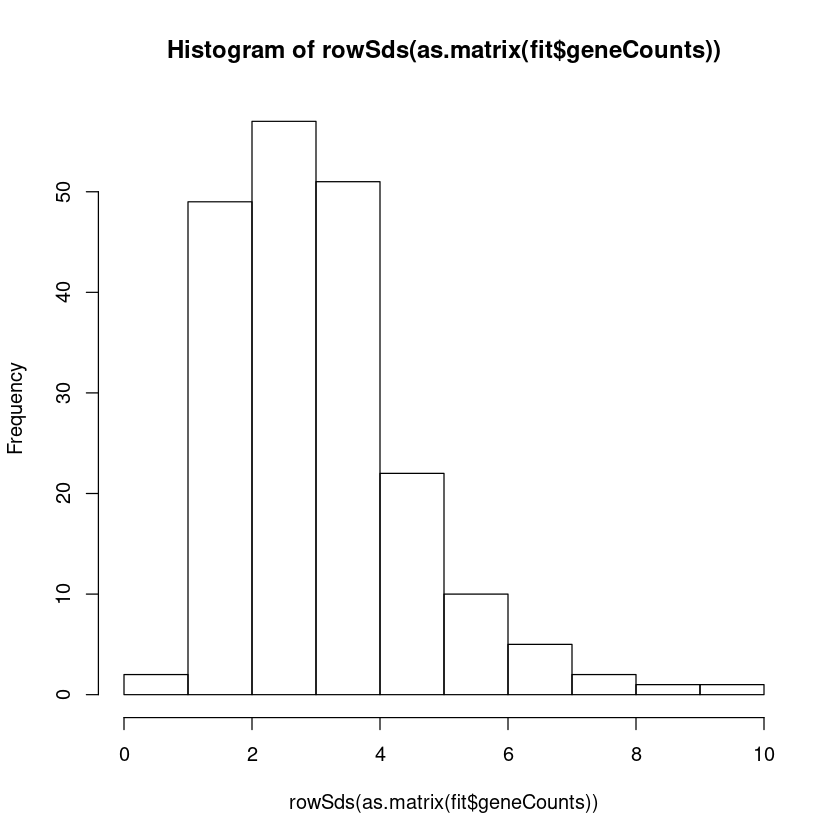

In [99]:
hist(rowSds(as.matrix(fit$geneCounts)))

In [95]:
library(matrixStats)


Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


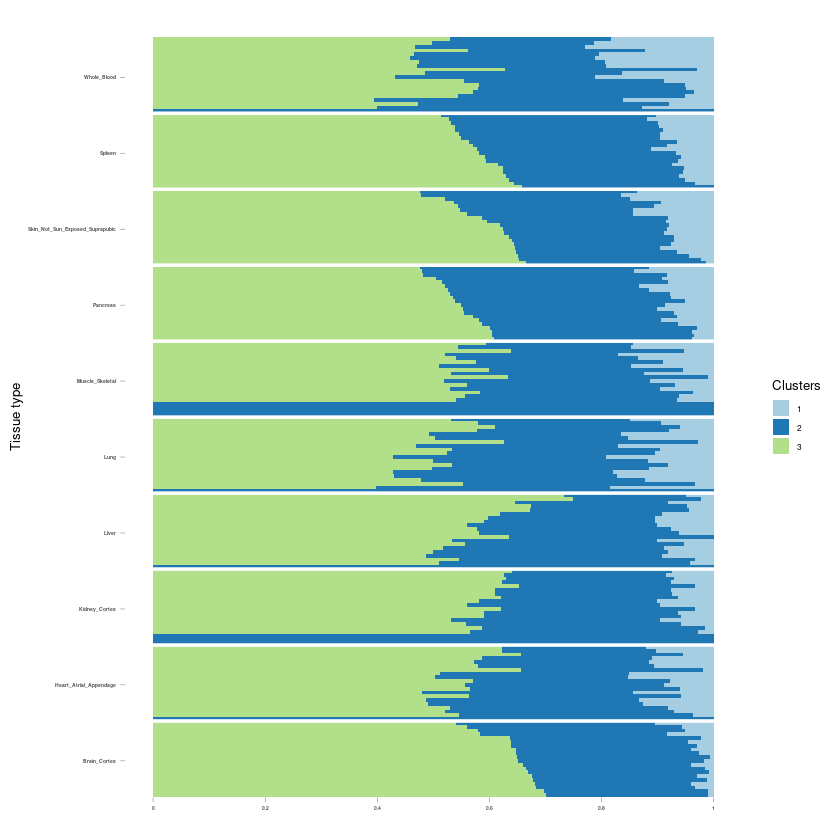

In [86]:
annotation = read.table('../../gtex_download/sample.tsv', sep='\t', header=1, row.names=1)

library(CountClust)

# row.names(fit$geneCounts) <- row.names(annotation)
# row.names(fit$fit_sgom$pi) <- row.names(annotation)

indis = row.names(fit$geneCounts)
tissue_label = c()
tissue_label <- annotation[rownames(fit$geneCounts),]$tissue_id
annotation = data.frame(sample_id = indis,tissue_label = tissue_label)
EL = fit$fit_sgom$pi
print(StructureGGplot(EL,annotation = annotation,
                  palette = RColorBrewer::brewer.pal(10,  "Paired"),
                  ))

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


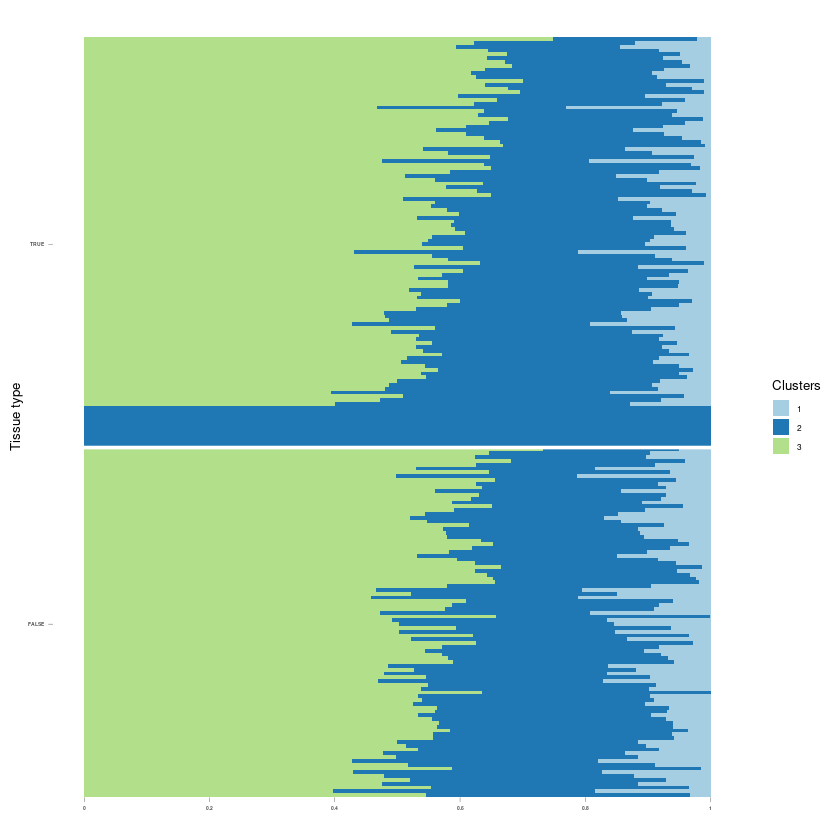

In [107]:

tissue_label <- as.character(data.frame(sample_id = indis,low = (rowSds(as.matrix(fit$geneCounts)) < 3))[,'low'])
annotation = data.frame(sample_id = indis,tissue_label = tissue_label)

EL = fit$fit_sgom$pi
print(StructureGGplot(EL,annotation = annotation,
                  palette = RColorBrewer::brewer.pal(10,  "Paired"),
                  ))

In [82]:
annotation

sample_id,tissue_label
<fct>,<lgl>
GTEX-1192W-0226-SM-5EGGT,TRUE
GTEX-1192X-3126-SM-5N9BY,TRUE
GTEX-11EI6-0826-SM-5985V,TRUE
GTEX-11EMC-0006-SM-5O9DN,FALSE
GTEX-11O72-0326-SM-5986D,TRUE
GTEX-11OF3-0726-SM-5BC4Z,TRUE
GTEX-11OF3-1326-SM-5N9FJ,TRUE
GTEX-11ONC-1026-SM-5GU64,TRUE
GTEX-11P82-0006-SM-5N9FY,TRUE


In [80]:
print(StructureGGplot(EL,annotation = annotation,
                  palette = RColorBrewer::brewer.pal(10,  "Paired"),
                  ))

ERROR: Error in !all.equal(colnames(annotation), c("sample_id", "tissue_label")): invalid argument type


In [69]:
sort(rowSums(fit$geneCounts)) > 5000

GTEX-WFON-0005-SM-3NMC9 GTEX-17HGU-0626-SM-7939Y GTEX-1QW4Y-0926-SM-DPRY2 
                   FALSE                    FALSE                    FALSE 
GTEX-1IY9M-0326-SM-ARZMN GTEX-11EMC-0006-SM-5O9DN GTEX-1A3MX-3026-SM-731BF 
                   FALSE                    FALSE                    FALSE 
GTEX-1PPH8-0006-SM-CY8GS GTEX-11WQK-0726-SM-5GU71 GTEX-11XUK-2226-SM-5CVLL 
                   FALSE                    FALSE                    FALSE 
GTEX-1A8FM-1826-SM-7MGXO  GTEX-QEL4-0626-SM-3GIJM GTEX-1HSMQ-0006-SM-ARU6N 
                   FALSE                    FALSE                    FALSE 
GTEX-13JUV-2926-SM-5LZX7  GTEX-ZEX8-0826-SM-4WKHK GTEX-1AX8Z-0006-SM-9KNVB 
                   FALSE                    FALSE                     TRUE 
GTEX-13113-1326-SM-5GCOI GTEX-1192X-3126-SM-5N9BY GTEX-1GMR3-2426-SM-7MXV2 
                    TRUE                     TRUE                     TRUE 
 GTEX-ZV7C-2426-SM-5NQ7Q GTEX-11ONC-1026-SM-5GU64 GTEX-15RJ7-0826-SM-6LLI8 
                    TRUE                     TRUE                     TRUE 
GTEX-14C5O-0005-SM-5P9ER GTEX-13X6J-3026-SM-5Q5CU GTEX-11P82-0006-SM-5N9FY 
                    TRUE                     TRUE                     TRUE 
GTEX-13FLV-0626-SM-5IFEY GTEX-11OF3-0726-SM-5BC4Z GTEX-1JMOU-2726-SM-CY8IO 
                    TRUE                     TRUE                     TRUE 
GTEX-1GMR8-3026-SM-9KNVF  GTEX-ZAB4-1726-SM-5HL8C GTEX-13OVH-3026-SM-5MR4N 
                    TRUE                     TRUE                     TRUE 
GTEX-1B932-1426-SM-793AN GTEX-13SLX-1226-SM-5S2Q6 GTEX-131YS-3126-SM-5KLYT 
                    TRUE                     TRUE                     TRUE 
GTEX-12WSH-3026-SM-5CVNI  GTEX-R53T-0426-SM-48FEM GTEX-13PDP-1326-SM-5K7U9 
                    TRUE                     TRUE                     TRUE 
GTEX-1AX9I-3026-SM-73KUH GTEX-14753-1626-SM-5NQ9L GTEX-1B8SF-3126-SM-73KU1 
                    TRUE                     TRUE                     TRUE 
 GTEX-T5JC-2426-SM-3NMDB GTEX-12WSF-0926-SM-6PALU  GTEX-Y5V5-0006-SM-4V6FE 
                    TRUE                     TRUE                     TRUE 
GTEX-17HII-0005-SM-7MKF6 GTEX-131YS-1626-SM-5HL6C  GTEX-R55G-0326-SM-48FDM 
                    TRUE                     TRUE                     TRUE 
 GTEX-ZAK1-3026-SM-5S2MJ GTEX-1AYCT-1226-SM-7EPGH GTEX-18A7A-1526-SM-72D69 
                    TRUE                     TRUE                     TRUE 
 GTEX-Y5V6-2026-SM-5IFHO GTEX-1F5PL-0726-SM-7MKH8 GTEX-1HFI6-3026-SM-CNPPJ 
                    TRUE                     TRUE                     TRUE 
GTEX-14E6E-0006-SM-5MR5N GTEX-13OVH-0626-SM-5L3EI GTEX-13D11-2526-SM-5KM28 
                    TRUE                     TRUE                     TRUE 
 GTEX-ZDYS-2526-SM-4WKGU  GTEX-WFJO-0626-SM-4LVMC GTEX-1F7RK-0326-SM-7RHH7 
                    TRUE                     TRUE                     TRUE 
GTEX-1RQEC-0006-SM-CL542  GTEX-ZTX8-0006-SM-4YCE4  GTEX-ZLWG-0326-SM-4WWC7 
                    TRUE                     TRUE                     TRUE 
 GTEX-ZZPT-3026-SM-5GZXH  GTEX-WFG7-2226-SM-3GIKP GTEX-1GF9X-0426-SM-7MKHN 
                    TRUE                     TRUE                     TRUE 
 GTEX-T5JC-1526-SM-4DM68 GTEX-1JJ6O-3126-SM-CNNP8 GTEX-1I1GR-2926-SM-CNNQG 
                    TRUE                     TRUE                     TRUE 
 GTEX-WFG8-0006-SM-3GIKS GTEX-1F75A-3026-SM-9KNU2 GTEX-1S5VW-1826-SM-EAZ53 
                    TRUE                     TRUE                     TRUE 
GTEX-14PJ4-0626-SM-6AJBS GTEX-1HBPI-1026-SM-AHZ4N GTEX-131XF-0426-SM-5HL7U 
                    TRUE                     TRUE                     TRUE 
GTEX-13RTJ-2226-SM-5S2Q1 GTEX-15RIE-1326-SM-6PAMM GTEX-11OF3-1326-SM-5N9FJ 
                    TRUE                     TRUE                     TRUE 
GTEX-1192W-0226-SM-5EGGT GTEX-1KD4Q-1526-SM-D4P3L  GTEX-YF7O-0526-SM-5P9IO 
                    TRUE                     TRUE                     TRUE 
GTEX-1JJ6O-2526-SM-AHZ3J GTEX-1GF9V-1226-SM-7MKGY

In [12]:
dim(fit$fit_sgom$phi)

[1]     5 28439

In [81]:
x <- as.matrix(fit$fit_sgom$pi) %*% as.matrix(fit$fit_sgom$phi)

colnames(x) <- colnames(fit$geneCounts)
write.table(x[brain_samples,], '../../plots/stm_plots/PSAP_stm.tab', sep='\t', quote=FALSE)

In [105]:
phi <- fit$fit_sgom$phi
colnames(phi) <- colnames(fit$geneCounts)

In [106]:
phi

ERROR while rich displaying an object: Error in sprintf(wrap, caption, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]]

chr12.98592592,chr12.98592593,chr12.98592594,chr12.98592595,chr12.98592596,chr12.98592597,chr12.98592598,chr12.98592599,chr12.98592600,chr12.98592601,...,chr12.98607370,chr12.98607371,chr12.98607372,chr12.98607373,chr12.98607374,chr12.98607375,chr12.98607376,chr12.98607377,chr12.98607378,chr12.98607379
2.385307e-05,2.395286e-05,2.405894e-05,2.417731e-05,2.430623e-05,2.444597e-05,2.459498e-05,2.475339e-05,2.491783e-05,2.482236e-05,...,5.579955e-06,5.579996e-06,5.580037e-06,5.580079e-06,5.580121e-06,5.580163e-06,5.580206e-06,5.580249e-06,5.580292e-06,5.580336e-06
2.036981e-06,2.036985e-06,2.036989e-06,2.036993e-06,2.036997e-06,2.037001e-06,2.037005e-06,2.037010e-06,2.037014e-06,2.037018e-06,...,2.052276e-06,2.052276e-06,2.052275e-06,2.052274e-06,2.052274e-06,2.052273e-06,2.052272e-06,2.052272e-06,2.052271e-06,2.052270e-06
1.581213e-06,1.581254e-06,1.581296e-06,1.581337e-06,1.581377e-06,1.581419e-06,1.581460e-06,1.581501e-06,1.581542e-06,1.581582e-06,...,1.636971e-06,1.637097e-06,1.637223e-06,1.637348e-06,1.637474e-06,1.637599e-06,1.637723e-06,1.637848e-06,1.637973e-06,1.638097e-06
6.666752e-06,6.666771e-06,6.666791e-06,6.666810e-06,6.666830e-06,6.666851e-06,6.666872e-06,6.666893e-06,6.666914e-06,6.666936e-06,...,6.624025e-06,6.624017e-06,6.624010e-06,6.624003e-06,6.623996e-06,6.623990e-06,6.623985e-06,6.623982e-06,6.623978e-06,6.623975e-06
3.128963e-06,3.128971e-06,3.128979e-06,3.128988e-06,3.128997e-06,3.129006e-06,3.129015e-06,3.129025e-06,3.129034e-06,3.129044e-06,...,3.201185e-06,3.201098e-06,3.201011e-06,3.200924e-06,3.200837e-06,3.200751e-06,3.200666e-06,3.200581e-06,3.200497e-06,3.200413e-06


In [74]:
annotation = read.table('../../gtex_download/sample.tsv', sep='\t', header=1, row.names=1)

brain_samples <- rownames(x)[annotation[rownames(x),]$tissue_id == "Kidney_Cortex"]
pancreas_samples <- rownames(x)[annotation[rownames(x),]$tissue_id == "Whole_Blood"]

In [32]:
annotation[rownames(x),]$tissue_id

[1] Pancreas                        Heart_Atrial_Appendage         
  [3] Pancreas                        Brain_Cortex                   
  [5] Liver                           Whole_Blood                    
  [7] Skin_Not_Sun_Exposed_Suprapubic Muscle_Skeletal                
  [9] Pancreas                        Heart_Atrial_Appendage         
 [11] Spleen                          Kidney_Cortex                  
 [13] Brain_Cortex                    Lung                           
 [15] Muscle_Skeletal                 Spleen                         
 [17] Lung                            Muscle_Skeletal                
 [19] Spleen                          Brain_Cortex                   
 [21] Muscle_Skeletal                 Lung                           
 [23] Muscle_Skeletal                 Liver                          
 [25] Brain_Cortex                    Liver                          
 [27] Heart_Atrial_Appendage          Brain_Cortex                   
 [29] Muscle_Skeletal                 Brain_Cortex                   
 [31] Skin_Not_Sun_Exposed_Suprapubic Lung                           
 [33] Kidney_Cortex                   Pancreas                       
 [35] Whole_Blood                     Whole_Blood                    
 [37] Whole_Blood                     Lung                           
 [39] Spleen                          Brain_Cortex                   
 [41] Pancreas                        Liver                          
 [43] Heart_Atrial_Appendage          Pancreas                       
 [45] Brain_Cortex                    Spleen                         
 [47] Whole_Blood                     Liver                          
 [49] Kidney_Cortex                   Muscle_Skeletal                
 [51] Kidney_Cortex                   Whole_Blood                    
 [53] Skin_Not_Sun_Exposed_Suprapubic Skin_Not_Sun_Exposed_Suprapubic
 [55] Heart_Atrial_Appendage          Whole_Blood                    
 [57] Liver                           Pancreas                       
 [59] Liver                           Kidney_Cortex                  
 [61] Whole_Blood                     Kidney_Cortex                  
 [63] Whole_Blood                     Skin_Not_Sun_Exposed_Suprapubic
 [65] Pancreas                        Heart_Atrial_Appendage         
 [67] Kidney_Cortex                   Heart_Atrial_Appendage         
 [69] Spleen                          Liver                          
 [71] Skin_Not_Sun_Exposed_Suprapubic Whole_Blood                    
 [73] Heart_Atrial_Appendage          Lung                           
 [75] Liver                           Spleen                         
 [77] Brain_Cortex                    Spleen                         
 [79] Skin_Not_Sun_Exposed_Suprapubic Liver                          
 [81] Heart_Atrial_Appendage          Heart_Atrial_Appendage         
 [83] Kidney_Cortex                   Kidney_Cortex                  
 [85] Pancreas                        Skin_Not_Sun_Exposed_Suprapubic
 [87] Muscle_Skeletal                 Kidney_Cortex                  
 [89] Pancreas                        Lung                           
 [91] Spleen                          Spleen                         
 [93] Lung                            Skin_Not_Sun_Exposed_Suprapubic
 [95] Brain_Cortex                    Lung                           
 [97] Skin_Not_Sun_Exposed_Suprapubic Muscle_Skeletal                
 [99] Lung                            Muscle_Skeletal                
54 Levels: Adipose_Subcutaneous Adipose_Visceral_Omentum ... Whole_Blood

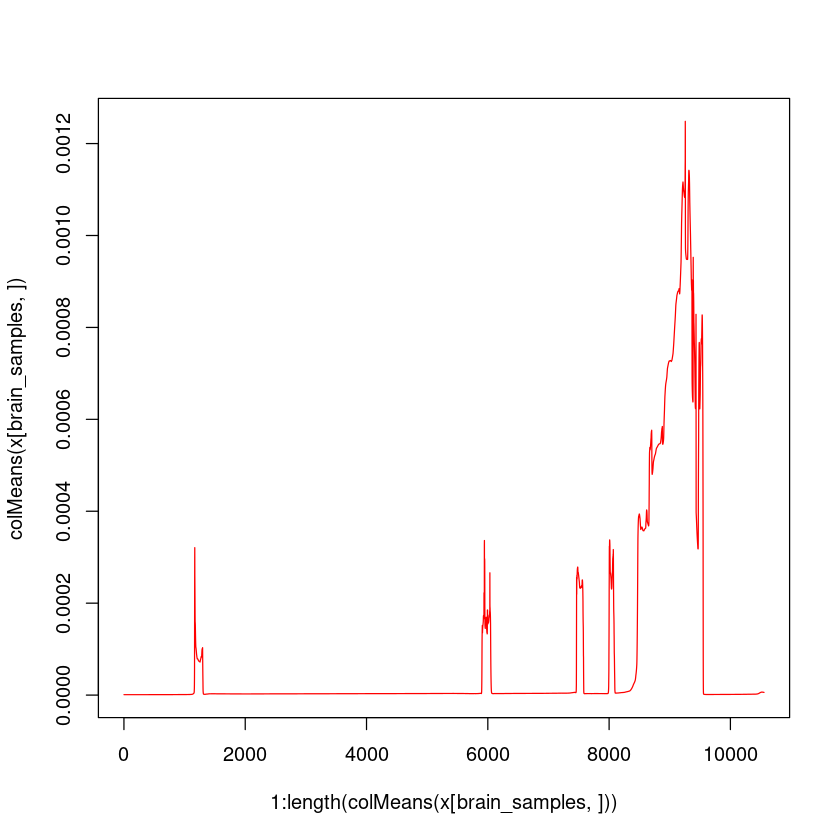

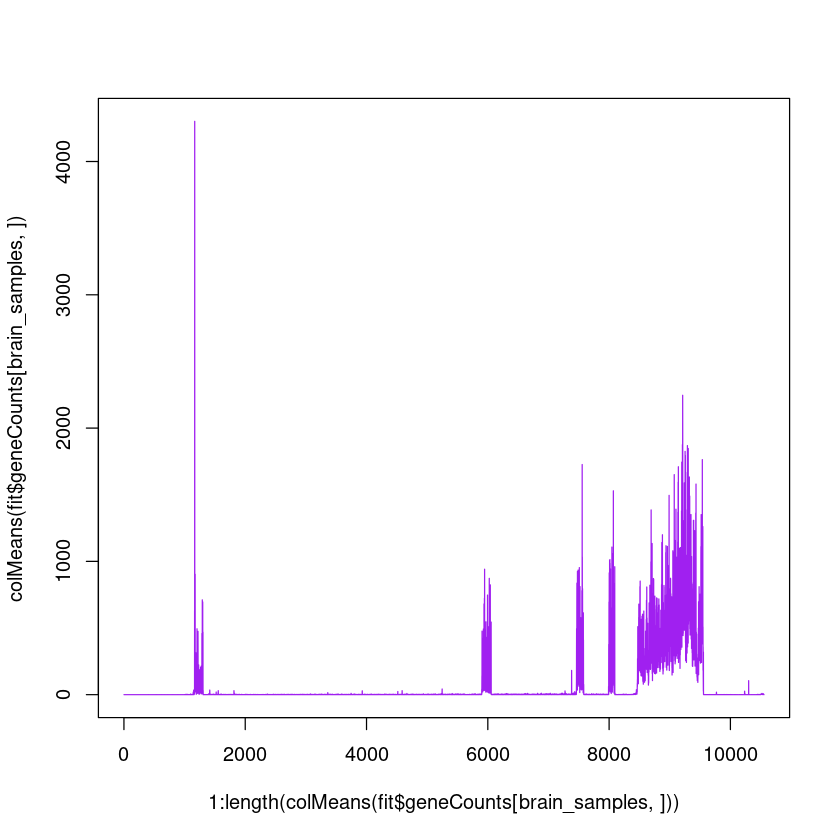

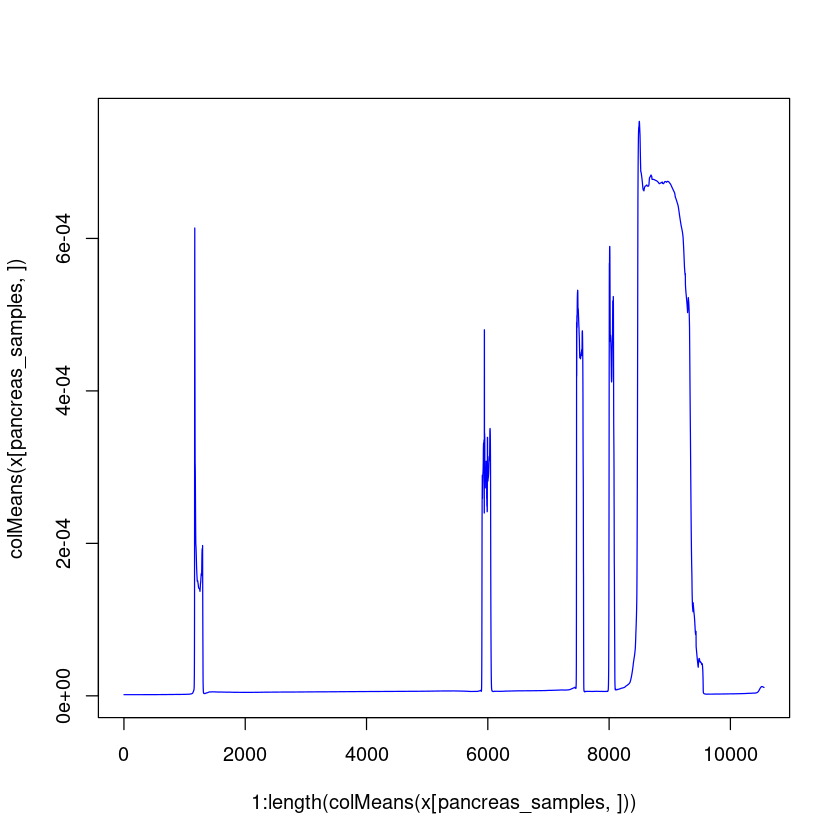

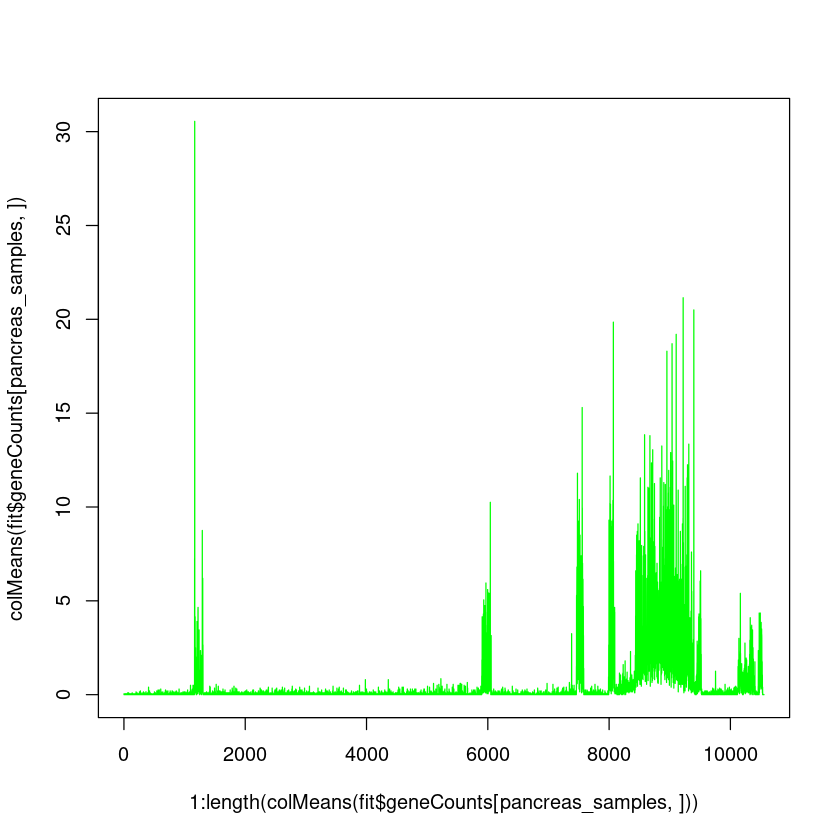

In [75]:
plot(1:length(colMeans(x[brain_samples,])),
     colMeans(x[brain_samples,]),type='l', col='red')


plot(1:length(colMeans(fit$geneCounts[brain_samples,])),
     colMeans(fit$geneCounts[brain_samples,]),type='l', col='purple')


plot(1:length(colMeans(x[pancreas_samples,])),
     colMeans(x[pancreas_samples,]),type='l', col='blue')

plot(1:length(colMeans(fit$geneCounts[pancreas_samples,])),
     colMeans(fit$geneCounts[pancreas_samples,]),type='l', col='green')

In [76]:
colnames(x) <- colnames(fit$geneCounts)
write.table(x[brain_samples,], '../../plots/stm_plots/kidney_gpx3_stm.tab', sep='\t', quote=FALSE)

colnames(x) <- colnames(fit$geneCounts)
write.table(x[pancreas_samples,], '../../plots/stm_plots/blood_gpx3_stm.tab', sep='\t', quote=FALSE)

In [51]:
x[pancreas_samples,]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
     [,15] [,16] [,17] [,18] [,19] [,20] [,21]

In [63]:
fit$fit_sgom$phi

ERROR while rich displaying an object: Error in sprintf(wrap, caption, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]]

5.932619e-06,5.932996e-06,5.933376e-06,5.933749e-06,5.934126e-06,5.934502e-06,5.934883e-06,5.935268e-06,5.935650e-06,5.936034e-06,...,5.752884e-06,5.752849e-06,5.752814e-06,5.752779e-06,5.752743e-06,5.752708e-06,5.752673e-06,5.752637e-06,5.752601e-06,5.752565e-06
6.296309e-06,6.296690e-06,6.297071e-06,6.297445e-06,6.297821e-06,6.298195e-06,6.298574e-06,6.298958e-06,6.299340e-06,6.299724e-06,...,6.114573e-06,6.114573e-06,6.114572e-06,6.114572e-06,6.114572e-06,6.114572e-06,6.114572e-06,6.114572e-06,6.114572e-06,6.114572e-06
4.959658e-06,4.959973e-06,4.960290e-06,4.960603e-06,4.960918e-06,4.961234e-06,4.961556e-06,4.961883e-06,4.962210e-06,4.962538e-06,...,4.266871e-06,4.266871e-06,4.266871e-06,4.266871e-06,4.266870e-06,4.266870e-06,4.266870e-06,4.266870e-06,4.266870e-06,4.266870e-06
9.536064e-06,9.536268e-06,9.536475e-06,9.536679e-06,9.536891e-06,9.537105e-06,9.537327e-06,9.537560e-06,9.537793e-06,9.538032e-06,...,7.024549e-06,7.024494e-06,7.024440e-06,7.024386e-06,7.024331e-06,7.024277e-06,7.024223e-06,7.024170e-06,7.024116e-06,7.024062e-06
4.193097e-06,4.193318e-06,4.193539e-06,4.193757e-06,4.193978e-06,4.194200e-06,4.194426e-06,4.194657e-06,4.194888e-06,4.195119e-06,...,4.473052e-06,4.473060e-06,4.473068e-06,4.473077e-06,4.473085e-06,4.473094e-06,4.473102e-06,4.473112e-06,4.473121e-06,4.473131e-06


In [157]:
annotation = read.table('../../gtex_download/sample.tsv', sep='\t', header=1, row.names=1)


In [162]:
indis = row.names(fit$geneCounts)

In [179]:
dim(annotation)

[1] 100   2

In [189]:
annotation = read.table('../../gtex_download/sample.tsv', sep='\t', header=1, row.names=1)

annotation['GTEX-1H1ZS-3026-SM-9KNUJ',]

,bam_file,bam_index,participant,tissue_id,tissue_site_detail
,<fct>,<fct>,<fct>,<fct>,<fct>
GTEX-1H1ZS-3026-SM-9KNUJ,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da62108/GTEx_Analysis_2017-06-05_v8_RNAseq_BAM_files/GTEX-1H1ZS-3026-SM-9KNUJ.Aligned.sortedByCoord.out.patched.md.bam,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da62108/GTEx_Analysis_2017-06-05_v8_RNAseq_BAM_files/GTEX-1H1ZS-3026-SM-9KNUJ.Aligned.sortedByCoord.out.patched.md.bam.bai,GTEX-1H1ZS,Brain_Cortex,Brain - Cortex


In [194]:
table(annotation[rownames(fit$geneCounts),]$tissue_id)


                 Adipose_Subcutaneous              Adipose_Visceral_Omentum 
                                    0                                     0 
                        Adrenal_Gland                          Artery_Aorta 
                                    0                                     0 
                      Artery_Coronary                         Artery_Tibial 
                                    0                                     0 
                              Bladder                        Brain_Amygdala 
                                    0                                     0 
 Brain_Anterior_cingulate_cortex_BA24           Brain_Caudate_basal_ganglia 
                                    0                                     0 
          Brain_Cerebellar_Hemisphere                      Brain_Cerebellum 
                                    0                                     0 
                         Brain_Cortex              Brain_Frontal_Cortex_BA9

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


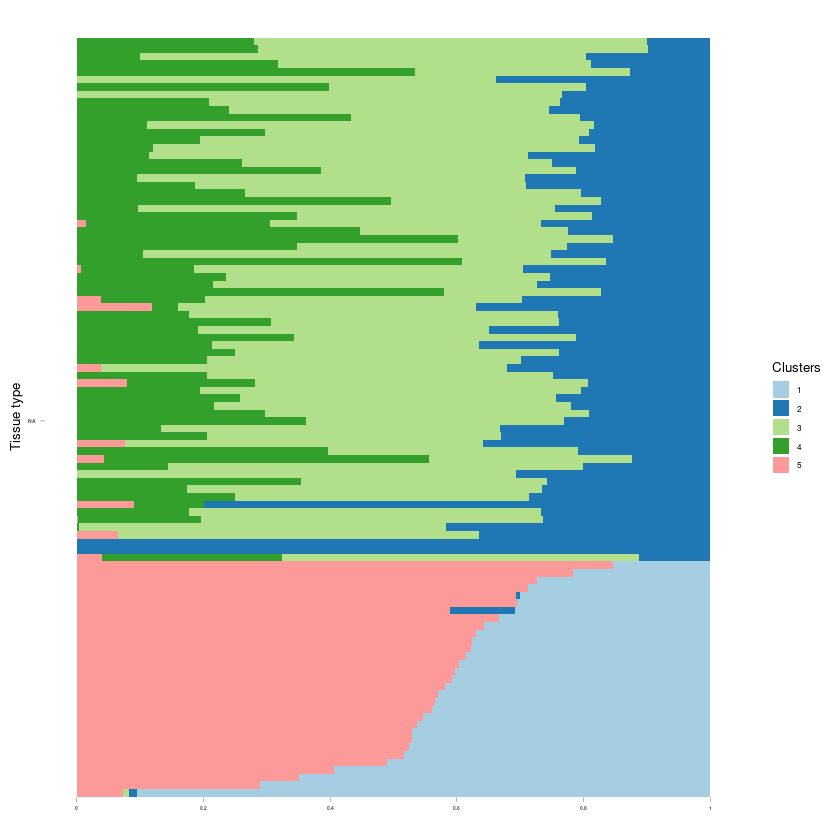

In [115]:
annotation = read.table('../../gtex_download/sample.100.tab.gz', sep='\t', header=1, row.names=1)

library(CountClust)

row.names(fit$geneCounts) <- row.names(annotation)
row.names(fit$fit_sgom$pi) <- row.names(annotation)

indis = rownames(fit$geneCounts)
 tissue_label = c()
 for(i in 1:length(indis)){
   tissue_label[i] <- annotation$tissue_id[i]
 }
annotation = annotation = read.table('../../gtex_download/sample.100.tab.gz', sep='\t', header=1, row.names=1)

EL = fit$fit_sgom$pi
print(StructureGGplot(EL,annotation = annotation$tissue_id,
                  palette = RColorBrewer::brewer.pal(5,  "Paired"),
                  ))

In [1]:
names <- c()
for (i in 1:5) {
    names <- c(names, paste0('factors', as.character(i)))
}

In [2]:
names

[1] "factors1" "factors2" "factors3" "factors4" "factors5"